In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from graphviz import Digraph
from sklearn.svm import NuSVR
import tensorflow as tf
import tensorflow_addons as tfa
import tfgraphviz as tfg
import shap
import optuna
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv(r'C:\Users\visha\OneDrive\Desktop\Unemployment\Unemployment Rate\processed_data.csv')

In [3]:
pd.set_option("display.max_rows",1000)

In [4]:
df.shape

(268, 204)

In [5]:
lag_features = [
 'cac40_2',
 'cac40_10',
 'cac40_12',
 'dax_10',
 'dax_12',
 'dax_14',
 'dow_jones_2',
 'dow_jones_11',
 'dow_jones_12',
 'dow_jones_14',
 'euroarea_cpi_2',
 'euroarea_cpi_6',
 'euroarea_cpi_10',
 'euroarea_cpi_14',
 'euroarea_exports_6',
 'euroarea_exports_12',
 'euroarea_exports_16',
 'euroarea_imports_4',
 'euroarea_imports_8',
 'euroarea_imports_12',
 'euroarea_m1_2',
 'euroarea_m1_4',
 'euroarea_m1_6',
 'euroarea_m1_8',
 'euroarea_m3_2',
 'euroarea_m3_10',
 'euroarea_m3_12',
 'eurobond_rate_4',
 'eurobond_rate_8',
 'eurobond_rate_12',
 'australian_dollar_1',
 'australian_dollar_11',
 'australian_dollar_12',
 'canadian_dollar_3',
 'canadian_dollar_6',
 'canadian_dollar_9',
 'canadian_dollar_12',
 'japanese_yen_1',
 'japanese_yen_2',
 'japanese_yen_12',
 'us_dollar_1',
 'us_dollar_2',
 'us_dollar_10',
 'us_dollar_12',
 'pound_sterling_1',
 'pound_sterling_5',
 'pound_sterling_11',
 'pound_sterling_12',
 'hhub_3',
 'hhub_6',
 'hhub_9',
 'hhub_12',
 'nasdaq_2',
 'nasdaq_6',
 'nasdaq_9',
 'nasdaq_12',
 's_and_p_2',
 's_and_p_10',
 's_and_p_12',
 'us_cpi_1',
 'us_cpi_2',
 'us_cpi_11',
 'us_cpi_12',
 'us_m1_5',
 'us_m1_6',
 'us_m1_12',
 'us_m3_3',
 'us_m3_5',
 'us_m3_12',
 'us_unrate_3',
 'us_unrate_9',
 'us_unrate_12',
 'wti_1',
 'wti_6',
 'wti_12',
 'euroarea_unemployment_rate_6',
 'euroarea_unemployment_rate_12'
]

target = ['euroarea_unemployment_rate']
  

In [6]:
df = df.loc[:,~df.columns.duplicated()].copy() #drop duplicate column names

# SVR

In [7]:
def shap_summary_plot(df, features=lag_features, target=target, test_size=.05, model=NuSVR(C=0.45, nu=0.45, kernel='poly',gamma='scale')):
    X = df[features]
    y = df[target]
    
    #Train-Test Split
    X_tmp,X_test,y_tmp,y_test=train_test_split(X, y, test_size=0.1, random_state=42)
    X_train,X_val,y_train,y_val=train_test_split(X_tmp, y_tmp, test_size=0.12, random_state=42)
    
    print('Shape of entire dataset', df.shape)
    print('Shape of X_train:',X_train.shape)
    print('Shape of y_train:',y_train.shape)
    print('Shape of X_val:',X_val.shape)
    print('Shape of y_val:',y_val.shape)
    print('Shape of X_test:',X_test.shape)
    print('Shape of y_test:',y_test.shape)
    
    std_scaler = StandardScaler()
    pca = PCA()
    
    pipe = make_pipeline(std_scaler,pca,model).fit(X_train,y_train) #Initialize and Fit Model
    
    #Generate R2 scores
    train_score=pipe.score(X_train, y_train)
    val_score=pipe.score(X_val, y_val)
    test_score = pipe.score(X_test, y_test)
    
    #Generate Predictions and Obtain MAEs
    y_pred = pipe.predict(X_train)
    train_mae = metrics.mean_absolute_error(y_train, y_pred)
    
    y_pred = pipe.predict(X_val)
    val_mae = metrics.mean_absolute_error(y_val, y_pred)
    
    y_pred = pipe.predict(X_test)
    test_mae = metrics.mean_absolute_error(y_test, y_pred)

    print('R2 Validation: ', val_score)
    print('MAE Validation: ', val_mae)
   
    #Explainer
    X_train_summary = shap.kmeans(X_train, 5)
    ex = shap.KernelExplainer(pipe.predict, X_train_summary)
    shap_values = ex.shap_values(X_val)
    shap.initjs()
    
    
    shap.summary_plot(shap_values, X_val,max_display=1000000)
    plt.show()
    return train_score,val_score,test_score,train_mae,val_mae,test_mae
    
    
    

In [8]:
lag_features_reduced_svr = [
 'cac40_2',
 'cac40_10',
 'cac40_12',
#  'dax_10',
#  'dax_12',
 'dax_14',
 'dow_jones_2',
#  'dow_jones_11',
#  'dow_jones_12',
#  'dow_jones_14',
#  'euroarea_cpi_2',
#  'euroarea_cpi_6',
#  'euroarea_cpi_10',
 'euroarea_cpi_14',
 'euroarea_exports_6',
 'euroarea_exports_12',
 'euroarea_exports_16',
 'euroarea_imports_4',
#  'euroarea_imports_8',
#  'euroarea_imports_12',
#  'euroarea_m1_2',
#  'euroarea_m1_4',
#  'euroarea_m1_6',
#  'euroarea_m1_8',
#  'euroarea_m3_2',
#  'euroarea_m3_10',
#  'euroarea_m3_12',
#  'eurobond_rate_4',
#  'eurobond_rate_8',
 'eurobond_rate_12',
 'australian_dollar_1',
 'australian_dollar_11',
 'australian_dollar_12',
 'canadian_dollar_3',
 'canadian_dollar_6',
 'canadian_dollar_9',
 'canadian_dollar_12',
 'japanese_yen_1',
 'japanese_yen_2',
#  'japanese_yen_12',
#  'us_dollar_1',
#  'us_dollar_2',
 'us_dollar_10',
 'us_dollar_12',
#  'pound_sterling_1',
 'pound_sterling_5',
 'pound_sterling_11',
 'pound_sterling_12',
 'hhub_3',
 'hhub_6',
 'hhub_9',
 'hhub_12',
 'nasdaq_2',
 'nasdaq_6',
 'nasdaq_9',
 'nasdaq_12',
 's_and_p_2',
#  's_and_p_10',
 's_and_p_12',
#  'us_cpi_1',
#  'us_cpi_2',
#  'us_cpi_11',
#  'us_cpi_12',
#  'us_m1_5',
#  'us_m1_6',
#  'us_m1_12',
#  'us_m3_3',
#  'us_m3_5',
#  'us_m3_12',
 'us_unrate_3',
 'us_unrate_9',
 'us_unrate_12',
 'wti_1',
 'wti_6',
 'wti_12',
 'euroarea_unemployment_rate_6',
 'euroarea_unemployment_rate_12'
]
  

Shape of entire dataset (268, 204)
Shape of X_train: (212, 43)
Shape of y_train: (212, 1)
Shape of X_val: (29, 43)
Shape of y_val: (29, 1)
Shape of X_test: (27, 43)
Shape of y_test: (27, 1)
R2 Validation:  0.9783916592252019
MAE Validation:  0.14170876783707886


  0%|          | 0/29 [00:00<?, ?it/s]

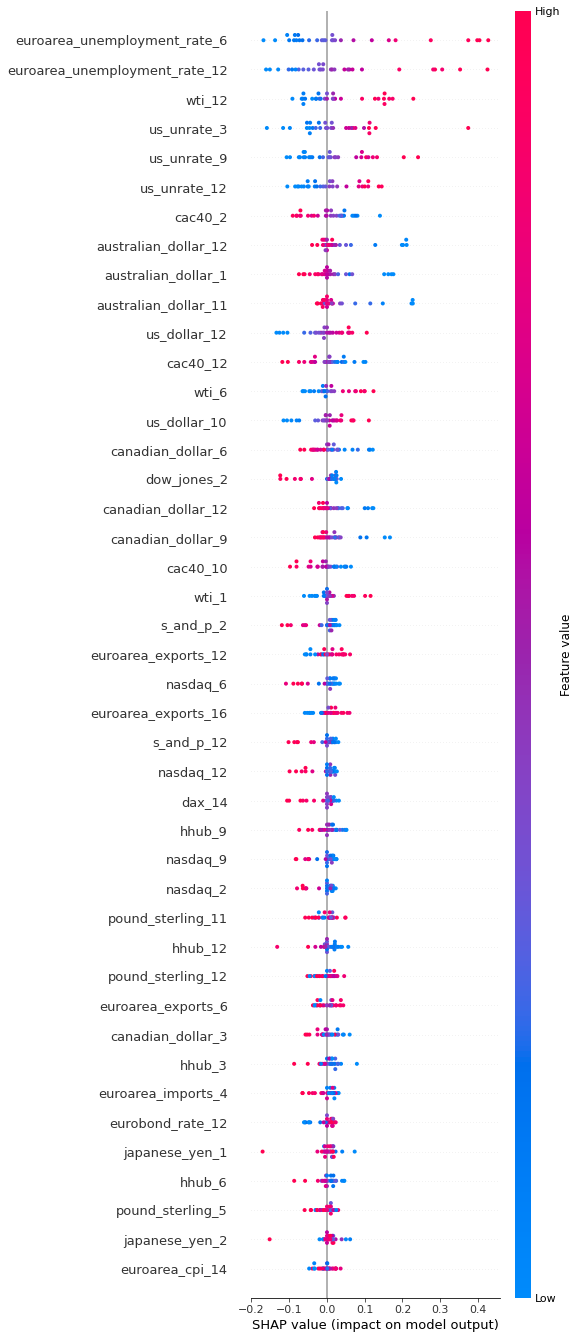

In [9]:
#SVR Reduced
train_score_svr_reduced,val_score_svr_reduced,test_score_svr_reduced,train_mae_svr_reduced,val_mae_svr_reduced,test_mae_svr_reduced=shap_summary_plot(df,lag_features_reduced_svr)

# Neural Networks

In [10]:
lag_features = [
 'cac40_2',
 'cac40_10',
 'cac40_12',
 'dax_10',
 'dax_12',
 'dax_14',
 'dow_jones_2',
 'dow_jones_11',
 'dow_jones_12',
 'dow_jones_14',
 'euroarea_cpi_2',
 'euroarea_cpi_6',
 'euroarea_cpi_10',
 'euroarea_cpi_14',
 'euroarea_exports_6',
 'euroarea_exports_12',
 'euroarea_exports_16',
 'euroarea_imports_4',
 'euroarea_imports_8',
 'euroarea_imports_12',
 'euroarea_m1_2',
 'euroarea_m1_4',
 'euroarea_m1_6',
 'euroarea_m1_8',
 'euroarea_m3_2',
 'euroarea_m3_10',
 'euroarea_m3_12',
 'eurobond_rate_4',
 'eurobond_rate_8',
 'eurobond_rate_12',
 'australian_dollar_1',
 'australian_dollar_11',
 'australian_dollar_12',
 'canadian_dollar_3',
 'canadian_dollar_6',
 'canadian_dollar_9',
 'canadian_dollar_12',
 'japanese_yen_1',
 'japanese_yen_2',
 'japanese_yen_12',
 'us_dollar_1',
 'us_dollar_2',
 'us_dollar_10',
 'us_dollar_12',
 'pound_sterling_1',
 'pound_sterling_5',
 'pound_sterling_11',
 'pound_sterling_12',
 'hhub_3',
 'hhub_6',
 'hhub_9',
 'hhub_12',
 'nasdaq_2',
 'nasdaq_6',
 'nasdaq_9',
 'nasdaq_12',
 's_and_p_2',
 's_and_p_10',
 's_and_p_12',
 'us_cpi_1',
 'us_cpi_2',
 'us_cpi_11',
 'us_cpi_12',
 'us_m1_5',
 'us_m1_6',
 'us_m1_12',
 'us_m3_3',
 'us_m3_5',
 'us_m3_12',
 'us_unrate_3',
 'us_unrate_9',
 'us_unrate_12',
 'wti_1',
 'wti_6',
 'wti_12',
 'euroarea_unemployment_rate_6',
 'euroarea_unemployment_rate_12'
]
  

target = ['euroarea_unemployment_rate']

In [11]:
def model_factory(act_bd='relu', hdn_grp=[106,50,70], dns_nns=97, rec_nns= 97, op='adam', ls='mae', rec=None, rec_act='tanh',kernel_size=8,feats=lag_features):
    model = tf.keras.models.Sequential()
    
    #Input Layer
    model.add(tf.keras.layers.Dense(dns_nns,activation=act_bd, input_shape=[len(feats)]))
              
    if rec == 'LSTM':
              model.add(tf.keras.layers.Reshape(target_shape=(dns_nns, 1))) #Reshape input layer to add depth for LSTM
              model.add(tf.keras.layers.LSTM(rec_nns,activation=rec_act))
    elif rec =='GRU':
              model.add(tf.keras.layers.Reshape(target_shape=(dns_nns, 1))) #Reshape input layer to add depth for GRU
              model.add(tf.keras.layers.GRU(rec_nns,activation=rec_act))
    elif rec =='CNN':
              model.add(tf.keras.layers.Reshape(target_shape=(dns_nns, 1))) #Reshape input layer to add depth for CNN
              model.add(tf.keras.layers.Conv1D(rec_nns,kernel_size,activation=rec_act))
              model.add(tf.keras.layers.Flatten())
            
    #Hidden Layers          
    for size in hdn_grp:
                  model.add(tf.keras.layers.Dense(size,activation=act_bd))

                        
    #Output Layer
    model.add(tf.keras.layers.Dense(1))
    model.compile(optimizer=op, loss=ls, metrics =[tfa.metrics.r_square.RSquare()])
    
    return model

In [12]:
X_svr_reduced=df[lag_features_reduced_svr]
y_svr_reduced=df[target]

X = df[lag_features]
y = df[target]

eps= 120
bt_size= 4
train_scores10=[]
train_scores14=[]
train_scores_svr_reduced=[]

test_scores10=[]
test_scores14=[]
test_scores_svr_reduced=[]

train_maes10=[]
train_maes14=[]
train_maes_svr_reduced=[]

test_maes10=[]
test_maes14=[]
test_maes_svr_reduced=[]

for _ in np.arange(0,101):
    #Train-Test Split
    X_tmp,X_test,y_tmp,y_test=train_test_split(X, y, test_size=0.1)
    X_train,X_val,y_train,y_val=train_test_split(X_tmp, y_tmp, test_size=0.12)
    
    X_tmp_svr_reduced,X_test_svr_reduced,y_tmp_svr_reduced,y_test_svr_reduced=train_test_split(X_svr_reduced, y_svr_reduced, test_size=0.1)
    X_train_svr_reduced,X_val_svr_reduced,y_train_svr_reduced,y_val_svr_reduced=train_test_split(X_tmp_svr_reduced, y_tmp_svr_reduced, test_size=0.12)
    
    #Standardization of NN
    std_scaler = StandardScaler().fit(X_train)
    X_train = std_scaler.transform(X_train)
    X_test = std_scaler.transform(X_test)
    
    #Standardization of SVR
    std_scaler_svr_reduced = StandardScaler().fit(X_train_svr_reduced)
    X_train_svr_reduced = std_scaler_svr_reduced.transform(X_train_svr_reduced)
    X_test_svr_reduced = std_scaler_svr_reduced.transform(X_test_svr_reduced)
    
    #PCA of NN
    pca = PCA().fit(X_train)
    X_train = pca.transform(X_train)
    X_test = pca.transform(X_test)
    
    #PCA of SVR
    pca_svr_reduced = PCA().fit(X_train_svr_reduced)
    X_train_svr_reduced = pca_svr_reduced.transform(X_train_svr_reduced)
    X_test_svr_reduced = pca_svr_reduced.transform(X_test_svr_reduced)
    
    model10 = model_factory(feats=lag_features, hdn_grp= [120,120,120],op=tf.keras.optimizers.Adam(learning_rate=0.0001),rec='LSTM')
    model14 = model_factory(feats=lag_features, hdn_grp= [80,80,80],op=tf.keras.optimizers.Adam(learning_rate=0.001),rec='LSTM',act_bd='elu',rec_act='tanh')

    
    #Fit Model
    history10 = model10.fit(X_train, y_train, validation_data= (X_val,y_val),epochs=eps, batch_size=bt_size)
    history14 = model14.fit(X_train, y_train, validation_data= (X_val,y_val),epochs=eps, batch_size=bt_size)
    svr_reduced = NuSVR().fit(X_train_svr_reduced,y_train_svr_reduced)
    
    #Generate Predictions and Obtain MAEs for SVR
    y_pred_svr_reduced = svr_reduced.predict(X_train_svr_reduced)
    train_mae_svr_reduced = metrics.mean_absolute_error(y_train_svr_reduced, y_pred_svr_reduced)
    train_score_svr_reduced = svr_reduced.score(X_train_svr_reduced,y_train_svr_reduced)
    
    y_pred_svr_reduced = svr_reduced.predict(X_test_svr_reduced)
    test_mae_svr_reduced = metrics.mean_absolute_error(y_test_svr_reduced, y_pred_svr_reduced)
    test_score_svr_reduced = svr_reduced.score(X_test_svr_reduced,y_test_svr_reduced)
    
    
    print("---------------------------------------------------------------------------------------------------------------")
    print("Train Metrics:")
    print("Model10")
    train_mae10,train_score10 = model10.evaluate(X_train, y_train)
    print("Model14")
    train_mae14,train_score14 = model14.evaluate(X_train, y_train)
    
    
    print("Test Metrics:")
    print("Model10")
    test_mae10, test_score10 = model10.evaluate(X_test, y_test)
    print("Model14")
    test_mae14, test_score14 = model14.evaluate(X_test, y_test)
    
    
    #Update list of scores
    train_scores10.append(train_score10)
    train_scores14.append(train_score14)
    train_scores_svr_reduced.append(train_score_svr_reduced)

    test_scores10.append(test_score10)
    test_scores14.append(test_score14)
    test_scores_svr_reduced.append(test_score_svr_reduced)

    train_maes10.append(train_mae10)
    train_maes14.append(train_mae14)
    train_maes_svr_reduced.append(train_mae_svr_reduced)

    test_maes10.append(test_mae10)
    test_maes14.append(test_mae14)
    test_maes_svr_reduced.append(test_mae_svr_reduced)
    
dict_scores ={'train_score': [np.mean(train_scores10),np.mean(train_scores14),np.mean(train_scores_svr_reduced)],
             'test_score': [np.mean(test_scores10),np.mean(test_scores14),np.mean(test_scores_svr_reduced)],
             'train_mae': [np.mean(train_maes10),np.mean(train_maes14),np.mean(train_maes_svr_reduced)],
             'test_mae': [np.mean(test_maes10),np.mean(test_maes14),np.mean(test_maes_svr_reduced)]}

pd.DataFrame(dict_scores, index = ['model10','model14', 'svr_reduced'])



    

Epoch 1/120
53/53 [==============================] - 7s 35ms/step - loss: 9.1244 - r_square: -44.8663 - val_loss: 7.3393 - val_r_square: -30.1212
Epoch 2/120
53/53 [==============================] - 1s 22ms/step - loss: 3.3382 - r_square: -9.5681 - val_loss: 3.3094 - val_r_square: -6.1328
Epoch 3/120
53/53 [==============================] - 1s 24ms/step - loss: 1.1573 - r_square: -0.0725 - val_loss: 3.5507 - val_r_square: -7.0583
Epoch 4/120
53/53 [==============================] - 1s 27ms/step - loss: 1.1295 - r_square: -0.0407 - val_loss: 3.6215 - val_r_square: -7.3384
Epoch 5/120
53/53 [==============================] - 1s 27ms/step - loss: 1.1273 - r_square: -0.0616 - val_loss: 3.7899 - val_r_square: -8.0364
Epoch 6/120
53/53 [==============================] - 1s 25ms/step - loss: 1.1269 - r_square: -0.0487 - val_loss: 3.7030 - val_r_square: -7.6724
Epoch 7/120
53/53 [==============================] - 1s 25ms/step - loss: 1.1203 - r_square: -0.0171 - val_loss: 3.6357 - val_r_square

53/53 [==============================] - 2s 34ms/step - loss: 0.0608 - r_square: 0.9966 - val_loss: 4.1643 - val_r_square: -9.6972
Epoch 114/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0819 - r_square: 0.9940 - val_loss: 4.1146 - val_r_square: -9.4671
Epoch 115/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0630 - r_square: 0.9964 - val_loss: 4.1644 - val_r_square: -9.6976
Epoch 116/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0806 - r_square: 0.9945 - val_loss: 4.1279 - val_r_square: -9.5283
Epoch 117/120
53/53 [==============================] - 2s 32ms/step - loss: 0.0930 - r_square: 0.9933 - val_loss: 4.1017 - val_r_square: -9.4074
Epoch 118/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0600 - r_square: 0.9966 - val_loss: 4.1276 - val_r_square: -9.5258
Epoch 119/120
53/53 [==============================] - 2s 41ms/step - loss: 0.0634 - r_square: 0.9963 - val_loss: 4.1255 - val_r_square: -9.5162

Epoch 50/120
53/53 [==============================] - 2s 41ms/step - loss: 0.1167 - r_square: 0.9889 - val_loss: 4.6770 - val_r_square: -12.2338
Epoch 51/120
53/53 [==============================] - 2s 42ms/step - loss: 0.0885 - r_square: 0.9933 - val_loss: 4.4517 - val_r_square: -11.0817
Epoch 52/120
53/53 [==============================] - 2s 41ms/step - loss: 0.0862 - r_square: 0.9931 - val_loss: 4.4364 - val_r_square: -11.0083
Epoch 53/120
53/53 [==============================] - 2s 40ms/step - loss: 0.1007 - r_square: 0.9910 - val_loss: 4.4203 - val_r_square: -10.9286
Epoch 54/120
53/53 [==============================] - 2s 42ms/step - loss: 0.0848 - r_square: 0.9940 - val_loss: 4.3997 - val_r_square: -10.8245
Epoch 55/120
53/53 [==============================] - 2s 42ms/step - loss: 0.0950 - r_square: 0.9923 - val_loss: 4.3276 - val_r_square: -10.4727
Epoch 56/120
53/53 [==============================] - 3s 48ms/step - loss: 0.0803 - r_square: 0.9940 - val_loss: 5.1027 - val_r_sq

Epoch 39/120
53/53 [==============================] - 1s 23ms/step - loss: 0.1241 - r_square: 0.9843 - val_loss: 6.2013 - val_r_square: -24.0716
Epoch 40/120
53/53 [==============================] - 1s 25ms/step - loss: 0.1197 - r_square: 0.9847 - val_loss: 6.2335 - val_r_square: -24.3239
Epoch 41/120
53/53 [==============================] - 1s 25ms/step - loss: 0.1191 - r_square: 0.9859 - val_loss: 6.1863 - val_r_square: -23.9566
Epoch 42/120
53/53 [==============================] - 1s 23ms/step - loss: 0.1310 - r_square: 0.9854 - val_loss: 6.1370 - val_r_square: -23.5769
Epoch 43/120
53/53 [==============================] - 1s 23ms/step - loss: 0.1190 - r_square: 0.9851 - val_loss: 6.2507 - val_r_square: -24.4585
Epoch 44/120
53/53 [==============================] - 1s 23ms/step - loss: 0.1256 - r_square: 0.9847 - val_loss: 6.1925 - val_r_square: -24.0048
Epoch 45/120
53/53 [==============================] - 1s 23ms/step - loss: 0.1330 - r_square: 0.9850 - val_loss: 6.1658 - val_r_sq

53/53 [==============================] - 1s 23ms/step - loss: 0.0965 - r_square: 0.9921 - val_loss: 7.6778 - val_r_square: -36.8906
Epoch 32/120
53/53 [==============================] - 1s 23ms/step - loss: 0.1194 - r_square: 0.9880 - val_loss: 7.4570 - val_r_square: -34.7934
Epoch 33/120
53/53 [==============================] - 1s 23ms/step - loss: 0.1073 - r_square: 0.9901 - val_loss: 7.8335 - val_r_square: -38.4126
Epoch 34/120
53/53 [==============================] - 1s 24ms/step - loss: 0.1144 - r_square: 0.9878 - val_loss: 6.7393 - val_r_square: -28.4292
Epoch 35/120
53/53 [==============================] - 1s 25ms/step - loss: 0.1222 - r_square: 0.9866 - val_loss: 7.4525 - val_r_square: -34.7633
Epoch 36/120
53/53 [==============================] - 1s 25ms/step - loss: 0.1460 - r_square: 0.9806 - val_loss: 6.5988 - val_r_square: -27.2537
Epoch 37/120
53/53 [==============================] - 2s 30ms/step - loss: 0.1445 - r_square: 0.9795 - val_loss: 7.4898 - val_r_square: -35.107

Epoch 20/120
53/53 [==============================] - 1s 17ms/step - loss: 0.5999 - r_square: 0.6694 - val_loss: 1.8236 - val_r_square: -2.0237
Epoch 21/120
53/53 [==============================] - 1s 17ms/step - loss: 0.5174 - r_square: 0.7552 - val_loss: 2.6532 - val_r_square: -4.8684
Epoch 22/120
53/53 [==============================] - 1s 17ms/step - loss: 0.4224 - r_square: 0.8267 - val_loss: 3.5463 - val_r_square: -8.6906
Epoch 23/120
53/53 [==============================] - 1s 19ms/step - loss: 0.4566 - r_square: 0.8051 - val_loss: 3.5692 - val_r_square: -8.8003
Epoch 24/120
53/53 [==============================] - 1s 21ms/step - loss: 0.3952 - r_square: 0.8549 - val_loss: 3.7234 - val_r_square: -9.5767
Epoch 25/120
53/53 [==============================] - 1s 19ms/step - loss: 0.4061 - r_square: 0.8459 - val_loss: 3.9187 - val_r_square: -10.6092
Epoch 26/120
53/53 [==============================] - 1s 19ms/step - loss: 0.3241 - r_square: 0.8914 - val_loss: 3.7451 - val_r_square:

Epoch 77/120
53/53 [==============================] - 1s 17ms/step - loss: 0.1083 - r_square: 0.9896 - val_loss: 2.8545 - val_r_square: -5.6322
Epoch 78/120
53/53 [==============================] - 1s 17ms/step - loss: 0.0875 - r_square: 0.9933 - val_loss: 2.8688 - val_r_square: -5.6890
Epoch 79/120
53/53 [==============================] - 1s 18ms/step - loss: 0.0991 - r_square: 0.9910 - val_loss: 2.9035 - val_r_square: -5.8273
Epoch 80/120
53/53 [==============================] - 1s 17ms/step - loss: 0.0844 - r_square: 0.9938 - val_loss: 2.8887 - val_r_square: -5.7678
Epoch 81/120
53/53 [==============================] - 1s 17ms/step - loss: 0.0801 - r_square: 0.9937 - val_loss: 2.9319 - val_r_square: -5.9421
Epoch 82/120
53/53 [==============================] - 1s 17ms/step - loss: 0.0926 - r_square: 0.9920 - val_loss: 2.9894 - val_r_square: -6.1771
Epoch 83/120
53/53 [==============================] - 1s 17ms/step - loss: 0.0871 - r_square: 0.9933 - val_loss: 2.8404 - val_r_square: 

Epoch 14/120
53/53 [==============================] - 1s 20ms/step - loss: 0.1667 - r_square: 0.9768 - val_loss: 0.9940 - val_r_square: -0.2241
Epoch 15/120
53/53 [==============================] - 1s 20ms/step - loss: 0.1494 - r_square: 0.9804 - val_loss: 0.9804 - val_r_square: -0.0108
Epoch 16/120
53/53 [==============================] - 1s 20ms/step - loss: 0.1701 - r_square: 0.9757 - val_loss: 0.9877 - val_r_square: -0.0034
Epoch 17/120
53/53 [==============================] - 1s 20ms/step - loss: 0.1704 - r_square: 0.9747 - val_loss: 0.9694 - val_r_square: -0.0436
Epoch 18/120
53/53 [==============================] - 1s 19ms/step - loss: 0.1449 - r_square: 0.9827 - val_loss: 0.9588 - val_r_square: -0.0727
Epoch 19/120
53/53 [==============================] - 1s 19ms/step - loss: 0.1288 - r_square: 0.9857 - val_loss: 0.9806 - val_r_square: -0.0276
Epoch 20/120
53/53 [==============================] - 1s 20ms/step - loss: 0.1167 - r_square: 0.9887 - val_loss: 0.9648 - val_r_square: 

Epoch 71/120
53/53 [==============================] - 1s 20ms/step - loss: 0.0903 - r_square: 0.9930 - val_loss: 1.1382 - val_r_square: -0.2628
Epoch 72/120
53/53 [==============================] - 1s 20ms/step - loss: 0.1117 - r_square: 0.9899 - val_loss: 1.2008 - val_r_square: -0.3634
Epoch 73/120
53/53 [==============================] - 1s 20ms/step - loss: 0.0852 - r_square: 0.9930 - val_loss: 1.1362 - val_r_square: -0.2548
Epoch 74/120
53/53 [==============================] - 1s 19ms/step - loss: 0.1044 - r_square: 0.9911 - val_loss: 1.0926 - val_r_square: -0.1698
Epoch 75/120
53/53 [==============================] - 1s 19ms/step - loss: 0.0868 - r_square: 0.9936 - val_loss: 1.2474 - val_r_square: -0.4464
Epoch 76/120
53/53 [==============================] - 1s 20ms/step - loss: 0.0876 - r_square: 0.9936 - val_loss: 1.1714 - val_r_square: -0.3173
Epoch 77/120
53/53 [==============================] - 1s 20ms/step - loss: 0.0888 - r_square: 0.9933 - val_loss: 1.0816 - val_r_square: 

53/53 [==============================] - 1s 20ms/step - loss: 0.1619 - r_square: 0.9782 - val_loss: 8.5012 - val_r_square: -37.7183
Epoch 61/120
53/53 [==============================] - 1s 16ms/step - loss: 0.1330 - r_square: 0.9827 - val_loss: 8.5019 - val_r_square: -37.7219
Epoch 62/120
53/53 [==============================] - 1s 16ms/step - loss: 0.1558 - r_square: 0.9786 - val_loss: 8.5039 - val_r_square: -37.7401
Epoch 63/120
53/53 [==============================] - 1s 16ms/step - loss: 0.1574 - r_square: 0.9762 - val_loss: 8.5164 - val_r_square: -37.8521
Epoch 64/120
53/53 [==============================] - 1s 16ms/step - loss: 0.1388 - r_square: 0.9829 - val_loss: 8.5026 - val_r_square: -37.7288
Epoch 65/120
53/53 [==============================] - 1s 16ms/step - loss: 0.1185 - r_square: 0.9872 - val_loss: 8.4982 - val_r_square: -37.6848
Epoch 66/120
53/53 [==============================] - 1s 16ms/step - loss: 0.1354 - r_square: 0.9845 - val_loss: 8.5008 - val_r_square: -37.703

Epoch 53/120
53/53 [==============================] - 1s 17ms/step - loss: 0.0920 - r_square: 0.9926 - val_loss: 2.6995 - val_r_square: -3.7896
Epoch 54/120
53/53 [==============================] - 1s 19ms/step - loss: 0.1631 - r_square: 0.9775 - val_loss: 2.5603 - val_r_square: -3.3831
Epoch 55/120
53/53 [==============================] - 1s 19ms/step - loss: 0.1337 - r_square: 0.9847 - val_loss: 2.6698 - val_r_square: -3.6825
Epoch 56/120
53/53 [==============================] - 1s 19ms/step - loss: 0.1411 - r_square: 0.9833 - val_loss: 2.6338 - val_r_square: -3.5766
Epoch 57/120
53/53 [==============================] - 1s 19ms/step - loss: 0.1333 - r_square: 0.9855 - val_loss: 2.9588 - val_r_square: -4.5690
Epoch 58/120
53/53 [==============================] - 1s 19ms/step - loss: 0.1272 - r_square: 0.9859 - val_loss: 2.7905 - val_r_square: -4.0511
Epoch 59/120
53/53 [==============================] - 1s 19ms/step - loss: 0.1118 - r_square: 0.9892 - val_loss: 2.9364 - val_r_square: 

Epoch 110/120
53/53 [==============================] - 1s 19ms/step - loss: 0.0703 - r_square: 0.9955 - val_loss: 1.4239 - val_r_square: -0.3883
Epoch 111/120
53/53 [==============================] - 1s 19ms/step - loss: 0.0760 - r_square: 0.9950 - val_loss: 1.2745 - val_r_square: -0.0602
Epoch 112/120
53/53 [==============================] - 1s 19ms/step - loss: 0.0842 - r_square: 0.9938 - val_loss: 1.1542 - val_r_square: -0.0156
Epoch 113/120
53/53 [==============================] - 1s 23ms/step - loss: 0.0770 - r_square: 0.9951 - val_loss: 1.3232 - val_r_square: -0.3637
Epoch 114/120
53/53 [==============================] - 1s 20ms/step - loss: 0.0582 - r_square: 0.9970 - val_loss: 1.4818 - val_r_square: -0.4952
Epoch 115/120
53/53 [==============================] - 1s 20ms/step - loss: 0.0902 - r_square: 0.9933 - val_loss: 1.5500 - val_r_square: -0.6537
Epoch 116/120
53/53 [==============================] - 1s 19ms/step - loss: 0.0660 - r_square: 0.9961 - val_loss: 1.4642 - val_r_s

Epoch 43/120
53/53 [==============================] - 1s 18ms/step - loss: 0.1846 - r_square: 0.9625 - val_loss: 7.1072 - val_r_square: -22.6192
Epoch 44/120
53/53 [==============================] - 1s 19ms/step - loss: 0.1596 - r_square: 0.9718 - val_loss: 7.0850 - val_r_square: -22.4800
Epoch 45/120
53/53 [==============================] - 1s 19ms/step - loss: 0.1619 - r_square: 0.9705 - val_loss: 7.1070 - val_r_square: -22.6192
Epoch 46/120
53/53 [==============================] - 1s 18ms/step - loss: 0.1835 - r_square: 0.9670 - val_loss: 7.1098 - val_r_square: -22.6369
Epoch 47/120
53/53 [==============================] - 1s 20ms/step - loss: 0.1637 - r_square: 0.9717 - val_loss: 7.1181 - val_r_square: -22.6898
Epoch 48/120
53/53 [==============================] - 1s 20ms/step - loss: 0.1634 - r_square: 0.9721 - val_loss: 7.0913 - val_r_square: -22.5187
Epoch 49/120
53/53 [==============================] - 1s 17ms/step - loss: 0.1844 - r_square: 0.9680 - val_loss: 7.1212 - val_r_sq

Epoch 36/120
53/53 [==============================] - 1s 22ms/step - loss: 0.1280 - r_square: 0.9865 - val_loss: 3.8675 - val_r_square: -6.6971
Epoch 37/120
53/53 [==============================] - 1s 22ms/step - loss: 0.0880 - r_square: 0.9925 - val_loss: 3.8393 - val_r_square: -6.5985
Epoch 38/120
53/53 [==============================] - 1s 22ms/step - loss: 0.1414 - r_square: 0.9825 - val_loss: 3.7905 - val_r_square: -6.4327
Epoch 39/120
53/53 [==============================] - 1s 21ms/step - loss: 0.1083 - r_square: 0.9893 - val_loss: 3.2364 - val_r_square: -4.6895
Epoch 40/120
53/53 [==============================] - 2s 29ms/step - loss: 0.1566 - r_square: 0.9779 - val_loss: 4.0205 - val_r_square: -7.2382
Epoch 41/120
53/53 [==============================] - 1s 23ms/step - loss: 0.1745 - r_square: 0.9715 - val_loss: 4.6407 - val_r_square: -9.6444
Epoch 42/120
53/53 [==============================] - 1s 22ms/step - loss: 0.1458 - r_square: 0.9798 - val_loss: 4.5586 - val_r_square: 

Epoch 93/120
53/53 [==============================] - 1s 23ms/step - loss: 0.0931 - r_square: 0.9914 - val_loss: 5.1880 - val_r_square: -12.0693
Epoch 94/120
53/53 [==============================] - 1s 25ms/step - loss: 0.0700 - r_square: 0.9951 - val_loss: 5.1930 - val_r_square: -12.0829
Epoch 95/120
53/53 [==============================] - 1s 24ms/step - loss: 0.0603 - r_square: 0.9965 - val_loss: 5.0373 - val_r_square: -11.3807
Epoch 96/120
53/53 [==============================] - 1s 23ms/step - loss: 0.0801 - r_square: 0.9938 - val_loss: 4.5665 - val_r_square: -9.3545
Epoch 97/120
53/53 [==============================] - 1s 24ms/step - loss: 0.0883 - r_square: 0.9916 - val_loss: 4.6468 - val_r_square: -9.6832
Epoch 98/120
53/53 [==============================] - 1s 24ms/step - loss: 0.1057 - r_square: 0.9901 - val_loss: 4.6646 - val_r_square: -9.7586
Epoch 99/120
53/53 [==============================] - 1s 27ms/step - loss: 0.0816 - r_square: 0.9941 - val_loss: 5.1012 - val_r_squar

53/53 [==============================] - 1s 17ms/step - loss: 0.2155 - r_square: 0.9599 - val_loss: 4.5529 - val_r_square: -13.9156
Epoch 27/120
53/53 [==============================] - 1s 17ms/step - loss: 0.2126 - r_square: 0.9623 - val_loss: 4.7445 - val_r_square: -15.1107
Epoch 28/120
53/53 [==============================] - 1s 17ms/step - loss: 0.1785 - r_square: 0.9726 - val_loss: 4.8463 - val_r_square: -15.7815
Epoch 29/120
53/53 [==============================] - 1s 16ms/step - loss: 0.1613 - r_square: 0.9753 - val_loss: 4.7836 - val_r_square: -15.4009
Epoch 30/120
53/53 [==============================] - 1s 17ms/step - loss: 0.1751 - r_square: 0.9726 - val_loss: 4.7013 - val_r_square: -14.8784
Epoch 31/120
53/53 [==============================] - 1s 17ms/step - loss: 0.1383 - r_square: 0.9825 - val_loss: 4.8188 - val_r_square: -15.6273
Epoch 32/120
53/53 [==============================] - 1s 17ms/step - loss: 0.1594 - r_square: 0.9776 - val_loss: 4.8070 - val_r_square: -15.565

53/53 [==============================] - 1s 19ms/step - loss: 0.1964 - r_square: 0.9693 - val_loss: 1.2395 - val_r_square: -0.5846
Epoch 19/120
53/53 [==============================] - 1s 19ms/step - loss: 0.1326 - r_square: 0.9859 - val_loss: 1.4523 - val_r_square: -0.9891
Epoch 20/120
53/53 [==============================] - 1s 20ms/step - loss: 0.1315 - r_square: 0.9862 - val_loss: 1.4163 - val_r_square: -0.8980
Epoch 21/120
53/53 [==============================] - 1s 20ms/step - loss: 0.1298 - r_square: 0.9854 - val_loss: 1.5126 - val_r_square: -1.1176
Epoch 22/120
53/53 [==============================] - 1s 19ms/step - loss: 0.2126 - r_square: 0.9642 - val_loss: 1.6668 - val_r_square: -1.5110
Epoch 23/120
53/53 [==============================] - 1s 19ms/step - loss: 0.1388 - r_square: 0.9845 - val_loss: 1.3531 - val_r_square: -0.7582
Epoch 24/120
53/53 [==============================] - 1s 20ms/step - loss: 0.1520 - r_square: 0.9807 - val_loss: 1.7344 - val_r_square: -1.6994
Epoch

Epoch 75/120
53/53 [==============================] - 1s 20ms/step - loss: 0.0869 - r_square: 0.9934 - val_loss: 1.1758 - val_r_square: -0.4147
Epoch 76/120
53/53 [==============================] - 1s 19ms/step - loss: 0.0937 - r_square: 0.9924 - val_loss: 1.0734 - val_r_square: -0.2347
Epoch 77/120
53/53 [==============================] - 1s 20ms/step - loss: 0.1030 - r_square: 0.9916 - val_loss: 1.2379 - val_r_square: -0.4934
Epoch 78/120
53/53 [==============================] - 1s 20ms/step - loss: 0.1161 - r_square: 0.9890 - val_loss: 1.3448 - val_r_square: -0.7277
Epoch 79/120
53/53 [==============================] - 1s 20ms/step - loss: 0.0877 - r_square: 0.9933 - val_loss: 1.2811 - val_r_square: -0.5992
Epoch 80/120
53/53 [==============================] - 1s 19ms/step - loss: 0.1047 - r_square: 0.9907 - val_loss: 1.3994 - val_r_square: -0.8479
Epoch 81/120
53/53 [==============================] - 1s 19ms/step - loss: 0.1092 - r_square: 0.9899 - val_loss: 1.1742 - val_r_square: 

53/53 [==============================] - 1s 22ms/step - loss: 0.1599 - r_square: 0.9738 - val_loss: 4.7439 - val_r_square: -10.9996
Epoch 65/120
53/53 [==============================] - 1s 22ms/step - loss: 0.1661 - r_square: 0.9729 - val_loss: 4.8167 - val_r_square: -11.3283
Epoch 66/120
53/53 [==============================] - 1s 22ms/step - loss: 0.1647 - r_square: 0.9714 - val_loss: 4.7597 - val_r_square: -11.0601
Epoch 67/120
53/53 [==============================] - 1s 22ms/step - loss: 0.1613 - r_square: 0.9745 - val_loss: 4.7513 - val_r_square: -11.0130
Epoch 68/120
53/53 [==============================] - 1s 22ms/step - loss: 0.1691 - r_square: 0.9708 - val_loss: 4.6567 - val_r_square: -10.5766
Epoch 69/120
53/53 [==============================] - 1s 28ms/step - loss: 0.1621 - r_square: 0.9754 - val_loss: 4.6928 - val_r_square: -10.7393
Epoch 70/120
53/53 [==============================] - 1s 24ms/step - loss: 0.1770 - r_square: 0.9698 - val_loss: 4.7815 - val_r_square: -11.151

53/53 [==============================] - 1s 17ms/step - loss: 0.0809 - r_square: 0.9944 - val_loss: 3.2357 - val_r_square: -5.1227
Epoch 58/120
53/53 [==============================] - 1s 16ms/step - loss: 0.0915 - r_square: 0.9925 - val_loss: 2.8302 - val_r_square: -3.8759
Epoch 59/120
53/53 [==============================] - 1s 18ms/step - loss: 0.1035 - r_square: 0.9905 - val_loss: 3.1632 - val_r_square: -4.8997
Epoch 60/120
53/53 [==============================] - 1s 18ms/step - loss: 0.0853 - r_square: 0.9938 - val_loss: 2.9914 - val_r_square: -4.3734
Epoch 61/120
53/53 [==============================] - 1s 17ms/step - loss: 0.1150 - r_square: 0.9873 - val_loss: 2.9628 - val_r_square: -4.2751
Epoch 62/120
53/53 [==============================] - 1s 18ms/step - loss: 0.1093 - r_square: 0.9899 - val_loss: 3.0638 - val_r_square: -4.5928
Epoch 63/120
53/53 [==============================] - 1s 19ms/step - loss: 0.1031 - r_square: 0.9911 - val_loss: 3.1501 - val_r_square: -4.8563
Epoch

Epoch 114/120
53/53 [==============================] - 1s 17ms/step - loss: 0.0935 - r_square: 0.9923 - val_loss: 3.4884 - val_r_square: -5.9508
Epoch 115/120
53/53 [==============================] - 1s 18ms/step - loss: 0.1177 - r_square: 0.9883 - val_loss: 3.1106 - val_r_square: -4.7336
Epoch 116/120
53/53 [==============================] - 1s 18ms/step - loss: 0.0759 - r_square: 0.9946 - val_loss: 3.2702 - val_r_square: -5.2374
Epoch 117/120
53/53 [==============================] - 1s 17ms/step - loss: 0.0716 - r_square: 0.9953 - val_loss: 3.2363 - val_r_square: -5.1302
Epoch 118/120
53/53 [==============================] - 1s 18ms/step - loss: 0.0698 - r_square: 0.9955 - val_loss: 3.0923 - val_r_square: -4.6840
Epoch 119/120
53/53 [==============================] - 1s 17ms/step - loss: 0.0757 - r_square: 0.9949 - val_loss: 3.3807 - val_r_square: -5.5984
Epoch 120/120
53/53 [==============================] - 1s 18ms/step - loss: 0.0916 - r_square: 0.9920 - val_loss: 3.2743 - val_r_s

Epoch 47/120
53/53 [==============================] - 1s 21ms/step - loss: 0.1244 - r_square: 0.9845 - val_loss: 6.4354 - val_r_square: -22.0594
Epoch 48/120
53/53 [==============================] - 1s 19ms/step - loss: 0.1292 - r_square: 0.9826 - val_loss: 6.6815 - val_r_square: -23.7794
Epoch 49/120
53/53 [==============================] - 1s 19ms/step - loss: 0.2049 - r_square: 0.9604 - val_loss: 6.4233 - val_r_square: -21.9734
Epoch 50/120
53/53 [==============================] - 1s 20ms/step - loss: 0.1757 - r_square: 0.9692 - val_loss: 6.3562 - val_r_square: -21.4937
Epoch 51/120
53/53 [==============================] - 1s 20ms/step - loss: 0.1367 - r_square: 0.9810 - val_loss: 6.3322 - val_r_square: -21.3122
Epoch 52/120
53/53 [==============================] - 1s 21ms/step - loss: 0.1776 - r_square: 0.9698 - val_loss: 6.6061 - val_r_square: -23.2227
Epoch 53/120
53/53 [==============================] - 1s 20ms/step - loss: 0.1247 - r_square: 0.9831 - val_loss: 6.3455 - val_r_sq

Epoch 40/120
53/53 [==============================] - 1s 20ms/step - loss: 0.1172 - r_square: 0.9869 - val_loss: 2.2935 - val_r_square: -2.5042
Epoch 41/120
53/53 [==============================] - 1s 21ms/step - loss: 0.0931 - r_square: 0.9918 - val_loss: 2.3052 - val_r_square: -2.5505
Epoch 42/120
53/53 [==============================] - 1s 20ms/step - loss: 0.1116 - r_square: 0.9886 - val_loss: 2.1057 - val_r_square: -2.0207
Epoch 43/120
53/53 [==============================] - 1s 20ms/step - loss: 0.0844 - r_square: 0.9934 - val_loss: 2.1491 - val_r_square: -2.1608
Epoch 44/120
53/53 [==============================] - 1s 22ms/step - loss: 0.0735 - r_square: 0.9948 - val_loss: 2.4980 - val_r_square: -3.1449
Epoch 45/120
53/53 [==============================] - 1s 21ms/step - loss: 0.0877 - r_square: 0.9927 - val_loss: 2.3856 - val_r_square: -2.7931
Epoch 46/120
53/53 [==============================] - 1s 20ms/step - loss: 0.0739 - r_square: 0.9947 - val_loss: 2.4449 - val_r_square: 

Epoch 97/120
53/53 [==============================] - 1s 21ms/step - loss: 0.0747 - r_square: 0.9948 - val_loss: 2.4589 - val_r_square: -3.0264
Epoch 98/120
53/53 [==============================] - 1s 21ms/step - loss: 0.0643 - r_square: 0.9959 - val_loss: 2.4350 - val_r_square: -2.9556
Epoch 99/120
53/53 [==============================] - 1s 21ms/step - loss: 0.0734 - r_square: 0.9951 - val_loss: 2.3938 - val_r_square: -2.8267
Epoch 100/120
53/53 [==============================] - 1s 20ms/step - loss: 0.0694 - r_square: 0.9954 - val_loss: 2.3594 - val_r_square: -2.7299
Epoch 101/120
53/53 [==============================] - 1s 21ms/step - loss: 0.0639 - r_square: 0.9958 - val_loss: 2.3648 - val_r_square: -2.7639
Epoch 102/120
53/53 [==============================] - 1s 19ms/step - loss: 0.0745 - r_square: 0.9940 - val_loss: 2.6102 - val_r_square: -3.5169
Epoch 103/120
53/53 [==============================] - 1s 19ms/step - loss: 0.0691 - r_square: 0.9954 - val_loss: 2.4091 - val_r_squa

Epoch 30/120
53/53 [==============================] - 1s 18ms/step - loss: 0.2887 - r_square: 0.9197 - val_loss: 4.4077 - val_r_square: -12.2013
Epoch 31/120
53/53 [==============================] - 1s 19ms/step - loss: 0.2602 - r_square: 0.9331 - val_loss: 4.3057 - val_r_square: -11.6393
Epoch 32/120
53/53 [==============================] - 1s 18ms/step - loss: 0.2345 - r_square: 0.9443 - val_loss: 4.3317 - val_r_square: -11.7808
Epoch 33/120
53/53 [==============================] - 1s 19ms/step - loss: 0.2195 - r_square: 0.9527 - val_loss: 4.3509 - val_r_square: -11.8849
Epoch 34/120
53/53 [==============================] - 1s 18ms/step - loss: 0.1977 - r_square: 0.9605 - val_loss: 4.3017 - val_r_square: -11.6185
Epoch 35/120
53/53 [==============================] - 1s 18ms/step - loss: 0.1921 - r_square: 0.9635 - val_loss: 4.2659 - val_r_square: -11.4250
Epoch 36/120
53/53 [==============================] - 1s 18ms/step - loss: 0.2306 - r_square: 0.9498 - val_loss: 4.3311 - val_r_sq

53/53 [==============================] - 1s 17ms/step - loss: 0.1057 - r_square: 0.9901 - val_loss: 2.5878 - val_r_square: -4.1726
Epoch 23/120
53/53 [==============================] - 1s 17ms/step - loss: 0.1148 - r_square: 0.9869 - val_loss: 2.5639 - val_r_square: -4.0898
Epoch 24/120
53/53 [==============================] - 1s 16ms/step - loss: 0.2110 - r_square: 0.9619 - val_loss: 2.3402 - val_r_square: -3.3560
Epoch 25/120
53/53 [==============================] - 1s 16ms/step - loss: 0.1611 - r_square: 0.9769 - val_loss: 2.3470 - val_r_square: -3.3773
Epoch 26/120
53/53 [==============================] - 1s 17ms/step - loss: 0.1258 - r_square: 0.9855 - val_loss: 2.3356 - val_r_square: -3.3416
Epoch 27/120
53/53 [==============================] - 1s 17ms/step - loss: 0.1331 - r_square: 0.9851 - val_loss: 2.3156 - val_r_square: -3.2795
Epoch 28/120
53/53 [==============================] - 1s 17ms/step - loss: 0.1301 - r_square: 0.9850 - val_loss: 2.6790 - val_r_square: -4.4952
Epoch

Epoch 79/120
53/53 [==============================] - 1s 17ms/step - loss: 0.0975 - r_square: 0.9912 - val_loss: 2.3691 - val_r_square: -3.4466
Epoch 80/120
53/53 [==============================] - 1s 17ms/step - loss: 0.0881 - r_square: 0.9922 - val_loss: 2.3940 - val_r_square: -3.5257
Epoch 81/120
53/53 [==============================] - 1s 17ms/step - loss: 0.0836 - r_square: 0.9936 - val_loss: 2.3743 - val_r_square: -3.4626
Epoch 82/120
53/53 [==============================] - 1s 17ms/step - loss: 0.0788 - r_square: 0.9945 - val_loss: 2.5034 - val_r_square: -3.8840
Epoch 83/120
53/53 [==============================] - 1s 17ms/step - loss: 0.0592 - r_square: 0.9968 - val_loss: 2.5326 - val_r_square: -3.9823
Epoch 84/120
53/53 [==============================] - 1s 17ms/step - loss: 0.0624 - r_square: 0.9966 - val_loss: 2.5153 - val_r_square: -3.9240
Epoch 85/120
53/53 [==============================] - 1s 17ms/step - loss: 0.0815 - r_square: 0.9938 - val_loss: 2.5147 - val_r_square: 

Epoch 69/120
53/53 [==============================] - 1s 21ms/step - loss: 0.0931 - r_square: 0.9920 - val_loss: 4.3502 - val_r_square: -9.9507
Epoch 70/120
53/53 [==============================] - 1s 21ms/step - loss: 0.1025 - r_square: 0.9907 - val_loss: 4.1011 - val_r_square: -8.8492
Epoch 71/120
53/53 [==============================] - 1s 22ms/step - loss: 0.0806 - r_square: 0.9942 - val_loss: 4.4657 - val_r_square: -10.4860
Epoch 72/120
53/53 [==============================] - 1s 20ms/step - loss: 0.0970 - r_square: 0.9918 - val_loss: 4.2639 - val_r_square: -9.5611
Epoch 73/120
53/53 [==============================] - 1s 21ms/step - loss: 0.0945 - r_square: 0.9920 - val_loss: 4.2749 - val_r_square: -9.6140
Epoch 74/120
53/53 [==============================] - 1s 21ms/step - loss: 0.0702 - r_square: 0.9957 - val_loss: 4.2856 - val_r_square: -9.6604
Epoch 75/120
53/53 [==============================] - 1s 22ms/step - loss: 0.0759 - r_square: 0.9947 - val_loss: 4.3665 - val_r_square:

Epoch 62/120
53/53 [==============================] - 1s 23ms/step - loss: 0.1565 - r_square: 0.9813 - val_loss: 5.0450 - val_r_square: -13.4459
Epoch 63/120
53/53 [==============================] - 1s 22ms/step - loss: 0.1065 - r_square: 0.9901 - val_loss: 5.2750 - val_r_square: -14.7007
Epoch 64/120
53/53 [==============================] - 1s 24ms/step - loss: 0.0878 - r_square: 0.9928 - val_loss: 4.7849 - val_r_square: -12.1043
Epoch 65/120
53/53 [==============================] - 1s 22ms/step - loss: 0.1077 - r_square: 0.9895 - val_loss: 4.7604 - val_r_square: -11.9801
Epoch 66/120
53/53 [==============================] - 1s 22ms/step - loss: 0.0907 - r_square: 0.9930 - val_loss: 5.2225 - val_r_square: -14.4142
Epoch 67/120
53/53 [==============================] - 1s 22ms/step - loss: 0.0878 - r_square: 0.9935 - val_loss: 4.8128 - val_r_square: -12.2468
Epoch 68/120
53/53 [==============================] - 1s 22ms/step - loss: 0.0794 - r_square: 0.9948 - val_loss: 4.7843 - val_r_sq

53/53 [==============================] - 1s 26ms/step - loss: 0.1775 - r_square: 0.9675 - val_loss: 5.8012 - val_r_square: -14.1489
Epoch 52/120
53/53 [==============================] - 1s 25ms/step - loss: 0.1364 - r_square: 0.9791 - val_loss: 5.8961 - val_r_square: -14.5215
Epoch 53/120
53/53 [==============================] - 1s 26ms/step - loss: 0.1459 - r_square: 0.9769 - val_loss: 5.9423 - val_r_square: -14.7898
Epoch 54/120
53/53 [==============================] - 1s 25ms/step - loss: 0.1512 - r_square: 0.9751 - val_loss: 5.8895 - val_r_square: -14.5224
Epoch 55/120
53/53 [==============================] - 1s 25ms/step - loss: 0.1333 - r_square: 0.9803 - val_loss: 5.8756 - val_r_square: -14.4291
Epoch 56/120
53/53 [==============================] - 1s 25ms/step - loss: 0.1379 - r_square: 0.9794 - val_loss: 5.8397 - val_r_square: -14.2725
Epoch 57/120
53/53 [==============================] - 1s 25ms/step - loss: 0.1407 - r_square: 0.9788 - val_loss: 5.9601 - val_r_square: -14.921

Epoch 44/120
53/53 [==============================] - 1s 26ms/step - loss: 0.1124 - r_square: 0.9882 - val_loss: 1.4877 - val_r_square: -0.5204
Epoch 45/120
53/53 [==============================] - 1s 25ms/step - loss: 0.1466 - r_square: 0.9788 - val_loss: 1.5202 - val_r_square: -0.5954
Epoch 46/120
53/53 [==============================] - 1s 25ms/step - loss: 0.0942 - r_square: 0.9920 - val_loss: 1.4657 - val_r_square: -0.4566
Epoch 47/120
53/53 [==============================] - 1s 25ms/step - loss: 0.1053 - r_square: 0.9896 - val_loss: 1.6060 - val_r_square: -0.7879
Epoch 48/120
53/53 [==============================] - 1s 26ms/step - loss: 0.0855 - r_square: 0.9935 - val_loss: 1.5585 - val_r_square: -0.6745
Epoch 49/120
53/53 [==============================] - 1s 25ms/step - loss: 0.0943 - r_square: 0.9922 - val_loss: 1.7004 - val_r_square: -0.9884
Epoch 50/120
53/53 [==============================] - 1s 26ms/step - loss: 0.1085 - r_square: 0.9868 - val_loss: 1.6321 - val_r_square: 

Epoch 101/120
53/53 [==============================] - 1s 24ms/step - loss: 0.0777 - r_square: 0.9948 - val_loss: 3.2760 - val_r_square: -4.5694
Epoch 102/120
53/53 [==============================] - 1s 25ms/step - loss: 0.0890 - r_square: 0.9931 - val_loss: 3.5662 - val_r_square: -5.3903
Epoch 103/120
53/53 [==============================] - 1s 26ms/step - loss: 0.0617 - r_square: 0.9966 - val_loss: 3.5468 - val_r_square: -5.3338
Epoch 104/120
53/53 [==============================] - 1s 25ms/step - loss: 0.0731 - r_square: 0.9948 - val_loss: 3.2529 - val_r_square: -4.5122
Epoch 105/120
53/53 [==============================] - 1s 25ms/step - loss: 0.0622 - r_square: 0.9962 - val_loss: 3.2857 - val_r_square: -4.6209
Epoch 106/120
53/53 [==============================] - 1s 26ms/step - loss: 0.0655 - r_square: 0.9960 - val_loss: 4.9725 - val_r_square: -10.5322
Epoch 107/120
53/53 [==============================] - 1s 26ms/step - loss: 0.0730 - r_square: 0.9955 - val_loss: 4.2660 - val_r_

Epoch 34/120
53/53 [==============================] - 1s 24ms/step - loss: 0.3410 - r_square: 0.8887 - val_loss: 6.4236 - val_r_square: -19.9792
Epoch 35/120
53/53 [==============================] - 1s 24ms/step - loss: 0.3205 - r_square: 0.9062 - val_loss: 6.4054 - val_r_square: -19.8662
Epoch 36/120
53/53 [==============================] - 1s 24ms/step - loss: 0.3100 - r_square: 0.9059 - val_loss: 6.4999 - val_r_square: -20.4569
Epoch 37/120
53/53 [==============================] - 1s 24ms/step - loss: 0.2986 - r_square: 0.9073 - val_loss: 6.3144 - val_r_square: -19.3062
Epoch 38/120
53/53 [==============================] - 1s 23ms/step - loss: 0.2928 - r_square: 0.9208 - val_loss: 6.3127 - val_r_square: -19.2949
Epoch 39/120
53/53 [==============================] - 1s 24ms/step - loss: 0.3114 - r_square: 0.9081 - val_loss: 6.3611 - val_r_square: -19.5922
Epoch 40/120
53/53 [==============================] - 1s 24ms/step - loss: 0.2558 - r_square: 0.9372 - val_loss: 6.2721 - val_r_sq

53/53 [==============================] - 1s 25ms/step - loss: 0.1271 - r_square: 0.9850 - val_loss: 4.7753 - val_r_square: -11.0415
Epoch 27/120
53/53 [==============================] - 1s 27ms/step - loss: 0.1427 - r_square: 0.9830 - val_loss: 5.9275 - val_r_square: -17.0147
Epoch 28/120
53/53 [==============================] - 1s 25ms/step - loss: 0.1839 - r_square: 0.9727 - val_loss: 5.6436 - val_r_square: -15.4217
Epoch 29/120
53/53 [==============================] - 1s 26ms/step - loss: 0.1177 - r_square: 0.9880 - val_loss: 5.5943 - val_r_square: -15.1590
Epoch 30/120
53/53 [==============================] - 1s 26ms/step - loss: 0.1199 - r_square: 0.9868 - val_loss: 6.0625 - val_r_square: -17.8014
Epoch 31/120
53/53 [==============================] - 1s 25ms/step - loss: 0.1610 - r_square: 0.9773 - val_loss: 6.0327 - val_r_square: -17.6240
Epoch 32/120
53/53 [==============================] - 1s 26ms/step - loss: 0.1628 - r_square: 0.9781 - val_loss: 5.7111 - val_r_square: -15.791

53/53 [==============================] - 1s 24ms/step - loss: 0.9335 - r_square: 0.1103 - val_loss: 2.8996 - val_r_square: -4.6019
Epoch 16/120
53/53 [==============================] - 1s 23ms/step - loss: 0.8889 - r_square: 0.2034 - val_loss: 2.5362 - val_r_square: -3.5161
Epoch 17/120
53/53 [==============================] - 1s 26ms/step - loss: 0.8431 - r_square: 0.3001 - val_loss: 1.7584 - val_r_square: -1.6841
Epoch 18/120
53/53 [==============================] - 1s 24ms/step - loss: 0.7087 - r_square: 0.4864 - val_loss: 1.6917 - val_r_square: -1.5631
Epoch 19/120
53/53 [==============================] - 1s 24ms/step - loss: 0.6358 - r_square: 0.6077 - val_loss: 1.1751 - val_r_square: -0.6035
Epoch 20/120
53/53 [==============================] - 1s 23ms/step - loss: 0.5274 - r_square: 0.7327 - val_loss: 1.0432 - val_r_square: -0.0106
Epoch 21/120
53/53 [==============================] - 1s 23ms/step - loss: 0.4081 - r_square: 0.8175 - val_loss: 1.0607 - val_r_square: -1.0073e-04
E

Epoch 72/120
53/53 [==============================] - 1s 24ms/step - loss: 0.0856 - r_square: 0.9933 - val_loss: 1.0561 - val_r_square: -0.0033
Epoch 73/120
53/53 [==============================] - 1s 24ms/step - loss: 0.0779 - r_square: 0.9945 - val_loss: 1.0438 - val_r_square: -0.0121
Epoch 74/120
53/53 [==============================] - 1s 24ms/step - loss: 0.0911 - r_square: 0.9926 - val_loss: 1.0358 - val_r_square: -0.0262
Epoch 75/120
53/53 [==============================] - 1s 24ms/step - loss: 0.0809 - r_square: 0.9940 - val_loss: 1.1010 - val_r_square: -0.0084
Epoch 76/120
53/53 [==============================] - 1s 23ms/step - loss: 0.0692 - r_square: 0.9955 - val_loss: 1.0932 - val_r_square: -0.0054
Epoch 77/120
53/53 [==============================] - 1s 23ms/step - loss: 0.0851 - r_square: 0.9934 - val_loss: 1.1005 - val_r_square: -0.0084
Epoch 78/120
53/53 [==============================] - 1s 23ms/step - loss: 0.0672 - r_square: 0.9957 - val_loss: 1.1020 - val_r_square: 

Epoch 9/120
53/53 [==============================] - 1s 24ms/step - loss: 0.2865 - r_square: 0.9205 - val_loss: 2.2642 - val_r_square: -2.7528
Epoch 10/120
53/53 [==============================] - 1s 23ms/step - loss: 0.1780 - r_square: 0.9709 - val_loss: 2.2088 - val_r_square: -2.6442
Epoch 11/120
53/53 [==============================] - 1s 24ms/step - loss: 0.1755 - r_square: 0.9718 - val_loss: 2.1377 - val_r_square: -2.6257
Epoch 12/120
53/53 [==============================] - 1s 23ms/step - loss: 0.2117 - r_square: 0.9591 - val_loss: 2.1915 - val_r_square: -2.5596
Epoch 13/120
53/53 [==============================] - 1s 24ms/step - loss: 0.1608 - r_square: 0.9768 - val_loss: 2.7266 - val_r_square: -3.8998
Epoch 14/120
53/53 [==============================] - 1s 24ms/step - loss: 0.2242 - r_square: 0.9565 - val_loss: 2.4782 - val_r_square: -3.0316
Epoch 15/120
53/53 [==============================] - 1s 23ms/step - loss: 0.1951 - r_square: 0.9667 - val_loss: 2.8554 - val_r_square: -

Epoch 66/120
53/53 [==============================] - 1s 23ms/step - loss: 0.1026 - r_square: 0.9911 - val_loss: 1.3258 - val_r_square: -0.8101
Epoch 67/120
53/53 [==============================] - 1s 23ms/step - loss: 0.0853 - r_square: 0.9938 - val_loss: 2.3877 - val_r_square: -3.2019
Epoch 68/120
53/53 [==============================] - 1s 22ms/step - loss: 0.0858 - r_square: 0.9934 - val_loss: 2.2591 - val_r_square: -3.0400
Epoch 69/120
53/53 [==============================] - 1s 23ms/step - loss: 0.1232 - r_square: 0.9861 - val_loss: 2.8248 - val_r_square: -4.5050
Epoch 70/120
53/53 [==============================] - 1s 23ms/step - loss: 0.1108 - r_square: 0.9881 - val_loss: 2.6094 - val_r_square: -3.9627
Epoch 71/120
53/53 [==============================] - 1s 23ms/step - loss: 0.0673 - r_square: 0.9960 - val_loss: 2.6992 - val_r_square: -4.1814
Epoch 72/120
53/53 [==============================] - 1s 23ms/step - loss: 0.0926 - r_square: 0.9921 - val_loss: 1.6796 - val_r_square: 

53/53 [==============================] - 1s 26ms/step - loss: 0.1926 - r_square: 0.9639 - val_loss: 4.7907 - val_r_square: -16.3381
Epoch 56/120
53/53 [==============================] - 1s 25ms/step - loss: 0.1785 - r_square: 0.9686 - val_loss: 4.6778 - val_r_square: -15.5822
Epoch 57/120
53/53 [==============================] - 1s 26ms/step - loss: 0.1619 - r_square: 0.9724 - val_loss: 4.8237 - val_r_square: -16.5691
Epoch 58/120
53/53 [==============================] - 1s 25ms/step - loss: 0.1496 - r_square: 0.9774 - val_loss: 4.7968 - val_r_square: -16.3833
Epoch 59/120
53/53 [==============================] - 1s 26ms/step - loss: 0.1463 - r_square: 0.9790 - val_loss: 4.8758 - val_r_square: -16.9302
Epoch 60/120
53/53 [==============================] - 1s 26ms/step - loss: 0.1348 - r_square: 0.9807 - val_loss: 4.7114 - val_r_square: -15.8088
Epoch 61/120
53/53 [==============================] - 1s 26ms/step - loss: 0.1500 - r_square: 0.9806 - val_loss: 4.6544 - val_r_square: -15.429

Epoch 48/120
53/53 [==============================] - 1s 24ms/step - loss: 0.0942 - r_square: 0.9921 - val_loss: 1.1411 - val_r_square: -0.7198
Epoch 49/120
53/53 [==============================] - 1s 23ms/step - loss: 0.1039 - r_square: 0.9894 - val_loss: 1.1870 - val_r_square: -0.8330
Epoch 50/120
53/53 [==============================] - 1s 24ms/step - loss: 0.0994 - r_square: 0.9914 - val_loss: 1.0920 - val_r_square: -0.6276
Epoch 51/120
53/53 [==============================] - 1s 23ms/step - loss: 0.0949 - r_square: 0.9924 - val_loss: 1.1768 - val_r_square: -0.8034
Epoch 52/120
53/53 [==============================] - 1s 24ms/step - loss: 0.1073 - r_square: 0.9900 - val_loss: 1.0606 - val_r_square: -0.5815
Epoch 53/120
53/53 [==============================] - 1s 24ms/step - loss: 0.0947 - r_square: 0.9917 - val_loss: 1.0539 - val_r_square: -0.5612
Epoch 54/120
53/53 [==============================] - 1s 24ms/step - loss: 0.1167 - r_square: 0.9886 - val_loss: 1.0693 - val_r_square: 

Epoch 105/120
53/53 [==============================] - 1s 24ms/step - loss: 0.1045 - r_square: 0.9902 - val_loss: 0.9051 - val_r_square: -0.0111
Epoch 106/120
53/53 [==============================] - 1s 24ms/step - loss: 0.0908 - r_square: 0.9926 - val_loss: 0.9107 - val_r_square: -0.0077
Epoch 107/120
53/53 [==============================] - 1s 24ms/step - loss: 0.1218 - r_square: 0.9864 - val_loss: 0.9024 - val_r_square: -0.0190
Epoch 108/120
53/53 [==============================] - 1s 24ms/step - loss: 0.0792 - r_square: 0.9945 - val_loss: 0.9200 - val_r_square: -0.0050
Epoch 109/120
53/53 [==============================] - 1s 25ms/step - loss: 0.0633 - r_square: 0.9961 - val_loss: 0.9539 - val_r_square: -0.0135
Epoch 110/120
53/53 [==============================] - 1s 24ms/step - loss: 0.0904 - r_square: 0.9923 - val_loss: 0.9268 - val_r_square: -0.0013
Epoch 111/120
53/53 [==============================] - 1s 24ms/step - loss: 0.0762 - r_square: 0.9951 - val_loss: 0.9195 - val_r_s

Epoch 95/120
53/53 [==============================] - 1s 24ms/step - loss: 0.0966 - r_square: 0.9912 - val_loss: 3.7088 - val_r_square: -7.9185
Epoch 96/120
53/53 [==============================] - 1s 25ms/step - loss: 0.0960 - r_square: 0.9922 - val_loss: 3.6466 - val_r_square: -7.7951
Epoch 97/120
53/53 [==============================] - 1s 24ms/step - loss: 0.0896 - r_square: 0.9926 - val_loss: 3.6893 - val_r_square: -7.8400
Epoch 98/120
53/53 [==============================] - 1s 24ms/step - loss: 0.0881 - r_square: 0.9927 - val_loss: 3.7361 - val_r_square: -8.0259
Epoch 99/120
53/53 [==============================] - 1s 25ms/step - loss: 0.1159 - r_square: 0.9873 - val_loss: 3.8785 - val_r_square: -8.5455
Epoch 100/120
53/53 [==============================] - 1s 24ms/step - loss: 0.0841 - r_square: 0.9934 - val_loss: 3.8138 - val_r_square: -8.3484
Epoch 101/120
53/53 [==============================] - 1s 27ms/step - loss: 0.0825 - r_square: 0.9935 - val_loss: 3.8324 - val_r_square

Epoch 32/120
53/53 [==============================] - 1s 20ms/step - loss: 0.1099 - r_square: 0.9901 - val_loss: 1.1218 - val_r_square: -0.0520
Epoch 33/120
53/53 [==============================] - 1s 19ms/step - loss: 0.1226 - r_square: 0.9864 - val_loss: 1.2390 - val_r_square: -0.2557
Epoch 34/120
53/53 [==============================] - 1s 20ms/step - loss: 0.1101 - r_square: 0.9895 - val_loss: 1.2053 - val_r_square: -0.1832
Epoch 35/120
53/53 [==============================] - 1s 21ms/step - loss: 0.0982 - r_square: 0.9918 - val_loss: 1.1610 - val_r_square: -0.1039
Epoch 36/120
53/53 [==============================] - 1s 21ms/step - loss: 0.1081 - r_square: 0.9894 - val_loss: 1.1967 - val_r_square: -0.1675
Epoch 37/120
53/53 [==============================] - 1s 22ms/step - loss: 0.1144 - r_square: 0.9887 - val_loss: 1.2391 - val_r_square: -0.2617
Epoch 38/120
53/53 [==============================] - 1s 22ms/step - loss: 0.0875 - r_square: 0.9930 - val_loss: 1.1681 - val_r_square: 

Epoch 89/120
53/53 [==============================] - 1s 22ms/step - loss: 0.0925 - r_square: 0.9923 - val_loss: 1.5364 - val_r_square: -0.8095
Epoch 90/120
53/53 [==============================] - 1s 21ms/step - loss: 0.0748 - r_square: 0.9946 - val_loss: 1.5074 - val_r_square: -0.7563
Epoch 91/120
53/53 [==============================] - 1s 21ms/step - loss: 0.0816 - r_square: 0.9942 - val_loss: 1.5534 - val_r_square: -0.8486
Epoch 92/120
53/53 [==============================] - 1s 21ms/step - loss: 0.1055 - r_square: 0.9909 - val_loss: 1.4155 - val_r_square: -0.5838
Epoch 93/120
53/53 [==============================] - 1s 21ms/step - loss: 0.0988 - r_square: 0.9916 - val_loss: 1.5147 - val_r_square: -0.7692
Epoch 94/120
53/53 [==============================] - 1s 21ms/step - loss: 0.0692 - r_square: 0.9961 - val_loss: 1.4967 - val_r_square: -0.7342
Epoch 95/120
53/53 [==============================] - 1s 21ms/step - loss: 0.0787 - r_square: 0.9949 - val_loss: 1.5780 - val_r_square: 

Epoch 22/120
53/53 [==============================] - 1s 27ms/step - loss: 0.2475 - r_square: 0.9422 - val_loss: 3.8316 - val_r_square: -10.9779
Epoch 23/120
53/53 [==============================] - 1s 27ms/step - loss: 0.2883 - r_square: 0.9332 - val_loss: 3.8000 - val_r_square: -10.7992
Epoch 24/120
53/53 [==============================] - 1s 26ms/step - loss: 0.2418 - r_square: 0.9470 - val_loss: 3.7651 - val_r_square: -10.6016
Epoch 25/120
53/53 [==============================] - 1s 27ms/step - loss: 0.1897 - r_square: 0.9641 - val_loss: 3.7528 - val_r_square: -10.5330
Epoch 26/120
53/53 [==============================] - 1s 27ms/step - loss: 0.2032 - r_square: 0.9632 - val_loss: 3.7155 - val_r_square: -10.3252
Epoch 27/120
53/53 [==============================] - 1s 27ms/step - loss: 0.2310 - r_square: 0.9532 - val_loss: 3.6463 - val_r_square: -9.9448
Epoch 28/120
53/53 [==============================] - 1s 27ms/step - loss: 0.1894 - r_square: 0.9690 - val_loss: 3.6469 - val_r_squ

Epoch 79/120
53/53 [==============================] - 1s 26ms/step - loss: 0.0932 - r_square: 0.9911 - val_loss: 3.4910 - val_r_square: -9.1108
Epoch 80/120
53/53 [==============================] - 1s 26ms/step - loss: 0.0760 - r_square: 0.9949 - val_loss: 3.4693 - val_r_square: -8.9978
Epoch 81/120
53/53 [==============================] - 1s 27ms/step - loss: 0.0693 - r_square: 0.9955 - val_loss: 3.4454 - val_r_square: -8.8757
Epoch 82/120
53/53 [==============================] - 1s 26ms/step - loss: 0.0736 - r_square: 0.9951 - val_loss: 3.4811 - val_r_square: -9.0594
Epoch 83/120
53/53 [==============================] - 1s 26ms/step - loss: 0.0665 - r_square: 0.9959 - val_loss: 3.5158 - val_r_square: -9.2408
Epoch 84/120
53/53 [==============================] - 1s 27ms/step - loss: 0.0799 - r_square: 0.9944 - val_loss: 3.4356 - val_r_square: -8.8245
Epoch 85/120
53/53 [==============================] - 1s 26ms/step - loss: 0.0568 - r_square: 0.9965 - val_loss: 3.4961 - val_r_square: 

Epoch 16/120
53/53 [==============================] - 1s 24ms/step - loss: 0.1706 - r_square: 0.9769 - val_loss: 0.9318 - val_r_square: -0.3710
Epoch 17/120
53/53 [==============================] - 1s 25ms/step - loss: 0.1652 - r_square: 0.9786 - val_loss: 1.1671 - val_r_square: -1.5940
Epoch 18/120
53/53 [==============================] - 1s 24ms/step - loss: 0.2170 - r_square: 0.9653 - val_loss: 1.6629 - val_r_square: -2.8186
Epoch 19/120
53/53 [==============================] - 1s 24ms/step - loss: 0.1666 - r_square: 0.9766 - val_loss: 1.9506 - val_r_square: -4.0094
Epoch 20/120
53/53 [==============================] - 1s 25ms/step - loss: 0.1578 - r_square: 0.9795 - val_loss: 1.8527 - val_r_square: -3.6526
Epoch 21/120
53/53 [==============================] - 1s 25ms/step - loss: 0.1159 - r_square: 0.9881 - val_loss: 1.9536 - val_r_square: -3.9866
Epoch 22/120
53/53 [==============================] - 1s 25ms/step - loss: 0.2556 - r_square: 0.9526 - val_loss: 2.3065 - val_r_square: 

Epoch 73/120
53/53 [==============================] - 1s 25ms/step - loss: 0.1235 - r_square: 0.9868 - val_loss: 1.9036 - val_r_square: -2.9668
Epoch 74/120
53/53 [==============================] - 1s 26ms/step - loss: 0.0871 - r_square: 0.9937 - val_loss: 1.8304 - val_r_square: -2.4943
Epoch 75/120
53/53 [==============================] - 1s 25ms/step - loss: 0.0972 - r_square: 0.9923 - val_loss: 1.9374 - val_r_square: -3.2858
Epoch 76/120
53/53 [==============================] - 1s 25ms/step - loss: 0.0776 - r_square: 0.9949 - val_loss: 2.0725 - val_r_square: -3.4493
Epoch 77/120
53/53 [==============================] - 1s 25ms/step - loss: 0.1119 - r_square: 0.9897 - val_loss: 1.7925 - val_r_square: -2.6240
Epoch 78/120
53/53 [==============================] - 1s 25ms/step - loss: 0.0943 - r_square: 0.9921 - val_loss: 1.9593 - val_r_square: -2.8667
Epoch 79/120
53/53 [==============================] - 1s 25ms/step - loss: 0.0954 - r_square: 0.9924 - val_loss: 1.5168 - val_r_square: 

Epoch 63/120
53/53 [==============================] - 1s 28ms/step - loss: 0.1109 - r_square: 0.9859 - val_loss: 2.8603 - val_r_square: -5.6922
Epoch 64/120
53/53 [==============================] - 1s 28ms/step - loss: 0.1053 - r_square: 0.9879 - val_loss: 2.8083 - val_r_square: -5.4547
Epoch 65/120
53/53 [==============================] - 1s 27ms/step - loss: 0.0971 - r_square: 0.9894 - val_loss: 2.8236 - val_r_square: -5.5188
Epoch 66/120
53/53 [==============================] - 1s 27ms/step - loss: 0.0973 - r_square: 0.9893 - val_loss: 2.9104 - val_r_square: -5.8662
Epoch 67/120
53/53 [==============================] - 1s 27ms/step - loss: 0.1011 - r_square: 0.9887 - val_loss: 2.8838 - val_r_square: -5.7593
Epoch 68/120
53/53 [==============================] - 1s 27ms/step - loss: 0.1304 - r_square: 0.9848 - val_loss: 2.7622 - val_r_square: -5.3003
Epoch 69/120
53/53 [==============================] - 1s 27ms/step - loss: 0.0876 - r_square: 0.9912 - val_loss: 2.8982 - val_r_square: 

53/53 [==============================] - 1s 26ms/step - loss: 0.1008 - r_square: 0.9918 - val_loss: 5.3932 - val_r_square: -20.3379
Epoch 56/120
53/53 [==============================] - 1s 27ms/step - loss: 0.1117 - r_square: 0.9901 - val_loss: 5.6189 - val_r_square: -22.0766
Epoch 57/120
53/53 [==============================] - 1s 26ms/step - loss: 0.1066 - r_square: 0.9904 - val_loss: 5.3944 - val_r_square: -20.3511
Epoch 58/120
53/53 [==============================] - 1s 26ms/step - loss: 0.1064 - r_square: 0.9902 - val_loss: 5.3333 - val_r_square: -19.8904
Epoch 59/120
53/53 [==============================] - 1s 27ms/step - loss: 0.1032 - r_square: 0.9917 - val_loss: 5.8233 - val_r_square: -23.7137
Epoch 60/120
53/53 [==============================] - 1s 27ms/step - loss: 0.0948 - r_square: 0.9927 - val_loss: 5.4793 - val_r_square: -20.9927
Epoch 61/120
53/53 [==============================] - 1s 27ms/step - loss: 0.1029 - r_square: 0.9908 - val_loss: 5.4606 - val_r_square: -20.849

53/53 [==============================] - 1s 26ms/step - loss: 0.1221 - r_square: 0.9846 - val_loss: 2.4658 - val_r_square: -2.5121
Epoch 45/120
53/53 [==============================] - 1s 26ms/step - loss: 0.1286 - r_square: 0.9830 - val_loss: 2.2418 - val_r_square: -2.0649
Epoch 46/120
53/53 [==============================] - 1s 26ms/step - loss: 0.1302 - r_square: 0.9844 - val_loss: 2.2488 - val_r_square: -2.0694
Epoch 47/120
53/53 [==============================] - 1s 27ms/step - loss: 0.1276 - r_square: 0.9842 - val_loss: 2.2268 - val_r_square: -2.0261
Epoch 48/120
53/53 [==============================] - 2s 28ms/step - loss: 0.1068 - r_square: 0.9883 - val_loss: 2.1640 - val_r_square: -1.8800
Epoch 49/120
53/53 [==============================] - 1s 27ms/step - loss: 0.1357 - r_square: 0.9809 - val_loss: 2.1211 - val_r_square: -1.7729
Epoch 50/120
53/53 [==============================] - 1s 25ms/step - loss: 0.1075 - r_square: 0.9885 - val_loss: 2.1596 - val_r_square: -1.8564
Epoch

Epoch 101/120
53/53 [==============================] - 1s 26ms/step - loss: 0.0583 - r_square: 0.9970 - val_loss: 1.7954 - val_r_square: -1.1352
Epoch 102/120
53/53 [==============================] - 1s 27ms/step - loss: 0.0639 - r_square: 0.9965 - val_loss: 1.7788 - val_r_square: -1.0974
Epoch 103/120
53/53 [==============================] - 1s 26ms/step - loss: 0.0602 - r_square: 0.9967 - val_loss: 1.7890 - val_r_square: -1.1151
Epoch 104/120
53/53 [==============================] - 1s 25ms/step - loss: 0.0702 - r_square: 0.9955 - val_loss: 1.7942 - val_r_square: -1.1269
Epoch 105/120
53/53 [==============================] - 1s 25ms/step - loss: 0.0804 - r_square: 0.9940 - val_loss: 1.7795 - val_r_square: -1.0988
Epoch 106/120
53/53 [==============================] - 1s 26ms/step - loss: 0.0922 - r_square: 0.9927 - val_loss: 1.7336 - val_r_square: -1.0121
Epoch 107/120
53/53 [==============================] - 1s 26ms/step - loss: 0.0736 - r_square: 0.9958 - val_loss: 1.7730 - val_r_s

Epoch 38/120
53/53 [==============================] - 1s 27ms/step - loss: 0.1088 - r_square: 0.9900 - val_loss: 2.0771 - val_r_square: -2.1751
Epoch 39/120
53/53 [==============================] - 1s 28ms/step - loss: 0.0903 - r_square: 0.9932 - val_loss: 3.9460 - val_r_square: -7.4974
Epoch 40/120
53/53 [==============================] - 1s 28ms/step - loss: 0.1004 - r_square: 0.9908 - val_loss: 4.0097 - val_r_square: -7.7742
Epoch 41/120
53/53 [==============================] - 1s 28ms/step - loss: 0.1379 - r_square: 0.9804 - val_loss: 3.4701 - val_r_square: -6.4910
Epoch 42/120
53/53 [==============================] - 1s 28ms/step - loss: 0.1094 - r_square: 0.9901 - val_loss: 1.7024 - val_r_square: -1.4294
Epoch 43/120
53/53 [==============================] - 1s 27ms/step - loss: 0.0814 - r_square: 0.9938 - val_loss: 2.1010 - val_r_square: -2.3805
Epoch 44/120
53/53 [==============================] - 1s 28ms/step - loss: 0.0990 - r_square: 0.9909 - val_loss: 2.1119 - val_r_square: 

Epoch 95/120
53/53 [==============================] - 1s 27ms/step - loss: 0.0872 - r_square: 0.9933 - val_loss: 5.0719 - val_r_square: -10.6057
Epoch 96/120
53/53 [==============================] - 1s 28ms/step - loss: 0.0642 - r_square: 0.9968 - val_loss: 4.9588 - val_r_square: -10.1355
Epoch 97/120
53/53 [==============================] - 2s 29ms/step - loss: 0.1009 - r_square: 0.9918 - val_loss: 5.2317 - val_r_square: -11.2785
Epoch 98/120
53/53 [==============================] - 2s 30ms/step - loss: 0.1396 - r_square: 0.9839 - val_loss: 5.0621 - val_r_square: -10.5597
Epoch 99/120
53/53 [==============================] - 2s 29ms/step - loss: 0.0889 - r_square: 0.9932 - val_loss: 5.0189 - val_r_square: -10.3858
Epoch 100/120
53/53 [==============================] - 1s 28ms/step - loss: 0.0557 - r_square: 0.9971 - val_loss: 5.3875 - val_r_square: -11.9631
Epoch 101/120
53/53 [==============================] - 2s 28ms/step - loss: 0.0744 - r_square: 0.9955 - val_loss: 5.2192 - val_r_

Epoch 28/120
53/53 [==============================] - 1s 28ms/step - loss: 0.1620 - r_square: 0.9755 - val_loss: 2.2811 - val_r_square: -2.6034
Epoch 29/120
53/53 [==============================] - 1s 27ms/step - loss: 0.2220 - r_square: 0.9571 - val_loss: 2.2062 - val_r_square: -2.4026
Epoch 30/120
53/53 [==============================] - 1s 28ms/step - loss: 0.1445 - r_square: 0.9798 - val_loss: 2.2125 - val_r_square: -2.4124
Epoch 31/120
53/53 [==============================] - 1s 28ms/step - loss: 0.1579 - r_square: 0.9785 - val_loss: 2.2191 - val_r_square: -2.4320
Epoch 32/120
53/53 [==============================] - 1s 27ms/step - loss: 0.1450 - r_square: 0.9806 - val_loss: 2.1556 - val_r_square: -2.2830
Epoch 33/120
53/53 [==============================] - 1s 27ms/step - loss: 0.1577 - r_square: 0.9773 - val_loss: 2.2145 - val_r_square: -2.4223
Epoch 34/120
53/53 [==============================] - 1s 27ms/step - loss: 0.1498 - r_square: 0.9804 - val_loss: 2.0893 - val_r_square: 

Epoch 85/120
53/53 [==============================] - 1s 27ms/step - loss: 0.0582 - r_square: 0.9966 - val_loss: 2.0222 - val_r_square: -1.9544
Epoch 86/120
53/53 [==============================] - 1s 28ms/step - loss: 0.0873 - r_square: 0.9930 - val_loss: 1.9576 - val_r_square: -1.8121
Epoch 87/120
53/53 [==============================] - 1s 27ms/step - loss: 0.0671 - r_square: 0.9959 - val_loss: 1.9688 - val_r_square: -1.8330
Epoch 88/120
53/53 [==============================] - 1s 28ms/step - loss: 0.0603 - r_square: 0.9967 - val_loss: 1.9489 - val_r_square: -1.7895
Epoch 89/120
53/53 [==============================] - 1s 27ms/step - loss: 0.0624 - r_square: 0.9963 - val_loss: 2.0154 - val_r_square: -1.9413
Epoch 90/120
53/53 [==============================] - 1s 27ms/step - loss: 0.0592 - r_square: 0.9968 - val_loss: 1.9693 - val_r_square: -1.8336
Epoch 91/120
53/53 [==============================] - 1s 27ms/step - loss: 0.0672 - r_square: 0.9956 - val_loss: 2.0126 - val_r_square: 

Epoch 22/120
53/53 [==============================] - 1s 27ms/step - loss: 0.1512 - r_square: 0.9784 - val_loss: 5.0160 - val_r_square: -12.7296
Epoch 23/120
53/53 [==============================] - 1s 27ms/step - loss: 0.1391 - r_square: 0.9824 - val_loss: 5.2707 - val_r_square: -14.0551
Epoch 24/120
53/53 [==============================] - 2s 28ms/step - loss: 0.1413 - r_square: 0.9820 - val_loss: 4.9011 - val_r_square: -12.1532
Epoch 25/120
53/53 [==============================] - 1s 27ms/step - loss: 0.1735 - r_square: 0.9699 - val_loss: 4.6369 - val_r_square: -10.8782
Epoch 26/120
53/53 [==============================] - 1s 28ms/step - loss: 0.2068 - r_square: 0.9656 - val_loss: 4.9583 - val_r_square: -12.4384
Epoch 27/120
53/53 [==============================] - 1s 27ms/step - loss: 0.1170 - r_square: 0.9871 - val_loss: 4.9327 - val_r_square: -12.3103
Epoch 28/120
53/53 [==============================] - 1s 27ms/step - loss: 0.1142 - r_square: 0.9883 - val_loss: 5.5168 - val_r_sq

Epoch 11/120
53/53 [==============================] - 2s 29ms/step - loss: 0.7386 - r_square: 0.4700 - val_loss: 4.7312 - val_r_square: -13.9500
Epoch 12/120
53/53 [==============================] - 2s 30ms/step - loss: 0.7024 - r_square: 0.5250 - val_loss: 4.5900 - val_r_square: -13.1290
Epoch 13/120
53/53 [==============================] - 2s 30ms/step - loss: 0.5962 - r_square: 0.6316 - val_loss: 4.4483 - val_r_square: -12.3318
Epoch 14/120
53/53 [==============================] - 2s 29ms/step - loss: 0.5784 - r_square: 0.6749 - val_loss: 4.0919 - val_r_square: -10.4370
Epoch 15/120
53/53 [==============================] - 2s 30ms/step - loss: 0.5294 - r_square: 0.7261 - val_loss: 4.3331 - val_r_square: -11.7073
Epoch 16/120
53/53 [==============================] - 2s 29ms/step - loss: 0.5155 - r_square: 0.7484 - val_loss: 4.1394 - val_r_square: -10.6830
Epoch 17/120
53/53 [==============================] - 2s 30ms/step - loss: 0.3869 - r_square: 0.8438 - val_loss: 3.8328 - val_r_sq

Epoch 68/120
53/53 [==============================] - 2s 31ms/step - loss: 0.0671 - r_square: 0.9957 - val_loss: 1.9846 - val_r_square: -2.4601
Epoch 69/120
53/53 [==============================] - 2s 29ms/step - loss: 0.0747 - r_square: 0.9951 - val_loss: 1.9541 - val_r_square: -2.3852
Epoch 70/120
53/53 [==============================] - 2s 28ms/step - loss: 0.0856 - r_square: 0.9932 - val_loss: 1.9458 - val_r_square: -2.3546
Epoch 71/120
53/53 [==============================] - 2s 31ms/step - loss: 0.0782 - r_square: 0.9948 - val_loss: 2.0320 - val_r_square: -2.5938
Epoch 72/120
53/53 [==============================] - 2s 30ms/step - loss: 0.0711 - r_square: 0.9954 - val_loss: 1.9334 - val_r_square: -2.3343
Epoch 73/120
53/53 [==============================] - 2s 29ms/step - loss: 0.0608 - r_square: 0.9964 - val_loss: 1.9508 - val_r_square: -2.3786
Epoch 74/120
53/53 [==============================] - 2s 30ms/step - loss: 0.0610 - r_square: 0.9965 - val_loss: 1.9796 - val_r_square: 

Epoch 5/120
53/53 [==============================] - 1s 28ms/step - loss: 0.4215 - r_square: 0.8605 - val_loss: 4.8249 - val_r_square: -14.5273
Epoch 6/120
53/53 [==============================] - 2s 29ms/step - loss: 0.3216 - r_square: 0.9139 - val_loss: 4.9230 - val_r_square: -15.1262
Epoch 7/120
53/53 [==============================] - 2s 29ms/step - loss: 0.2776 - r_square: 0.9349 - val_loss: 5.1775 - val_r_square: -16.7725
Epoch 8/120
53/53 [==============================] - 2s 30ms/step - loss: 0.2211 - r_square: 0.9608 - val_loss: 5.3363 - val_r_square: -17.8064
Epoch 9/120
53/53 [==============================] - 2s 29ms/step - loss: 0.2155 - r_square: 0.9624 - val_loss: 5.5286 - val_r_square: -19.0889
Epoch 10/120
53/53 [==============================] - 2s 30ms/step - loss: 0.2500 - r_square: 0.9481 - val_loss: 4.6846 - val_r_square: -15.4090
Epoch 11/120
53/53 [==============================] - 2s 29ms/step - loss: 0.1902 - r_square: 0.9668 - val_loss: 3.9023 - val_r_square:

53/53 [==============================] - 2s 31ms/step - loss: 0.0906 - r_square: 0.9929 - val_loss: 4.9077 - val_r_square: -15.5228
Epoch 118/120
53/53 [==============================] - 2s 30ms/step - loss: 0.0898 - r_square: 0.9932 - val_loss: 4.9464 - val_r_square: -15.6022
Epoch 119/120
53/53 [==============================] - 2s 29ms/step - loss: 0.0815 - r_square: 0.9941 - val_loss: 4.7609 - val_r_square: -14.1194
Epoch 120/120
53/53 [==============================] - 2s 29ms/step - loss: 0.0976 - r_square: 0.9918 - val_loss: 4.5420 - val_r_square: -12.8488
---------------------------------------------------------------------------------------------------------------
Train Metrics:
Model10
7/7 [==============================] - 0s 15ms/step - loss: 0.0625 - r_square: 0.9971
Model14
7/7 [==============================] - 0s 15ms/step - loss: 0.1107 - r_square: 0.9918
Test Metrics:
Model10
1/1 [==============================] - 0s 34ms/step - loss: 0.0967 - r_square: 0.9907
Model14

53/53 [==============================] - 1s 27ms/step - loss: 0.1029 - r_square: 0.9909 - val_loss: 1.5407 - val_r_square: -1.4649
Epoch 51/120
53/53 [==============================] - 2s 28ms/step - loss: 0.0938 - r_square: 0.9928 - val_loss: 1.6657 - val_r_square: -1.7454
Epoch 52/120
53/53 [==============================] - 1s 27ms/step - loss: 0.0995 - r_square: 0.9915 - val_loss: 1.5746 - val_r_square: -1.5417
Epoch 53/120
53/53 [==============================] - 2s 28ms/step - loss: 0.0921 - r_square: 0.9930 - val_loss: 1.4548 - val_r_square: -1.2349
Epoch 54/120
53/53 [==============================] - 1s 27ms/step - loss: 0.1172 - r_square: 0.9887 - val_loss: 1.4498 - val_r_square: -1.2160
Epoch 55/120
53/53 [==============================] - 1s 27ms/step - loss: 0.1069 - r_square: 0.9900 - val_loss: 1.4550 - val_r_square: -1.2382
Epoch 56/120
53/53 [==============================] - 1s 27ms/step - loss: 0.0915 - r_square: 0.9927 - val_loss: 1.5165 - val_r_square: -1.3883
Epoch

Epoch 107/120
53/53 [==============================] - 1s 28ms/step - loss: 0.0576 - r_square: 0.9969 - val_loss: 1.3464 - val_r_square: -0.9693
Epoch 108/120
53/53 [==============================] - 1s 28ms/step - loss: 0.0653 - r_square: 0.9961 - val_loss: 1.2908 - val_r_square: -0.8391
Epoch 109/120
53/53 [==============================] - 1s 28ms/step - loss: 0.0477 - r_square: 0.9981 - val_loss: 1.2598 - val_r_square: -0.7724
Epoch 110/120
53/53 [==============================] - 2s 28ms/step - loss: 0.0677 - r_square: 0.9964 - val_loss: 1.2919 - val_r_square: -0.8366
Epoch 111/120
53/53 [==============================] - 1s 28ms/step - loss: 0.0545 - r_square: 0.9974 - val_loss: 1.2411 - val_r_square: -0.7277
Epoch 112/120
53/53 [==============================] - 1s 28ms/step - loss: 0.0540 - r_square: 0.9972 - val_loss: 1.2530 - val_r_square: -0.7465
Epoch 113/120
53/53 [==============================] - 2s 28ms/step - loss: 0.0497 - r_square: 0.9979 - val_loss: 1.2785 - val_r_s

Epoch 44/120
53/53 [==============================] - 1s 25ms/step - loss: 0.1097 - r_square: 0.9901 - val_loss: 2.1623 - val_r_square: -2.6400
Epoch 45/120
53/53 [==============================] - 1s 26ms/step - loss: 0.0875 - r_square: 0.9938 - val_loss: 2.2845 - val_r_square: -3.1559
Epoch 46/120
53/53 [==============================] - 1s 26ms/step - loss: 0.1036 - r_square: 0.9913 - val_loss: 2.6270 - val_r_square: -4.3629
Epoch 47/120
53/53 [==============================] - 1s 27ms/step - loss: 0.1153 - r_square: 0.9883 - val_loss: 2.4313 - val_r_square: -3.7204
Epoch 48/120
53/53 [==============================] - 1s 25ms/step - loss: 0.1357 - r_square: 0.9827 - val_loss: 2.0726 - val_r_square: -2.5045
Epoch 49/120
53/53 [==============================] - 1s 26ms/step - loss: 0.1279 - r_square: 0.9869 - val_loss: 2.3496 - val_r_square: -3.4657
Epoch 50/120
53/53 [==============================] - 1s 25ms/step - loss: 0.1295 - r_square: 0.9865 - val_loss: 2.1783 - val_r_square: 

Epoch 101/120
53/53 [==============================] - 1s 26ms/step - loss: 0.1027 - r_square: 0.9910 - val_loss: 1.7311 - val_r_square: -1.4312
Epoch 102/120
53/53 [==============================] - 1s 26ms/step - loss: 0.0795 - r_square: 0.9949 - val_loss: 1.6367 - val_r_square: -1.1985
Epoch 103/120
53/53 [==============================] - 1s 26ms/step - loss: 0.0698 - r_square: 0.9960 - val_loss: 1.5651 - val_r_square: -1.0314
Epoch 104/120
53/53 [==============================] - 1s 26ms/step - loss: 0.1257 - r_square: 0.9874 - val_loss: 1.4179 - val_r_square: -0.7271
Epoch 105/120
53/53 [==============================] - 1s 26ms/step - loss: 0.0890 - r_square: 0.9932 - val_loss: 1.5679 - val_r_square: -1.0364
Epoch 106/120
53/53 [==============================] - 1s 25ms/step - loss: 0.0718 - r_square: 0.9959 - val_loss: 1.6427 - val_r_square: -1.2134
Epoch 107/120
53/53 [==============================] - 1s 26ms/step - loss: 0.0582 - r_square: 0.9972 - val_loss: 1.5617 - val_r_s

Epoch 34/120
53/53 [==============================] - 2s 29ms/step - loss: 0.3105 - r_square: 0.9173 - val_loss: 7.2006 - val_r_square: -27.5967
Epoch 35/120
53/53 [==============================] - 1s 28ms/step - loss: 0.2990 - r_square: 0.9192 - val_loss: 7.2174 - val_r_square: -27.7247
Epoch 36/120
53/53 [==============================] - 2s 30ms/step - loss: 0.2566 - r_square: 0.9419 - val_loss: 7.2071 - val_r_square: -27.6458
Epoch 37/120
53/53 [==============================] - 2s 30ms/step - loss: 0.2945 - r_square: 0.9305 - val_loss: 7.2095 - val_r_square: -27.6639
Epoch 38/120
53/53 [==============================] - 2s 30ms/step - loss: 0.2118 - r_square: 0.9584 - val_loss: 7.1926 - val_r_square: -27.5350
Epoch 39/120
53/53 [==============================] - 2s 29ms/step - loss: 0.2579 - r_square: 0.9457 - val_loss: 7.1497 - val_r_square: -27.2083
Epoch 40/120
53/53 [==============================] - 2s 29ms/step - loss: 0.2134 - r_square: 0.9593 - val_loss: 7.1717 - val_r_sq

Epoch 27/120
53/53 [==============================] - 2s 30ms/step - loss: 0.1271 - r_square: 0.9864 - val_loss: 1.9253 - val_r_square: -1.7203
Epoch 28/120
53/53 [==============================] - 2s 30ms/step - loss: 0.1369 - r_square: 0.9848 - val_loss: 1.7990 - val_r_square: -1.3353
Epoch 29/120
53/53 [==============================] - 2s 28ms/step - loss: 0.1361 - r_square: 0.9845 - val_loss: 1.9633 - val_r_square: -1.8525
Epoch 30/120
53/53 [==============================] - 2s 29ms/step - loss: 0.1242 - r_square: 0.9882 - val_loss: 2.0099 - val_r_square: -1.9912
Epoch 31/120
53/53 [==============================] - 2s 29ms/step - loss: 0.1514 - r_square: 0.9817 - val_loss: 2.0712 - val_r_square: -2.1596
Epoch 32/120
53/53 [==============================] - 2s 29ms/step - loss: 0.1490 - r_square: 0.9818 - val_loss: 1.9736 - val_r_square: -1.8957
Epoch 33/120
53/53 [==============================] - 2s 29ms/step - loss: 0.1063 - r_square: 0.9901 - val_loss: 2.2331 - val_r_square: 

Epoch 84/120
53/53 [==============================] - 2s 29ms/step - loss: 0.0765 - r_square: 0.9950 - val_loss: 1.6651 - val_r_square: -0.9126
Epoch 85/120
53/53 [==============================] - 2s 29ms/step - loss: 0.0818 - r_square: 0.9944 - val_loss: 1.8454 - val_r_square: -1.4920
Epoch 86/120
53/53 [==============================] - 2s 31ms/step - loss: 0.0866 - r_square: 0.9935 - val_loss: 1.6095 - val_r_square: -0.7856
Epoch 87/120
53/53 [==============================] - 2s 29ms/step - loss: 0.0894 - r_square: 0.9929 - val_loss: 1.5290 - val_r_square: -0.6036
Epoch 88/120
53/53 [==============================] - 2s 30ms/step - loss: 0.0985 - r_square: 0.9922 - val_loss: 1.6849 - val_r_square: -0.9726
Epoch 89/120
53/53 [==============================] - 1s 29ms/step - loss: 0.0729 - r_square: 0.9957 - val_loss: 1.7276 - val_r_square: -1.1006
Epoch 90/120
53/53 [==============================] - 2s 28ms/step - loss: 0.0721 - r_square: 0.9957 - val_loss: 1.5408 - val_r_square: 

Epoch 74/120
53/53 [==============================] - 2s 30ms/step - loss: 0.0667 - r_square: 0.9960 - val_loss: 1.2085 - val_r_square: -0.6096
Epoch 75/120
53/53 [==============================] - 2s 30ms/step - loss: 0.0932 - r_square: 0.9926 - val_loss: 1.2555 - val_r_square: -0.7124
Epoch 76/120
53/53 [==============================] - 2s 29ms/step - loss: 0.0878 - r_square: 0.9931 - val_loss: 1.1653 - val_r_square: -0.5109
Epoch 77/120
53/53 [==============================] - 2s 29ms/step - loss: 0.0763 - r_square: 0.9946 - val_loss: 1.2068 - val_r_square: -0.6072
Epoch 78/120
53/53 [==============================] - 2s 31ms/step - loss: 0.0575 - r_square: 0.9968 - val_loss: 1.1647 - val_r_square: -0.5093
Epoch 79/120
53/53 [==============================] - 2s 29ms/step - loss: 0.0543 - r_square: 0.9970 - val_loss: 1.1841 - val_r_square: -0.5529
Epoch 80/120
53/53 [==============================] - 2s 29ms/step - loss: 0.0728 - r_square: 0.9954 - val_loss: 1.1822 - val_r_square: 

Epoch 11/120
53/53 [==============================] - 2s 29ms/step - loss: 0.2736 - r_square: 0.9325 - val_loss: 3.8564 - val_r_square: -9.3515
Epoch 12/120
53/53 [==============================] - 2s 31ms/step - loss: 0.2582 - r_square: 0.9392 - val_loss: 3.5425 - val_r_square: -7.8889
Epoch 13/120
53/53 [==============================] - 2s 32ms/step - loss: 0.2139 - r_square: 0.9607 - val_loss: 3.4058 - val_r_square: -7.2904
Epoch 14/120
53/53 [==============================] - 2s 31ms/step - loss: 0.1860 - r_square: 0.9696 - val_loss: 3.7949 - val_r_square: -9.0665
Epoch 15/120
53/53 [==============================] - 2s 30ms/step - loss: 0.1443 - r_square: 0.9810 - val_loss: 3.8108 - val_r_square: -9.1234
Epoch 16/120
53/53 [==============================] - 2s 30ms/step - loss: 0.1653 - r_square: 0.9759 - val_loss: 3.9979 - val_r_square: -10.0444
Epoch 17/120
53/53 [==============================] - 2s 30ms/step - loss: 0.1610 - r_square: 0.9793 - val_loss: 4.4655 - val_r_square:

Epoch 68/120
53/53 [==============================] - 1s 28ms/step - loss: 0.0798 - r_square: 0.9946 - val_loss: 4.7757 - val_r_square: -14.3615
Epoch 69/120
53/53 [==============================] - 2s 29ms/step - loss: 0.1203 - r_square: 0.9873 - val_loss: 4.2865 - val_r_square: -11.5717
Epoch 70/120
53/53 [==============================] - 2s 29ms/step - loss: 0.1233 - r_square: 0.9877 - val_loss: 5.1864 - val_r_square: -16.9379
Epoch 71/120
53/53 [==============================] - 2s 29ms/step - loss: 0.0910 - r_square: 0.9925 - val_loss: 4.6180 - val_r_square: -13.4295
Epoch 72/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0831 - r_square: 0.9941 - val_loss: 4.7206 - val_r_square: -14.0318
Epoch 73/120
53/53 [==============================] - 2s 30ms/step - loss: 0.1323 - r_square: 0.9843 - val_loss: 4.8451 - val_r_square: -14.7823
Epoch 74/120
53/53 [==============================] - 2s 30ms/step - loss: 0.0993 - r_square: 0.9909 - val_loss: 4.5240 - val_r_sq

53/53 [==============================] - 2s 32ms/step - loss: 0.1707 - r_square: 0.9686 - val_loss: 2.7162 - val_r_square: -3.3139
Epoch 58/120
53/53 [==============================] - 2s 31ms/step - loss: 0.1643 - r_square: 0.9721 - val_loss: 3.1462 - val_r_square: -4.4116
Epoch 59/120
53/53 [==============================] - 2s 32ms/step - loss: 0.1564 - r_square: 0.9700 - val_loss: 3.0202 - val_r_square: -4.0678
Epoch 60/120
53/53 [==============================] - 2s 31ms/step - loss: 0.1822 - r_square: 0.9656 - val_loss: 3.2326 - val_r_square: -4.6572
Epoch 61/120
53/53 [==============================] - 2s 30ms/step - loss: 0.1590 - r_square: 0.9727 - val_loss: 2.8643 - val_r_square: -3.6618
Epoch 62/120
53/53 [==============================] - 2s 31ms/step - loss: 0.1627 - r_square: 0.9712 - val_loss: 2.9613 - val_r_square: -3.8932
Epoch 63/120
53/53 [==============================] - 2s 30ms/step - loss: 0.1810 - r_square: 0.9654 - val_loss: 3.1151 - val_r_square: -4.3069
Epoch

Epoch 114/120
53/53 [==============================] - 2s 30ms/step - loss: 0.0928 - r_square: 0.9916 - val_loss: 3.0618 - val_r_square: -4.0742
Epoch 115/120
53/53 [==============================] - 2s 30ms/step - loss: 0.0816 - r_square: 0.9931 - val_loss: 2.9771 - val_r_square: -3.8479
Epoch 116/120
53/53 [==============================] - 2s 30ms/step - loss: 0.1118 - r_square: 0.9882 - val_loss: 2.9672 - val_r_square: -3.8217
Epoch 117/120
53/53 [==============================] - 2s 31ms/step - loss: 0.1073 - r_square: 0.9898 - val_loss: 3.0306 - val_r_square: -3.9899
Epoch 118/120
53/53 [==============================] - 2s 29ms/step - loss: 0.1205 - r_square: 0.9867 - val_loss: 2.9572 - val_r_square: -3.7951
Epoch 119/120
53/53 [==============================] - 2s 30ms/step - loss: 0.0808 - r_square: 0.9932 - val_loss: 2.9248 - val_r_square: -3.7111
Epoch 120/120
53/53 [==============================] - 2s 31ms/step - loss: 0.0812 - r_square: 0.9937 - val_loss: 2.9223 - val_r_s

Epoch 51/120
53/53 [==============================] - 2s 30ms/step - loss: 0.0926 - r_square: 0.9917 - val_loss: 4.4950 - val_r_square: -9.2771
Epoch 52/120
53/53 [==============================] - 2s 29ms/step - loss: 0.1263 - r_square: 0.9849 - val_loss: 4.5290 - val_r_square: -9.7356
Epoch 53/120
53/53 [==============================] - 2s 30ms/step - loss: 0.1742 - r_square: 0.9740 - val_loss: 4.2182 - val_r_square: -8.1336
Epoch 54/120
53/53 [==============================] - 2s 29ms/step - loss: 0.1438 - r_square: 0.9815 - val_loss: 4.4782 - val_r_square: -9.4628
Epoch 55/120
53/53 [==============================] - 2s 29ms/step - loss: 0.1077 - r_square: 0.9896 - val_loss: 4.3277 - val_r_square: -8.8550
Epoch 56/120
53/53 [==============================] - 2s 29ms/step - loss: 0.1028 - r_square: 0.9900 - val_loss: 3.9975 - val_r_square: -7.1132
Epoch 57/120
53/53 [==============================] - 2s 31ms/step - loss: 0.0945 - r_square: 0.9914 - val_loss: 4.0109 - val_r_square: 

Epoch 108/120
53/53 [==============================] - 2s 29ms/step - loss: 0.0838 - r_square: 0.9936 - val_loss: 4.6127 - val_r_square: -9.8390
Epoch 109/120
53/53 [==============================] - 2s 28ms/step - loss: 0.0890 - r_square: 0.9928 - val_loss: 4.5284 - val_r_square: -9.4681
Epoch 110/120
53/53 [==============================] - 2s 29ms/step - loss: 0.0757 - r_square: 0.9948 - val_loss: 4.5089 - val_r_square: -9.3676
Epoch 111/120
53/53 [==============================] - 2s 30ms/step - loss: 0.0726 - r_square: 0.9952 - val_loss: 4.4090 - val_r_square: -9.2317
Epoch 112/120
53/53 [==============================] - 2s 30ms/step - loss: 0.0844 - r_square: 0.9936 - val_loss: 4.3448 - val_r_square: -8.7267
Epoch 113/120
53/53 [==============================] - 2s 30ms/step - loss: 0.0684 - r_square: 0.9960 - val_loss: 4.5578 - val_r_square: -9.4412
Epoch 114/120
53/53 [==============================] - 1s 28ms/step - loss: 0.0729 - r_square: 0.9955 - val_loss: 4.3474 - val_r_s

53/53 [==============================] - 1s 28ms/step - loss: 0.6693 - r_square: 0.6454 - val_loss: 2.0927 - val_r_square: -1.9754
Epoch 42/120
53/53 [==============================] - 1s 28ms/step - loss: 0.6497 - r_square: 0.6479 - val_loss: 1.9822 - val_r_square: -1.6875
Epoch 43/120
53/53 [==============================] - 1s 28ms/step - loss: 0.6808 - r_square: 0.6392 - val_loss: 2.3435 - val_r_square: -2.7135
Epoch 44/120
53/53 [==============================] - 2s 30ms/step - loss: 0.6222 - r_square: 0.6772 - val_loss: 2.1311 - val_r_square: -2.0811
Epoch 45/120
53/53 [==============================] - 2s 29ms/step - loss: 0.5991 - r_square: 0.7231 - val_loss: 2.3542 - val_r_square: -2.7476
Epoch 46/120
53/53 [==============================] - 2s 30ms/step - loss: 0.5937 - r_square: 0.7192 - val_loss: 2.2181 - val_r_square: -2.3299
Epoch 47/120
53/53 [==============================] - 2s 29ms/step - loss: 0.5867 - r_square: 0.7367 - val_loss: 2.4187 - val_r_square: -2.9576
Epoch

Epoch 98/120
53/53 [==============================] - 2s 29ms/step - loss: 0.1491 - r_square: 0.9775 - val_loss: 3.8431 - val_r_square: -8.6343
Epoch 99/120
53/53 [==============================] - 2s 29ms/step - loss: 0.1613 - r_square: 0.9745 - val_loss: 3.8948 - val_r_square: -8.8681
Epoch 100/120
53/53 [==============================] - 2s 29ms/step - loss: 0.1513 - r_square: 0.9765 - val_loss: 4.0451 - val_r_square: -9.5660
Epoch 101/120
53/53 [==============================] - 2s 29ms/step - loss: 0.1686 - r_square: 0.9753 - val_loss: 3.8255 - val_r_square: -8.5553
Epoch 102/120
53/53 [==============================] - 2s 29ms/step - loss: 0.1466 - r_square: 0.9778 - val_loss: 3.9008 - val_r_square: -8.8953
Epoch 103/120
53/53 [==============================] - 2s 28ms/step - loss: 0.1414 - r_square: 0.9785 - val_loss: 3.9357 - val_r_square: -9.0554
Epoch 104/120
53/53 [==============================] - 1s 28ms/step - loss: 0.1557 - r_square: 0.9753 - val_loss: 3.8526 - val_r_squ

53/53 [==============================] - 1s 28ms/step - loss: 0.0936 - r_square: 0.9928 - val_loss: 6.6225 - val_r_square: -25.6395
Epoch 91/120
53/53 [==============================] - 1s 28ms/step - loss: 0.0805 - r_square: 0.9948 - val_loss: 6.9775 - val_r_square: -28.4625
Epoch 92/120
53/53 [==============================] - 2s 29ms/step - loss: 0.0811 - r_square: 0.9943 - val_loss: 6.9262 - val_r_square: -28.0452
Epoch 93/120
53/53 [==============================] - 2s 29ms/step - loss: 0.0935 - r_square: 0.9926 - val_loss: 6.9844 - val_r_square: -28.5189
Epoch 94/120
53/53 [==============================] - 2s 29ms/step - loss: 0.0811 - r_square: 0.9948 - val_loss: 7.1801 - val_r_square: -30.1388
Epoch 95/120
53/53 [==============================] - 2s 30ms/step - loss: 0.0815 - r_square: 0.9941 - val_loss: 7.0719 - val_r_square: -29.2375
Epoch 96/120
53/53 [==============================] - 1s 28ms/step - loss: 0.1189 - r_square: 0.9883 - val_loss: 7.0576 - val_r_square: -29.119

Epoch 23/120
53/53 [==============================] - 2s 30ms/step - loss: 0.1631 - r_square: 0.9781 - val_loss: 5.1074 - val_r_square: -16.9769
Epoch 24/120
53/53 [==============================] - 2s 31ms/step - loss: 0.1467 - r_square: 0.9812 - val_loss: 5.1022 - val_r_square: -16.9388
Epoch 25/120
53/53 [==============================] - 2s 31ms/step - loss: 0.1235 - r_square: 0.9861 - val_loss: 5.1284 - val_r_square: -17.1132
Epoch 26/120
53/53 [==============================] - 2s 31ms/step - loss: 0.1216 - r_square: 0.9868 - val_loss: 5.1126 - val_r_square: -17.0075
Epoch 27/120
53/53 [==============================] - 2s 30ms/step - loss: 0.1563 - r_square: 0.9790 - val_loss: 5.1202 - val_r_square: -17.0588
Epoch 28/120
53/53 [==============================] - 2s 32ms/step - loss: 0.1623 - r_square: 0.9778 - val_loss: 5.1356 - val_r_square: -17.1617
Epoch 29/120
53/53 [==============================] - 2s 30ms/step - loss: 0.1092 - r_square: 0.9894 - val_loss: 5.1577 - val_r_sq

53/53 [==============================] - 2s 30ms/step - loss: 0.1583 - r_square: 0.9786 - val_loss: 6.6813 - val_r_square: -29.0447
Epoch 16/120
53/53 [==============================] - 2s 28ms/step - loss: 0.1692 - r_square: 0.9762 - val_loss: 7.1894 - val_r_square: -33.6321
Epoch 17/120
53/53 [==============================] - 2s 29ms/step - loss: 0.2048 - r_square: 0.9640 - val_loss: 5.9656 - val_r_square: -23.1531
Epoch 18/120
53/53 [==============================] - 2s 29ms/step - loss: 0.1543 - r_square: 0.9795 - val_loss: 6.9081 - val_r_square: -31.0539
Epoch 19/120
53/53 [==============================] - 2s 30ms/step - loss: 0.2627 - r_square: 0.9377 - val_loss: 6.4601 - val_r_square: -27.1564
Epoch 20/120
53/53 [==============================] - 2s 30ms/step - loss: 0.1435 - r_square: 0.9827 - val_loss: 6.4052 - val_r_square: -26.7015
Epoch 21/120
53/53 [==============================] - 2s 29ms/step - loss: 0.1446 - r_square: 0.9828 - val_loss: 6.4638 - val_r_square: -27.190

Epoch 4/120
53/53 [==============================] - 2s 33ms/step - loss: 1.1148 - r_square: -0.0344 - val_loss: 5.9552 - val_r_square: -20.3250
Epoch 5/120
53/53 [==============================] - 2s 34ms/step - loss: 1.1366 - r_square: -0.1130 - val_loss: 6.1560 - val_r_square: -21.7348
Epoch 6/120
53/53 [==============================] - 2s 35ms/step - loss: 1.1056 - r_square: -0.0504 - val_loss: 6.3588 - val_r_square: -23.2880
Epoch 7/120
53/53 [==============================] - 2s 33ms/step - loss: 1.1142 - r_square: -0.0448 - val_loss: 6.3847 - val_r_square: -23.4149
Epoch 8/120
53/53 [==============================] - 2s 34ms/step - loss: 1.0984 - r_square: -0.0399 - val_loss: 6.3310 - val_r_square: -22.9701
Epoch 9/120
53/53 [==============================] - 2s 32ms/step - loss: 1.1133 - r_square: -0.0205 - val_loss: 6.3036 - val_r_square: -22.6516
Epoch 10/120
53/53 [==============================] - 2s 32ms/step - loss: 1.1110 - r_square: -0.0046 - val_loss: 6.7593 - val_r_s

53/53 [==============================] - 2s 30ms/step - loss: 0.1045 - r_square: 0.9912 - val_loss: 6.8106 - val_r_square: -26.5770
Epoch 117/120
53/53 [==============================] - 2s 30ms/step - loss: 0.0771 - r_square: 0.9942 - val_loss: 6.8171 - val_r_square: -26.6266
Epoch 118/120
53/53 [==============================] - 2s 30ms/step - loss: 0.0780 - r_square: 0.9943 - val_loss: 6.7822 - val_r_square: -26.3576
Epoch 119/120
53/53 [==============================] - 2s 29ms/step - loss: 0.0923 - r_square: 0.9923 - val_loss: 6.7808 - val_r_square: -26.3483
Epoch 120/120
53/53 [==============================] - 2s 29ms/step - loss: 0.0800 - r_square: 0.9943 - val_loss: 6.8056 - val_r_square: -26.5394
Epoch 1/120
53/53 [==============================] - 3s 37ms/step - loss: 2.6882 - r_square: -8.0589 - val_loss: 1.1281 - val_r_square: -0.0579
Epoch 2/120
53/53 [==============================] - 2s 29ms/step - loss: 0.7802 - r_square: 0.4636 - val_loss: 3.3893 - val_r_square: -6.57

Epoch 53/120
53/53 [==============================] - 2s 30ms/step - loss: 0.1115 - r_square: 0.9899 - val_loss: 3.7073 - val_r_square: -7.8609
Epoch 54/120
53/53 [==============================] - 2s 30ms/step - loss: 0.1466 - r_square: 0.9819 - val_loss: 3.8763 - val_r_square: -8.5934
Epoch 55/120
53/53 [==============================] - 2s 29ms/step - loss: 0.1235 - r_square: 0.9860 - val_loss: 3.6230 - val_r_square: -7.5067
Epoch 56/120
53/53 [==============================] - 2s 28ms/step - loss: 0.0985 - r_square: 0.9916 - val_loss: 4.2492 - val_r_square: -10.3275
Epoch 57/120
53/53 [==============================] - 2s 30ms/step - loss: 0.0946 - r_square: 0.9920 - val_loss: 4.4546 - val_r_square: -11.3501
Epoch 58/120
53/53 [==============================] - 2s 29ms/step - loss: 0.1021 - r_square: 0.9919 - val_loss: 3.7670 - val_r_square: -8.1159
Epoch 59/120
53/53 [==============================] - 2s 29ms/step - loss: 0.0885 - r_square: 0.9932 - val_loss: 4.2731 - val_r_square

53/53 [==============================] - 2s 30ms/step - loss: 0.1482 - r_square: 0.9790 - val_loss: 1.3366 - val_r_square: -0.1930
Epoch 43/120
53/53 [==============================] - 2s 29ms/step - loss: 0.1108 - r_square: 0.9879 - val_loss: 1.3356 - val_r_square: -0.1819
Epoch 44/120
53/53 [==============================] - 2s 28ms/step - loss: 0.1337 - r_square: 0.9833 - val_loss: 1.4241 - val_r_square: -0.3091
Epoch 45/120
53/53 [==============================] - 2s 31ms/step - loss: 0.1424 - r_square: 0.9802 - val_loss: 1.4146 - val_r_square: -0.2861
Epoch 46/120
53/53 [==============================] - 2s 32ms/step - loss: 0.1084 - r_square: 0.9885 - val_loss: 1.4099 - val_r_square: -0.2768
Epoch 47/120
53/53 [==============================] - 2s 29ms/step - loss: 0.1164 - r_square: 0.9871 - val_loss: 1.4044 - val_r_square: -0.2691
Epoch 48/120
53/53 [==============================] - 2s 29ms/step - loss: 0.1144 - r_square: 0.9876 - val_loss: 1.4237 - val_r_square: -0.3143
Epoch

Epoch 99/120
53/53 [==============================] - 2s 29ms/step - loss: 0.0534 - r_square: 0.9972 - val_loss: 2.1146 - val_r_square: -2.3482
Epoch 100/120
53/53 [==============================] - 2s 29ms/step - loss: 0.0533 - r_square: 0.9973 - val_loss: 2.0938 - val_r_square: -2.2887
Epoch 101/120
53/53 [==============================] - 2s 30ms/step - loss: 0.0610 - r_square: 0.9967 - val_loss: 2.1541 - val_r_square: -2.4227
Epoch 102/120
53/53 [==============================] - 2s 29ms/step - loss: 0.0647 - r_square: 0.9961 - val_loss: 2.0437 - val_r_square: -2.1805
Epoch 103/120
53/53 [==============================] - 2s 29ms/step - loss: 0.0549 - r_square: 0.9973 - val_loss: 2.1105 - val_r_square: -2.3249
Epoch 104/120
53/53 [==============================] - 2s 28ms/step - loss: 0.0491 - r_square: 0.9977 - val_loss: 2.0827 - val_r_square: -2.2621
Epoch 105/120
53/53 [==============================] - 2s 31ms/step - loss: 0.0549 - r_square: 0.9973 - val_loss: 2.0768 - val_r_sq

53/53 [==============================] - 2s 29ms/step - loss: 0.1030 - r_square: 0.9905 - val_loss: 5.7529 - val_r_square: -17.3381
Epoch 92/120
53/53 [==============================] - 2s 29ms/step - loss: 0.0938 - r_square: 0.9916 - val_loss: 5.6824 - val_r_square: -16.9125
Epoch 93/120
53/53 [==============================] - 2s 30ms/step - loss: 0.0749 - r_square: 0.9948 - val_loss: 5.2648 - val_r_square: -14.5213
Epoch 94/120
53/53 [==============================] - 2s 28ms/step - loss: 0.0884 - r_square: 0.9930 - val_loss: 5.2519 - val_r_square: -14.4461
Epoch 95/120
53/53 [==============================] - 2s 30ms/step - loss: 0.0709 - r_square: 0.9952 - val_loss: 5.2722 - val_r_square: -14.5707
Epoch 96/120
53/53 [==============================] - 2s 28ms/step - loss: 0.1149 - r_square: 0.9876 - val_loss: 5.4057 - val_r_square: -15.3220
Epoch 97/120
53/53 [==============================] - 2s 29ms/step - loss: 0.0767 - r_square: 0.9948 - val_loss: 5.3540 - val_r_square: -15.029

Epoch 24/120
53/53 [==============================] - 2s 31ms/step - loss: 0.1476 - r_square: 0.9791 - val_loss: 7.0982 - val_r_square: -27.1776
Epoch 25/120
53/53 [==============================] - 2s 31ms/step - loss: 0.1547 - r_square: 0.9795 - val_loss: 7.1127 - val_r_square: -27.2841
Epoch 26/120
53/53 [==============================] - 2s 30ms/step - loss: 0.1562 - r_square: 0.9793 - val_loss: 7.0995 - val_r_square: -27.1857
Epoch 27/120
53/53 [==============================] - 2s 30ms/step - loss: 0.1400 - r_square: 0.9836 - val_loss: 7.0706 - val_r_square: -26.9653
Epoch 28/120
53/53 [==============================] - 2s 31ms/step - loss: 0.1433 - r_square: 0.9818 - val_loss: 7.1148 - val_r_square: -27.2941
Epoch 29/120
53/53 [==============================] - 2s 31ms/step - loss: 0.1235 - r_square: 0.9852 - val_loss: 7.0318 - val_r_square: -26.6713
Epoch 30/120
53/53 [==============================] - 2s 31ms/step - loss: 0.1197 - r_square: 0.9861 - val_loss: 7.0699 - val_r_sq

53/53 [==============================] - 2s 30ms/step - loss: 0.1953 - r_square: 0.9631 - val_loss: 1.4444 - val_r_square: -0.6012
Epoch 17/120
53/53 [==============================] - 2s 32ms/step - loss: 0.1579 - r_square: 0.9794 - val_loss: 1.5887 - val_r_square: -0.8999
Epoch 18/120
53/53 [==============================] - 2s 30ms/step - loss: 0.1612 - r_square: 0.9762 - val_loss: 1.7851 - val_r_square: -1.1934
Epoch 19/120
53/53 [==============================] - 2s 31ms/step - loss: 0.1408 - r_square: 0.9817 - val_loss: 1.6976 - val_r_square: -0.9714
Epoch 20/120
53/53 [==============================] - 2s 31ms/step - loss: 0.1460 - r_square: 0.9822 - val_loss: 1.7254 - val_r_square: -1.0379
Epoch 21/120
53/53 [==============================] - 2s 29ms/step - loss: 0.1758 - r_square: 0.9652 - val_loss: 1.7773 - val_r_square: -1.1655
Epoch 22/120
53/53 [==============================] - 2s 31ms/step - loss: 0.1449 - r_square: 0.9804 - val_loss: 2.0052 - val_r_square: -1.8565
Epoch

Epoch 73/120
53/53 [==============================] - 2s 30ms/step - loss: 0.0896 - r_square: 0.9932 - val_loss: 1.8764 - val_r_square: -1.4017
Epoch 74/120
53/53 [==============================] - 2s 32ms/step - loss: 0.0820 - r_square: 0.9940 - val_loss: 1.9854 - val_r_square: -1.6956
Epoch 75/120
53/53 [==============================] - 2s 31ms/step - loss: 0.0851 - r_square: 0.9936 - val_loss: 1.8787 - val_r_square: -1.3918
Epoch 76/120
53/53 [==============================] - 2s 31ms/step - loss: 0.1092 - r_square: 0.9894 - val_loss: 1.9142 - val_r_square: -1.5126
Epoch 77/120
53/53 [==============================] - 2s 32ms/step - loss: 0.0945 - r_square: 0.9912 - val_loss: 1.8705 - val_r_square: -1.3718
Epoch 78/120
53/53 [==============================] - 2s 30ms/step - loss: 0.0811 - r_square: 0.9942 - val_loss: 1.8985 - val_r_square: -1.4480
Epoch 79/120
53/53 [==============================] - 2s 31ms/step - loss: 0.0694 - r_square: 0.9956 - val_loss: 1.9240 - val_r_square: 

Epoch 63/120
53/53 [==============================] - 2s 30ms/step - loss: 0.0765 - r_square: 0.9945 - val_loss: 3.9860 - val_r_square: -9.7997
Epoch 64/120
53/53 [==============================] - 2s 29ms/step - loss: 0.0660 - r_square: 0.9961 - val_loss: 4.0415 - val_r_square: -10.0750
Epoch 65/120
53/53 [==============================] - 2s 30ms/step - loss: 0.0741 - r_square: 0.9953 - val_loss: 3.9899 - val_r_square: -9.8188
Epoch 66/120
53/53 [==============================] - 2s 30ms/step - loss: 0.0691 - r_square: 0.9959 - val_loss: 4.0877 - val_r_square: -10.3055
Epoch 67/120
53/53 [==============================] - 2s 30ms/step - loss: 0.0727 - r_square: 0.9957 - val_loss: 4.0067 - val_r_square: -9.9018
Epoch 68/120
53/53 [==============================] - 2s 29ms/step - loss: 0.0933 - r_square: 0.9925 - val_loss: 4.0551 - val_r_square: -10.1425
Epoch 69/120
53/53 [==============================] - 2s 29ms/step - loss: 0.0874 - r_square: 0.9940 - val_loss: 3.9276 - val_r_squar

Epoch 120/120
53/53 [==============================] - 2s 29ms/step - loss: 0.0532 - r_square: 0.9974 - val_loss: 3.7463 - val_r_square: -8.6872
Epoch 1/120
53/53 [==============================] - 2s 32ms/step - loss: 2.7324 - r_square: -7.9278 - val_loss: 5.2874 - val_r_square: -17.2535
Epoch 2/120
53/53 [==============================] - 1s 27ms/step - loss: 1.1319 - r_square: -0.0863 - val_loss: 5.1372 - val_r_square: -16.2816
Epoch 3/120
53/53 [==============================] - 1s 28ms/step - loss: 1.2162 - r_square: -0.2214 - val_loss: 5.2859 - val_r_square: -17.2401
Epoch 4/120
53/53 [==============================] - 1s 28ms/step - loss: 0.9939 - r_square: 0.1729 - val_loss: 10.8473 - val_r_square: -72.5987
Epoch 5/120
53/53 [==============================] - 2s 29ms/step - loss: 0.4529 - r_square: 0.8170 - val_loss: 13.1607 - val_r_square: -106.8704
Epoch 6/120
53/53 [==============================] - 1s 28ms/step - loss: 0.3605 - r_square: 0.8877 - val_loss: 12.7790 - val_r_s

Epoch 112/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0765 - r_square: 0.9945 - val_loss: 14.8378 - val_r_square: -135.8418
Epoch 113/120
53/53 [==============================] - 2s 31ms/step - loss: 0.0711 - r_square: 0.9951 - val_loss: 14.3300 - val_r_square: -126.7037
Epoch 114/120
53/53 [==============================] - 2s 30ms/step - loss: 0.0550 - r_square: 0.9975 - val_loss: 16.0823 - val_r_square: -159.5839
Epoch 115/120
53/53 [==============================] - 2s 31ms/step - loss: 0.0805 - r_square: 0.9945 - val_loss: 15.4060 - val_r_square: -146.4445
Epoch 116/120
53/53 [==============================] - 2s 32ms/step - loss: 0.0657 - r_square: 0.9963 - val_loss: 14.6636 - val_r_square: -133.0373
Epoch 117/120
53/53 [==============================] - 2s 32ms/step - loss: 0.0790 - r_square: 0.9946 - val_loss: 16.1906 - val_r_square: -162.1529
Epoch 118/120
53/53 [==============================] - 2s 31ms/step - loss: 0.0927 - r_square: 0.9932 - val_loss

53/53 [==============================] - 2s 34ms/step - loss: 0.1123 - r_square: 0.9871 - val_loss: 1.5473 - val_r_square: -0.0844
Epoch 46/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0977 - r_square: 0.9901 - val_loss: 1.5493 - val_r_square: -0.0868
Epoch 47/120
53/53 [==============================] - 2s 33ms/step - loss: 0.1137 - r_square: 0.9871 - val_loss: 1.6691 - val_r_square: -0.2783
Epoch 48/120
53/53 [==============================] - 2s 33ms/step - loss: 0.1069 - r_square: 0.9893 - val_loss: 1.6691 - val_r_square: -0.2770
Epoch 49/120
53/53 [==============================] - 2s 33ms/step - loss: 0.1300 - r_square: 0.9837 - val_loss: 1.7111 - val_r_square: -0.3468
Epoch 50/120
53/53 [==============================] - 2s 33ms/step - loss: 0.1594 - r_square: 0.9774 - val_loss: 1.6579 - val_r_square: -0.2587
Epoch 51/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0886 - r_square: 0.9919 - val_loss: 1.6936 - val_r_square: -0.3190
Epoch

Epoch 102/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0726 - r_square: 0.9945 - val_loss: 1.7505 - val_r_square: -0.4130
Epoch 103/120
53/53 [==============================] - 2s 32ms/step - loss: 0.0625 - r_square: 0.9959 - val_loss: 1.7212 - val_r_square: -0.3631
Epoch 104/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0648 - r_square: 0.9958 - val_loss: 1.7458 - val_r_square: -0.4048
Epoch 105/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0641 - r_square: 0.9962 - val_loss: 1.7430 - val_r_square: -0.4000
Epoch 106/120
53/53 [==============================] - 2s 32ms/step - loss: 0.0797 - r_square: 0.9941 - val_loss: 1.7067 - val_r_square: -0.3396
Epoch 107/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0855 - r_square: 0.9931 - val_loss: 1.7373 - val_r_square: -0.3901
Epoch 108/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0854 - r_square: 0.9933 - val_loss: 1.7511 - val_r_s

Epoch 95/120
53/53 [==============================] - 2s 32ms/step - loss: 0.0852 - r_square: 0.9934 - val_loss: 4.5393 - val_r_square: -7.7507
Epoch 96/120
53/53 [==============================] - 2s 33ms/step - loss: 0.1062 - r_square: 0.9890 - val_loss: 4.6615 - val_r_square: -8.1741
Epoch 97/120
53/53 [==============================] - 2s 33ms/step - loss: 0.1126 - r_square: 0.9885 - val_loss: 4.6100 - val_r_square: -7.9933
Epoch 98/120
53/53 [==============================] - 2s 31ms/step - loss: 0.0739 - r_square: 0.9948 - val_loss: 4.4691 - val_r_square: -7.5122
Epoch 99/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0699 - r_square: 0.9957 - val_loss: 4.6947 - val_r_square: -8.2934
Epoch 100/120
53/53 [==============================] - 2s 32ms/step - loss: 0.0791 - r_square: 0.9946 - val_loss: 4.8733 - val_r_square: -8.9355
Epoch 101/120
53/53 [==============================] - 2s 32ms/step - loss: 0.0792 - r_square: 0.9940 - val_loss: 4.8689 - val_r_square

Epoch 28/120
53/53 [==============================] - 2s 37ms/step - loss: 0.2602 - r_square: 0.9261 - val_loss: 7.3604 - val_r_square: -33.6142
Epoch 29/120
53/53 [==============================] - 2s 34ms/step - loss: 0.2991 - r_square: 0.9167 - val_loss: 7.3488 - val_r_square: -33.5095
Epoch 30/120
53/53 [==============================] - 2s 36ms/step - loss: 0.3557 - r_square: 0.8875 - val_loss: 7.3654 - val_r_square: -33.6603
Epoch 31/120
53/53 [==============================] - 2s 36ms/step - loss: 0.2380 - r_square: 0.9375 - val_loss: 7.3321 - val_r_square: -33.3565
Epoch 32/120
53/53 [==============================] - 2s 35ms/step - loss: 0.2837 - r_square: 0.9240 - val_loss: 7.3321 - val_r_square: -33.3566
Epoch 33/120
53/53 [==============================] - 2s 36ms/step - loss: 0.2229 - r_square: 0.9468 - val_loss: 7.3717 - val_r_square: -33.7185
Epoch 34/120
53/53 [==============================] - 2s 34ms/step - loss: 0.2511 - r_square: 0.9378 - val_loss: 7.3682 - val_r_sq

53/53 [==============================] - 2s 34ms/step - loss: 0.1149 - r_square: 0.9884 - val_loss: 4.8522 - val_r_square: -14.6097
Epoch 21/120
53/53 [==============================] - 2s 34ms/step - loss: 0.2393 - r_square: 0.9539 - val_loss: 4.5510 - val_r_square: -12.8517
Epoch 22/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1254 - r_square: 0.9853 - val_loss: 4.9027 - val_r_square: -14.9145
Epoch 23/120
53/53 [==============================] - 2s 34ms/step - loss: 0.2016 - r_square: 0.9653 - val_loss: 5.1841 - val_r_square: -16.6760
Epoch 24/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1729 - r_square: 0.9767 - val_loss: 5.0634 - val_r_square: -15.9085
Epoch 25/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1722 - r_square: 0.9755 - val_loss: 5.2253 - val_r_square: -16.9419
Epoch 26/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1018 - r_square: 0.9908 - val_loss: 5.0872 - val_r_square: -16.057

Epoch 9/120
53/53 [==============================] - 2s 30ms/step - loss: 1.0488 - r_square: -0.0098 - val_loss: 4.4743 - val_r_square: -9.8877
Epoch 10/120
53/53 [==============================] - 2s 30ms/step - loss: 1.0668 - r_square: -0.0318 - val_loss: 4.4097 - val_r_square: -9.6039
Epoch 11/120
53/53 [==============================] - 2s 31ms/step - loss: 1.0562 - r_square: -0.0453 - val_loss: 4.4494 - val_r_square: -9.7779
Epoch 12/120
53/53 [==============================] - 2s 30ms/step - loss: 1.0519 - r_square: -0.0073 - val_loss: 4.5234 - val_r_square: -10.1065
Epoch 13/120
53/53 [==============================] - 2s 30ms/step - loss: 1.1028 - r_square: -0.1131 - val_loss: 4.2724 - val_r_square: -8.9914
Epoch 14/120
53/53 [==============================] - 2s 31ms/step - loss: 1.0467 - r_square: -0.0240 - val_loss: 4.6399 - val_r_square: -10.6134
Epoch 15/120
53/53 [==============================] - 2s 30ms/step - loss: 1.0310 - r_square: -3.8600e-04 - val_loss: 4.3553 - va

Epoch 66/120
53/53 [==============================] - 2s 32ms/step - loss: 0.0732 - r_square: 0.9949 - val_loss: 1.5139 - val_r_square: -0.8984
Epoch 67/120
53/53 [==============================] - 2s 32ms/step - loss: 0.0588 - r_square: 0.9965 - val_loss: 1.5245 - val_r_square: -0.9214
Epoch 68/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0688 - r_square: 0.9952 - val_loss: 1.5171 - val_r_square: -0.9054
Epoch 69/120
53/53 [==============================] - 2s 32ms/step - loss: 0.0756 - r_square: 0.9947 - val_loss: 1.5131 - val_r_square: -0.8972
Epoch 70/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0664 - r_square: 0.9958 - val_loss: 1.4903 - val_r_square: -0.8444
Epoch 71/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0736 - r_square: 0.9948 - val_loss: 1.4784 - val_r_square: -0.8148
Epoch 72/120
53/53 [==============================] - 2s 32ms/step - loss: 0.0670 - r_square: 0.9956 - val_loss: 1.5330 - val_r_square: 

Epoch 3/120
53/53 [==============================] - 2s 29ms/step - loss: 0.5604 - r_square: 0.7163 - val_loss: 3.4915 - val_r_square: -6.0442
Epoch 4/120
53/53 [==============================] - 2s 28ms/step - loss: 0.3629 - r_square: 0.8702 - val_loss: 2.4336 - val_r_square: -2.9020
Epoch 5/120
53/53 [==============================] - 2s 30ms/step - loss: 0.2680 - r_square: 0.9328 - val_loss: 2.1560 - val_r_square: -2.2043
Epoch 6/120
53/53 [==============================] - 1s 28ms/step - loss: 0.2713 - r_square: 0.9303 - val_loss: 2.1007 - val_r_square: -2.0414
Epoch 7/120
53/53 [==============================] - 2s 29ms/step - loss: 0.2782 - r_square: 0.9332 - val_loss: 3.4859 - val_r_square: -6.0351
Epoch 8/120
53/53 [==============================] - 2s 29ms/step - loss: 0.1939 - r_square: 0.9642 - val_loss: 2.8387 - val_r_square: -4.0440
Epoch 9/120
53/53 [==============================] - 2s 29ms/step - loss: 0.3255 - r_square: 0.9074 - val_loss: 3.5917 - val_r_square: -6.4624

Epoch 60/120
53/53 [==============================] - 2s 30ms/step - loss: 0.1054 - r_square: 0.9891 - val_loss: 6.4331 - val_r_square: -20.5145
Epoch 61/120
53/53 [==============================] - 2s 31ms/step - loss: 0.1012 - r_square: 0.9904 - val_loss: 6.3590 - val_r_square: -20.0483
Epoch 62/120
53/53 [==============================] - 2s 29ms/step - loss: 0.0989 - r_square: 0.9911 - val_loss: 6.2755 - val_r_square: -19.5238
Epoch 63/120
53/53 [==============================] - 2s 31ms/step - loss: 0.0938 - r_square: 0.9924 - val_loss: 6.5762 - val_r_square: -21.4412
Epoch 64/120
53/53 [==============================] - 2s 30ms/step - loss: 0.1007 - r_square: 0.9904 - val_loss: 6.3707 - val_r_square: -20.1773
Epoch 65/120
53/53 [==============================] - 2s 30ms/step - loss: 0.0987 - r_square: 0.9902 - val_loss: 6.8079 - val_r_square: -23.0470
Epoch 66/120
53/53 [==============================] - 2s 31ms/step - loss: 0.0963 - r_square: 0.9913 - val_loss: 6.8307 - val_r_sq

53/53 [==============================] - 2s 33ms/step - loss: 0.1269 - r_square: 0.9830 - val_loss: 1.1507 - val_r_square: -0.0822
Epoch 50/120
53/53 [==============================] - 2s 33ms/step - loss: 0.1225 - r_square: 0.9842 - val_loss: 1.1465 - val_r_square: -0.0335
Epoch 51/120
53/53 [==============================] - 2s 33ms/step - loss: 0.1194 - r_square: 0.9848 - val_loss: 1.1451 - val_r_square: -0.0414
Epoch 52/120
53/53 [==============================] - 2s 33ms/step - loss: 0.1229 - r_square: 0.9816 - val_loss: 1.1530 - val_r_square: -0.0774
Epoch 53/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1114 - r_square: 0.9864 - val_loss: 1.1520 - val_r_square: -0.0508
Epoch 54/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0900 - r_square: 0.9897 - val_loss: 1.1578 - val_r_square: -0.0690
Epoch 55/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0988 - r_square: 0.9885 - val_loss: 1.1552 - val_r_square: -0.0596
Epoch

Epoch 106/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0839 - r_square: 0.9930 - val_loss: 1.1761 - val_r_square: -0.0778
Epoch 107/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0561 - r_square: 0.9967 - val_loss: 1.1725 - val_r_square: -0.0484
Epoch 108/120
53/53 [==============================] - 2s 31ms/step - loss: 0.0637 - r_square: 0.9963 - val_loss: 1.1677 - val_r_square: -0.0206
Epoch 109/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0705 - r_square: 0.9956 - val_loss: 1.1666 - val_r_square: -0.0224
Epoch 110/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0623 - r_square: 0.9962 - val_loss: 1.1759 - val_r_square: -0.0345
Epoch 111/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0533 - r_square: 0.9968 - val_loss: 1.1748 - val_r_square: -0.0394
Epoch 112/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0540 - r_square: 0.9968 - val_loss: 1.1751 - val_r_s

53/53 [==============================] - 2s 32ms/step - loss: 0.1240 - r_square: 0.9864 - val_loss: 4.3544 - val_r_square: -10.4241
Epoch 99/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0833 - r_square: 0.9939 - val_loss: 4.4586 - val_r_square: -10.9306
Epoch 100/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0965 - r_square: 0.9909 - val_loss: 4.3313 - val_r_square: -10.3169
Epoch 101/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0855 - r_square: 0.9939 - val_loss: 4.4883 - val_r_square: -11.0776
Epoch 102/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0765 - r_square: 0.9948 - val_loss: 4.4453 - val_r_square: -10.8666
Epoch 103/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0842 - r_square: 0.9928 - val_loss: 4.2526 - val_r_square: -9.9456
Epoch 104/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0718 - r_square: 0.9952 - val_loss: 4.7668 - val_r_square: -12

Epoch 31/120
53/53 [==============================] - 2s 31ms/step - loss: 0.3936 - r_square: 0.8508 - val_loss: 6.2361 - val_r_square: -24.2387
Epoch 32/120
53/53 [==============================] - 2s 30ms/step - loss: 0.3208 - r_square: 0.9014 - val_loss: 5.9614 - val_r_square: -22.1498
Epoch 33/120
53/53 [==============================] - 2s 32ms/step - loss: 0.3139 - r_square: 0.9089 - val_loss: 5.9376 - val_r_square: -21.9735
Epoch 34/120
53/53 [==============================] - 2s 33ms/step - loss: 0.2827 - r_square: 0.9264 - val_loss: 5.8110 - val_r_square: -21.0455
Epoch 35/120
53/53 [==============================] - 2s 33ms/step - loss: 0.1955 - r_square: 0.9630 - val_loss: 5.7994 - val_r_square: -20.9601
Epoch 36/120
53/53 [==============================] - 2s 31ms/step - loss: 0.2150 - r_square: 0.9559 - val_loss: 5.6602 - val_r_square: -19.9666
Epoch 37/120
53/53 [==============================] - 2s 32ms/step - loss: 0.2072 - r_square: 0.9633 - val_loss: 5.5331 - val_r_sq

53/53 [==============================] - 2s 30ms/step - loss: 0.1284 - r_square: 0.9847 - val_loss: 4.7198 - val_r_square: -13.8847
Epoch 24/120
53/53 [==============================] - 2s 32ms/step - loss: 0.1456 - r_square: 0.9813 - val_loss: 3.2749 - val_r_square: -8.5431
Epoch 25/120
53/53 [==============================] - 2s 32ms/step - loss: 0.1253 - r_square: 0.9848 - val_loss: 3.3853 - val_r_square: -9.0959
Epoch 26/120
53/53 [==============================] - 2s 32ms/step - loss: 0.1065 - r_square: 0.9900 - val_loss: 4.5276 - val_r_square: -12.8834
Epoch 27/120
53/53 [==============================] - 2s 31ms/step - loss: 0.1279 - r_square: 0.9852 - val_loss: 4.3603 - val_r_square: -11.8514
Epoch 28/120
53/53 [==============================] - 2s 32ms/step - loss: 0.1227 - r_square: 0.9874 - val_loss: 4.6670 - val_r_square: -13.7319
Epoch 29/120
53/53 [==============================] - 2s 33ms/step - loss: 0.1332 - r_square: 0.9846 - val_loss: 2.5491 - val_r_square: -5.3685
E

Epoch 80/120
53/53 [==============================] - 2s 31ms/step - loss: 0.0577 - r_square: 0.9969 - val_loss: 0.9905 - val_r_square: -0.0096
Epoch 81/120
53/53 [==============================] - 2s 31ms/step - loss: 0.0770 - r_square: 0.9948 - val_loss: 1.0059 - val_r_square: -0.0276
Epoch 82/120
53/53 [==============================] - 2s 32ms/step - loss: 0.0823 - r_square: 0.9937 - val_loss: 0.9892 - val_r_square: -0.0084
Epoch 83/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0692 - r_square: 0.9958 - val_loss: 0.9901 - val_r_square: -0.0093
Epoch 84/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0899 - r_square: 0.9934 - val_loss: 0.9850 - val_r_square: -0.0048
Epoch 85/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1112 - r_square: 0.9900 - val_loss: 1.0180 - val_r_square: -0.0371
Epoch 86/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0882 - r_square: 0.9929 - val_loss: 0.9952 - val_r_square: 

53/53 [==============================] - 2s 31ms/step - loss: 0.5174 - r_square: 0.7271 - val_loss: 6.6105 - val_r_square: -24.5603
Epoch 14/120
53/53 [==============================] - 2s 34ms/step - loss: 0.4876 - r_square: 0.7794 - val_loss: 6.7314 - val_r_square: -25.4645
Epoch 15/120
53/53 [==============================] - 2s 31ms/step - loss: 0.4531 - r_square: 0.8071 - val_loss: 6.7678 - val_r_square: -25.7413
Epoch 16/120
53/53 [==============================] - 2s 31ms/step - loss: 0.4266 - r_square: 0.8158 - val_loss: 6.8769 - val_r_square: -26.5797
Epoch 17/120
53/53 [==============================] - 2s 29ms/step - loss: 0.4576 - r_square: 0.7954 - val_loss: 6.8170 - val_r_square: -26.1181
Epoch 18/120
53/53 [==============================] - 2s 31ms/step - loss: 0.4033 - r_square: 0.8484 - val_loss: 6.8796 - val_r_square: -26.6000
Epoch 19/120
53/53 [==============================] - 2s 33ms/step - loss: 0.3639 - r_square: 0.8720 - val_loss: 6.5109 - val_r_square: -23.823

53/53 [==============================] - 2s 30ms/step - loss: 0.4214 - r_square: 0.8475 - val_loss: 1.6734 - val_r_square: -0.9492
Epoch 6/120
53/53 [==============================] - 1s 28ms/step - loss: 0.3578 - r_square: 0.8914 - val_loss: 1.5820 - val_r_square: -0.7493
Epoch 7/120
53/53 [==============================] - 2s 30ms/step - loss: 0.2973 - r_square: 0.9228 - val_loss: 1.5731 - val_r_square: -0.7299
Epoch 8/120
53/53 [==============================] - 2s 29ms/step - loss: 0.2087 - r_square: 0.9604 - val_loss: 1.4073 - val_r_square: -0.4051
Epoch 9/120
53/53 [==============================] - 2s 30ms/step - loss: 0.1887 - r_square: 0.9685 - val_loss: 1.5158 - val_r_square: -0.6405
Epoch 10/120
53/53 [==============================] - 2s 29ms/step - loss: 0.1676 - r_square: 0.9757 - val_loss: 1.8227 - val_r_square: -1.3450
Epoch 11/120
53/53 [==============================] - 2s 29ms/step - loss: 0.1662 - r_square: 0.9753 - val_loss: 1.6368 - val_r_square: -0.9331
Epoch 12/

53/53 [==============================] - 2s 30ms/step - loss: 0.1299 - r_square: 0.9850 - val_loss: 1.1599 - val_r_square: 0.0075
Epoch 63/120
53/53 [==============================] - 2s 30ms/step - loss: 0.0877 - r_square: 0.9936 - val_loss: 1.1003 - val_r_square: 0.0711
Epoch 64/120
53/53 [==============================] - 2s 30ms/step - loss: 0.1163 - r_square: 0.9884 - val_loss: 1.2154 - val_r_square: -0.1108
Epoch 65/120
53/53 [==============================] - 2s 30ms/step - loss: 0.1085 - r_square: 0.9897 - val_loss: 1.2849 - val_r_square: -0.2249
Epoch 66/120
53/53 [==============================] - 2s 30ms/step - loss: 0.1819 - r_square: 0.9690 - val_loss: 1.1383 - val_r_square: -0.0430
Epoch 67/120
53/53 [==============================] - 2s 30ms/step - loss: 0.1646 - r_square: 0.9766 - val_loss: 1.2678 - val_r_square: -0.2222
Epoch 68/120
53/53 [==============================] - 1s 28ms/step - loss: 0.0984 - r_square: 0.9909 - val_loss: 1.2614 - val_r_square: -0.2133
Epoch 6

53/53 [==============================] - 2s 29ms/step - loss: 0.1027 - r_square: 0.9909 - val_loss: 1.0681 - val_r_square: 0.0560
Epoch 120/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0906 - r_square: 0.9927 - val_loss: 1.0494 - val_r_square: 0.0704
---------------------------------------------------------------------------------------------------------------
Train Metrics:
Model10
7/7 [==============================] - 1s 19ms/step - loss: 0.0542 - r_square: 0.9969
Model14
7/7 [==============================] - 0s 20ms/step - loss: 0.1239 - r_square: 0.9896
Test Metrics:
Model10
1/1 [==============================] - 0s 33ms/step - loss: 0.0762 - r_square: 0.9946
Model14
1/1 [==============================] - 0s 31ms/step - loss: 0.1258 - r_square: 0.9882
Epoch 1/120
53/53 [==============================] - 3s 43ms/step - loss: 9.0626 - r_square: -47.6499 - val_loss: 8.5003 - val_r_square: -47.7313
Epoch 2/120
53/53 [==============================] - 2s 36ms/st

53/53 [==============================] - 2s 34ms/step - loss: 0.1545 - r_square: 0.9781 - val_loss: 5.4154 - val_r_square: -19.4112
Epoch 53/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1093 - r_square: 0.9877 - val_loss: 5.3930 - val_r_square: -19.2482
Epoch 54/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1109 - r_square: 0.9883 - val_loss: 5.3922 - val_r_square: -19.2421
Epoch 55/120
53/53 [==============================] - 2s 32ms/step - loss: 0.1561 - r_square: 0.9753 - val_loss: 5.3459 - val_r_square: -18.9093
Epoch 56/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1502 - r_square: 0.9793 - val_loss: 5.2841 - val_r_square: -18.4912
Epoch 57/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1091 - r_square: 0.9887 - val_loss: 5.2996 - val_r_square: -18.5844
Epoch 58/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1351 - r_square: 0.9830 - val_loss: 5.2566 - val_r_square: -18.295

Epoch 45/120
53/53 [==============================] - 2s 33ms/step - loss: 0.1589 - r_square: 0.9761 - val_loss: 1.2593 - val_r_square: -0.8073
Epoch 46/120
53/53 [==============================] - 2s 32ms/step - loss: 0.1098 - r_square: 0.9886 - val_loss: 1.3097 - val_r_square: -0.9054
Epoch 47/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1113 - r_square: 0.9879 - val_loss: 1.2407 - val_r_square: -0.7575
Epoch 48/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1317 - r_square: 0.9843 - val_loss: 1.5312 - val_r_square: -1.3898
Epoch 49/120
53/53 [==============================] - 2s 32ms/step - loss: 0.1292 - r_square: 0.9853 - val_loss: 1.2526 - val_r_square: -0.7912
Epoch 50/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0951 - r_square: 0.9911 - val_loss: 1.3144 - val_r_square: -0.9333
Epoch 51/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0998 - r_square: 0.9898 - val_loss: 1.2102 - val_r_square: 

Epoch 102/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0895 - r_square: 0.9923 - val_loss: 1.1046 - val_r_square: -0.3530
Epoch 103/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0759 - r_square: 0.9943 - val_loss: 1.1199 - val_r_square: -0.3976
Epoch 104/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0805 - r_square: 0.9938 - val_loss: 1.1992 - val_r_square: -0.5909
Epoch 105/120
53/53 [==============================] - 2s 33ms/step - loss: 0.1289 - r_square: 0.9842 - val_loss: 1.1405 - val_r_square: -0.4539
Epoch 106/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1007 - r_square: 0.9909 - val_loss: 1.1460 - val_r_square: -0.4345
Epoch 107/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0846 - r_square: 0.9930 - val_loss: 1.0884 - val_r_square: -0.2903
Epoch 108/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0793 - r_square: 0.9937 - val_loss: 1.1382 - val_r_s

53/53 [==============================] - 2s 33ms/step - loss: 0.6459 - r_square: 0.5539 - val_loss: 1.4449 - val_r_square: -0.8928
Epoch 36/120
53/53 [==============================] - 2s 34ms/step - loss: 0.6121 - r_square: 0.6078 - val_loss: 1.7170 - val_r_square: -1.6811
Epoch 37/120
53/53 [==============================] - 2s 35ms/step - loss: 0.5935 - r_square: 0.6135 - val_loss: 1.6926 - val_r_square: -1.6022
Epoch 38/120
53/53 [==============================] - 2s 33ms/step - loss: 0.6188 - r_square: 0.6163 - val_loss: 1.8854 - val_r_square: -2.2378
Epoch 39/120
53/53 [==============================] - 2s 32ms/step - loss: 0.5755 - r_square: 0.6548 - val_loss: 2.2510 - val_r_square: -3.4592
Epoch 40/120
53/53 [==============================] - 2s 34ms/step - loss: 0.5282 - r_square: 0.6966 - val_loss: 2.1990 - val_r_square: -3.2896
Epoch 41/120
53/53 [==============================] - 2s 34ms/step - loss: 0.5190 - r_square: 0.7090 - val_loss: 2.3078 - val_r_square: -3.6496
Epoch

Epoch 92/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0965 - r_square: 0.9920 - val_loss: 3.3181 - val_r_square: -7.5418
Epoch 93/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0949 - r_square: 0.9914 - val_loss: 3.5092 - val_r_square: -8.4387
Epoch 94/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0844 - r_square: 0.9928 - val_loss: 3.6789 - val_r_square: -9.2794
Epoch 95/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0947 - r_square: 0.9921 - val_loss: 3.5349 - val_r_square: -8.5668
Epoch 96/120
53/53 [==============================] - 2s 33ms/step - loss: 0.1130 - r_square: 0.9897 - val_loss: 3.6127 - val_r_square: -8.9485
Epoch 97/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0939 - r_square: 0.9925 - val_loss: 3.3687 - val_r_square: -7.7764
Epoch 98/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0926 - r_square: 0.9922 - val_loss: 3.5036 - val_r_square: 

Epoch 29/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1291 - r_square: 0.9858 - val_loss: 1.2674 - val_r_square: -0.4873
Epoch 30/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0974 - r_square: 0.9918 - val_loss: 1.2430 - val_r_square: -0.4348
Epoch 31/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1378 - r_square: 0.9849 - val_loss: 1.3076 - val_r_square: -0.5657
Epoch 32/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0996 - r_square: 0.9919 - val_loss: 1.5675 - val_r_square: -1.2310
Epoch 33/120
53/53 [==============================] - 2s 33ms/step - loss: 0.1721 - r_square: 0.9761 - val_loss: 1.3806 - val_r_square: -0.7310
Epoch 34/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0942 - r_square: 0.9924 - val_loss: 1.5545 - val_r_square: -1.2031
Epoch 35/120
53/53 [==============================] - 2s 33ms/step - loss: 0.1450 - r_square: 0.9836 - val_loss: 1.4385 - val_r_square: 

Epoch 86/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0853 - r_square: 0.9942 - val_loss: 1.6893 - val_r_square: -1.6029
Epoch 87/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0830 - r_square: 0.9942 - val_loss: 1.6006 - val_r_square: -1.3263
Epoch 88/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0578 - r_square: 0.9971 - val_loss: 1.6015 - val_r_square: -1.3306
Epoch 89/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0997 - r_square: 0.9925 - val_loss: 1.6441 - val_r_square: -1.4439
Epoch 90/120
53/53 [==============================] - 2s 32ms/step - loss: 0.0900 - r_square: 0.9938 - val_loss: 1.5740 - val_r_square: -1.2495
Epoch 91/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0708 - r_square: 0.9960 - val_loss: 1.5244 - val_r_square: -1.1144
Epoch 92/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0650 - r_square: 0.9967 - val_loss: 1.5268 - val_r_square: 

53/53 [==============================] - 2s 38ms/step - loss: 0.4726 - r_square: 0.7995 - val_loss: 6.6377 - val_r_square: -31.6988
Epoch 20/120
53/53 [==============================] - 2s 34ms/step - loss: 0.4309 - r_square: 0.8290 - val_loss: 6.7091 - val_r_square: -32.3849
Epoch 21/120
53/53 [==============================] - 2s 33ms/step - loss: 0.4488 - r_square: 0.8195 - val_loss: 6.8396 - val_r_square: -33.6564
Epoch 22/120
53/53 [==============================] - 2s 33ms/step - loss: 0.4315 - r_square: 0.8499 - val_loss: 6.7620 - val_r_square: -32.8974
Epoch 23/120
53/53 [==============================] - 2s 34ms/step - loss: 0.3844 - r_square: 0.8740 - val_loss: 6.8570 - val_r_square: -33.8274
Epoch 24/120
53/53 [==============================] - 2s 36ms/step - loss: 0.3654 - r_square: 0.8773 - val_loss: 6.4315 - val_r_square: -29.7614
Epoch 25/120
53/53 [==============================] - 2s 34ms/step - loss: 0.3191 - r_square: 0.9106 - val_loss: 6.4458 - val_r_square: -29.893

53/53 [==============================] - 2s 29ms/step - loss: 0.2482 - r_square: 0.9489 - val_loss: 1.1840 - val_r_square: -0.3341
Epoch 12/120
53/53 [==============================] - 2s 29ms/step - loss: 0.2166 - r_square: 0.9580 - val_loss: 1.1905 - val_r_square: -0.3410
Epoch 13/120
53/53 [==============================] - 2s 29ms/step - loss: 0.1717 - r_square: 0.9750 - val_loss: 1.2188 - val_r_square: -0.4064
Epoch 14/120
53/53 [==============================] - 2s 29ms/step - loss: 0.2001 - r_square: 0.9663 - val_loss: 1.4101 - val_r_square: -0.8730
Epoch 15/120
53/53 [==============================] - 2s 29ms/step - loss: 0.2063 - r_square: 0.9598 - val_loss: 1.2681 - val_r_square: -0.5017
Epoch 16/120
53/53 [==============================] - 1s 28ms/step - loss: 0.2180 - r_square: 0.9591 - val_loss: 1.2444 - val_r_square: -0.4639
Epoch 17/120
53/53 [==============================] - 1s 28ms/step - loss: 0.1442 - r_square: 0.9807 - val_loss: 1.3191 - val_r_square: -0.6389
Epoch

Epoch 68/120
53/53 [==============================] - 2s 32ms/step - loss: 0.0702 - r_square: 0.9956 - val_loss: 1.7619 - val_r_square: -2.2183
Epoch 69/120
53/53 [==============================] - 2s 32ms/step - loss: 0.0850 - r_square: 0.9936 - val_loss: 2.7044 - val_r_square: -5.6088
Epoch 70/120
53/53 [==============================] - 2s 31ms/step - loss: 0.0842 - r_square: 0.9941 - val_loss: 3.2282 - val_r_square: -8.3209
Epoch 71/120
53/53 [==============================] - 2s 33ms/step - loss: 0.1074 - r_square: 0.9903 - val_loss: 3.5983 - val_r_square: -9.4805
Epoch 72/120
53/53 [==============================] - 2s 32ms/step - loss: 0.1393 - r_square: 0.9845 - val_loss: 3.0113 - val_r_square: -7.0713
Epoch 73/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0998 - r_square: 0.9909 - val_loss: 3.4160 - val_r_square: -8.7718
Epoch 74/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1030 - r_square: 0.9913 - val_loss: 3.5280 - val_r_square: 

53/53 [==============================] - 3s 39ms/step - loss: 9.0713 - r_square: -48.4024 - val_loss: 8.1644 - val_r_square: -26.5235
Epoch 2/120
53/53 [==============================] - 2s 36ms/step - loss: 4.5157 - r_square: -17.1032 - val_loss: 5.6690 - val_r_square: -12.7897
Epoch 3/120
53/53 [==============================] - 2s 33ms/step - loss: 1.0407 - r_square: -0.0154 - val_loss: 5.9553 - val_r_square: -14.1141
Epoch 4/120
53/53 [==============================] - 2s 34ms/step - loss: 1.0569 - r_square: -0.0194 - val_loss: 6.1471 - val_r_square: -15.0371
Epoch 5/120
53/53 [==============================] - 2s 34ms/step - loss: 1.0375 - r_square: -0.0554 - val_loss: 6.0935 - val_r_square: -14.7759
Epoch 6/120
53/53 [==============================] - 2s 36ms/step - loss: 1.0387 - r_square: -0.0156 - val_loss: 6.1570 - val_r_square: -15.0854
Epoch 7/120
53/53 [==============================] - 2s 33ms/step - loss: 1.0067 - r_square: -0.0097 - val_loss: 6.6634 - val_r_square: -17.

53/53 [==============================] - 2s 35ms/step - loss: 0.0833 - r_square: 0.9933 - val_loss: 6.3634 - val_r_square: -16.1248
Epoch 114/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0896 - r_square: 0.9923 - val_loss: 6.3780 - val_r_square: -16.1890
Epoch 115/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0737 - r_square: 0.9944 - val_loss: 6.3764 - val_r_square: -16.1908
Epoch 116/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0772 - r_square: 0.9945 - val_loss: 6.3376 - val_r_square: -15.9947
Epoch 117/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0853 - r_square: 0.9933 - val_loss: 6.3294 - val_r_square: -15.9511
Epoch 118/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1189 - r_square: 0.9879 - val_loss: 6.3753 - val_r_square: -16.1820
Epoch 119/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0733 - r_square: 0.9944 - val_loss: 6.3477 - val_r_square: -

Epoch 50/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1246 - r_square: 0.9849 - val_loss: 5.6133 - val_r_square: -12.5193
Epoch 51/120
53/53 [==============================] - 2s 32ms/step - loss: 0.1106 - r_square: 0.9876 - val_loss: 6.2514 - val_r_square: -15.5336
Epoch 52/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0941 - r_square: 0.9920 - val_loss: 6.2517 - val_r_square: -15.5442
Epoch 53/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1108 - r_square: 0.9882 - val_loss: 5.8330 - val_r_square: -13.5320
Epoch 54/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0747 - r_square: 0.9945 - val_loss: 5.5598 - val_r_square: -12.2928
Epoch 55/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1114 - r_square: 0.9887 - val_loss: 6.3368 - val_r_square: -15.9700
Epoch 56/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0898 - r_square: 0.9923 - val_loss: 5.9082 - val_r_sq

Epoch 39/120
53/53 [==============================] - 2s 35ms/step - loss: 0.2297 - r_square: 0.9535 - val_loss: 1.5989 - val_r_square: -2.0371
Epoch 40/120
53/53 [==============================] - 2s 34ms/step - loss: 0.2245 - r_square: 0.9542 - val_loss: 1.5250 - val_r_square: -1.4994
Epoch 41/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1844 - r_square: 0.9645 - val_loss: 1.5721 - val_r_square: -1.5353
Epoch 42/120
53/53 [==============================] - 2s 33ms/step - loss: 0.1902 - r_square: 0.9630 - val_loss: 1.5069 - val_r_square: -1.5133
Epoch 43/120
53/53 [==============================] - 2s 31ms/step - loss: 0.1595 - r_square: 0.9752 - val_loss: 1.4499 - val_r_square: -1.2039
Epoch 44/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1826 - r_square: 0.9694 - val_loss: 1.4149 - val_r_square: -1.1762
Epoch 45/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1541 - r_square: 0.9768 - val_loss: 1.4013 - val_r_square: 

Epoch 96/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0858 - r_square: 0.9933 - val_loss: 1.5725 - val_r_square: -1.5016
Epoch 97/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0709 - r_square: 0.9952 - val_loss: 1.6152 - val_r_square: -1.5561
Epoch 98/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0728 - r_square: 0.9950 - val_loss: 1.5305 - val_r_square: -1.4533
Epoch 99/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0759 - r_square: 0.9949 - val_loss: 2.1557 - val_r_square: -3.7774
Epoch 100/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0691 - r_square: 0.9955 - val_loss: 2.2067 - val_r_square: -3.8151
Epoch 101/120
53/53 [==============================] - 2s 32ms/step - loss: 0.0655 - r_square: 0.9961 - val_loss: 2.1191 - val_r_square: -3.7626
Epoch 102/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0810 - r_square: 0.9942 - val_loss: 2.1795 - val_r_squar

Epoch 89/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0929 - r_square: 0.9918 - val_loss: 3.0768 - val_r_square: -5.3274
Epoch 90/120
53/53 [==============================] - 2s 31ms/step - loss: 0.0689 - r_square: 0.9958 - val_loss: 2.9892 - val_r_square: -5.0287
Epoch 91/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0691 - r_square: 0.9958 - val_loss: 3.0883 - val_r_square: -5.3673
Epoch 92/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0722 - r_square: 0.9953 - val_loss: 2.9123 - val_r_square: -4.7732
Epoch 93/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0866 - r_square: 0.9929 - val_loss: 2.9333 - val_r_square: -4.8424
Epoch 94/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0663 - r_square: 0.9958 - val_loss: 3.0353 - val_r_square: -5.1844
Epoch 95/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1029 - r_square: 0.9907 - val_loss: 3.0580 - val_r_square: 

53/53 [==============================] - 2s 31ms/step - loss: 0.6519 - r_square: 0.6260 - val_loss: 3.4293 - val_r_square: -7.0907
Epoch 23/120
53/53 [==============================] - 2s 32ms/step - loss: 0.5213 - r_square: 0.7468 - val_loss: 3.0383 - val_r_square: -5.5731
Epoch 24/120
53/53 [==============================] - 2s 31ms/step - loss: 0.4679 - r_square: 0.8049 - val_loss: 3.3010 - val_r_square: -6.6174
Epoch 25/120
53/53 [==============================] - 2s 32ms/step - loss: 0.4006 - r_square: 0.8577 - val_loss: 2.5180 - val_r_square: -3.8753
Epoch 26/120
53/53 [==============================] - 2s 33ms/step - loss: 0.3219 - r_square: 0.9153 - val_loss: 2.3587 - val_r_square: -3.3957
Epoch 27/120
53/53 [==============================] - 2s 31ms/step - loss: 0.2303 - r_square: 0.9514 - val_loss: 2.3184 - val_r_square: -3.2692
Epoch 28/120
53/53 [==============================] - 2s 32ms/step - loss: 0.2595 - r_square: 0.9377 - val_loss: 2.3255 - val_r_square: -3.2889
Epoch

Epoch 79/120
53/53 [==============================] - 2s 32ms/step - loss: 0.0654 - r_square: 0.9960 - val_loss: 2.2513 - val_r_square: -3.0922
Epoch 80/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0721 - r_square: 0.9954 - val_loss: 2.1945 - val_r_square: -2.9404
Epoch 81/120
53/53 [==============================] - 2s 31ms/step - loss: 0.0713 - r_square: 0.9955 - val_loss: 2.1838 - val_r_square: -2.9113
Epoch 82/120
53/53 [==============================] - 2s 32ms/step - loss: 0.0708 - r_square: 0.9954 - val_loss: 2.4143 - val_r_square: -3.5497
Epoch 83/120
53/53 [==============================] - 2s 31ms/step - loss: 0.0558 - r_square: 0.9970 - val_loss: 2.3731 - val_r_square: -3.4315
Epoch 84/120
53/53 [==============================] - 2s 30ms/step - loss: 0.0668 - r_square: 0.9962 - val_loss: 2.3015 - val_r_square: -3.2299
Epoch 85/120
53/53 [==============================] - 2s 30ms/step - loss: 0.0665 - r_square: 0.9959 - val_loss: 2.3191 - val_r_square: 

53/53 [==============================] - 2s 30ms/step - loss: 0.0683 - r_square: 0.9956 - val_loss: 5.1675 - val_r_square: -16.1330
Epoch 72/120
53/53 [==============================] - 2s 32ms/step - loss: 0.0955 - r_square: 0.9914 - val_loss: 4.9441 - val_r_square: -14.7733
Epoch 73/120
53/53 [==============================] - 2s 32ms/step - loss: 0.0731 - r_square: 0.9952 - val_loss: 5.5757 - val_r_square: -18.7643
Epoch 74/120
53/53 [==============================] - 2s 32ms/step - loss: 0.0768 - r_square: 0.9947 - val_loss: 6.3775 - val_r_square: -24.5429
Epoch 75/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0677 - r_square: 0.9958 - val_loss: 4.8668 - val_r_square: -14.2943
Epoch 76/120
53/53 [==============================] - 2s 32ms/step - loss: 0.0703 - r_square: 0.9958 - val_loss: 5.9231 - val_r_square: -21.1728
Epoch 77/120
53/53 [==============================] - 2s 31ms/step - loss: 0.0906 - r_square: 0.9927 - val_loss: 6.6054 - val_r_square: -26.324

Epoch 4/120
53/53 [==============================] - 2s 35ms/step - loss: 1.1531 - r_square: -0.1776 - val_loss: 4.7278 - val_r_square: -11.1636
Epoch 5/120
53/53 [==============================] - 2s 34ms/step - loss: 1.1242 - r_square: -0.1178 - val_loss: 5.1719 - val_r_square: -13.3657
Epoch 6/120
53/53 [==============================] - 2s 35ms/step - loss: 1.0775 - r_square: -0.0222 - val_loss: 5.3274 - val_r_square: -14.1819
Epoch 7/120
53/53 [==============================] - 2s 34ms/step - loss: 1.0806 - r_square: -0.0093 - val_loss: 5.3792 - val_r_square: -14.4616
Epoch 8/120
53/53 [==============================] - 2s 35ms/step - loss: 1.0593 - r_square: 0.0105 - val_loss: 5.6319 - val_r_square: -15.8545
Epoch 9/120
53/53 [==============================] - 2s 36ms/step - loss: 1.0547 - r_square: -0.0017 - val_loss: 5.7806 - val_r_square: -16.7036
Epoch 10/120
53/53 [==============================] - 2s 36ms/step - loss: 1.0408 - r_square: 0.0183 - val_loss: 5.7834 - val_r_squ

53/53 [==============================] - 2s 34ms/step - loss: 0.0611 - r_square: 0.9965 - val_loss: 5.1840 - val_r_square: -13.4214
Epoch 117/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0954 - r_square: 0.9923 - val_loss: 5.1343 - val_r_square: -13.1730
Epoch 118/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0596 - r_square: 0.9970 - val_loss: 5.1575 - val_r_square: -13.2929
Epoch 119/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0704 - r_square: 0.9956 - val_loss: 5.1147 - val_r_square: -13.0745
Epoch 120/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0624 - r_square: 0.9964 - val_loss: 5.1014 - val_r_square: -13.0272
Epoch 1/120
53/53 [==============================] - 3s 38ms/step - loss: 2.8684 - r_square: -8.5744 - val_loss: 2.9680 - val_r_square: -4.4255
Epoch 2/120
53/53 [==============================] - 2s 34ms/step - loss: 1.1994 - r_square: -0.1927 - val_loss: 2.6962 - val_r_square: -3.6

53/53 [==============================] - 2s 34ms/step - loss: 0.0778 - r_square: 0.9948 - val_loss: 6.7300 - val_r_square: -22.6567
Epoch 109/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0857 - r_square: 0.9926 - val_loss: 7.0520 - val_r_square: -24.8773
Epoch 110/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0700 - r_square: 0.9955 - val_loss: 7.3732 - val_r_square: -27.1946
Epoch 111/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0803 - r_square: 0.9938 - val_loss: 8.0913 - val_r_square: -32.7494
Epoch 112/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1062 - r_square: 0.9902 - val_loss: 7.5607 - val_r_square: -28.5951
Epoch 113/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1314 - r_square: 0.9863 - val_loss: 7.4382 - val_r_square: -27.6767
Epoch 114/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0614 - r_square: 0.9967 - val_loss: 7.5409 - val_r_square: -

Epoch 41/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1204 - r_square: 0.9863 - val_loss: 5.1118 - val_r_square: -15.9012
Epoch 42/120
53/53 [==============================] - 2s 33ms/step - loss: 0.1265 - r_square: 0.9847 - val_loss: 5.0438 - val_r_square: -15.4760
Epoch 43/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1073 - r_square: 0.9894 - val_loss: 5.0417 - val_r_square: -15.4624
Epoch 44/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1018 - r_square: 0.9895 - val_loss: 5.0773 - val_r_square: -15.6815
Epoch 45/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1263 - r_square: 0.9859 - val_loss: 5.0724 - val_r_square: -15.6490
Epoch 46/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1127 - r_square: 0.9884 - val_loss: 5.0527 - val_r_square: -15.5308
Epoch 47/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0962 - r_square: 0.9912 - val_loss: 5.0003 - val_r_sq

53/53 [==============================] - 2s 35ms/step - loss: 0.1312 - r_square: 0.9853 - val_loss: 7.0259 - val_r_square: -30.0312
Epoch 34/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0929 - r_square: 0.9919 - val_loss: 7.5709 - val_r_square: -34.8711
Epoch 35/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1096 - r_square: 0.9898 - val_loss: 7.2934 - val_r_square: -32.3611
Epoch 36/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1040 - r_square: 0.9904 - val_loss: 7.5226 - val_r_square: -34.4218
Epoch 37/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1572 - r_square: 0.9799 - val_loss: 7.4737 - val_r_square: -33.9630
Epoch 38/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1343 - r_square: 0.9854 - val_loss: 7.4268 - val_r_square: -33.5465
Epoch 39/120
53/53 [==============================] - 2s 33ms/step - loss: 0.1074 - r_square: 0.9896 - val_loss: 7.2545 - val_r_square: -32.003

Epoch 22/120
53/53 [==============================] - 2s 34ms/step - loss: 1.0897 - r_square: -0.0631 - val_loss: 5.7871 - val_r_square: -19.5706
Epoch 23/120
53/53 [==============================] - 2s 33ms/step - loss: 1.0420 - r_square: 0.0388 - val_loss: 5.9054 - val_r_square: -20.3786
Epoch 24/120
53/53 [==============================] - 2s 32ms/step - loss: 1.0050 - r_square: 0.0411 - val_loss: 5.6534 - val_r_square: -18.6762
Epoch 25/120
53/53 [==============================] - 2s 32ms/step - loss: 0.9992 - r_square: 0.0522 - val_loss: 5.9302 - val_r_square: -20.5497
Epoch 26/120
53/53 [==============================] - 2s 32ms/step - loss: 1.0010 - r_square: 0.0670 - val_loss: 5.7878 - val_r_square: -19.5748
Epoch 27/120
53/53 [==============================] - 2s 32ms/step - loss: 0.9828 - r_square: 0.0963 - val_loss: 5.7585 - val_r_square: -19.3773
Epoch 28/120
53/53 [==============================] - 2s 32ms/step - loss: 0.9035 - r_square: 0.1803 - val_loss: 5.9900 - val_r_s

53/53 [==============================] - 2s 33ms/step - loss: 0.2241 - r_square: 0.9537 - val_loss: 1.3126 - val_r_square: -0.3745
Epoch 15/120
53/53 [==============================] - 2s 32ms/step - loss: 0.2117 - r_square: 0.9612 - val_loss: 1.6433 - val_r_square: -1.0868
Epoch 16/120
53/53 [==============================] - 2s 32ms/step - loss: 0.2192 - r_square: 0.9583 - val_loss: 1.4932 - val_r_square: -0.7677
Epoch 17/120
53/53 [==============================] - 2s 32ms/step - loss: 0.2019 - r_square: 0.9637 - val_loss: 1.6259 - val_r_square: -1.0764
Epoch 18/120
53/53 [==============================] - 2s 31ms/step - loss: 0.1803 - r_square: 0.9703 - val_loss: 1.4588 - val_r_square: -0.7315
Epoch 19/120
53/53 [==============================] - 2s 32ms/step - loss: 0.1700 - r_square: 0.9740 - val_loss: 1.6756 - val_r_square: -1.1953
Epoch 20/120
53/53 [==============================] - 2s 30ms/step - loss: 0.1498 - r_square: 0.9797 - val_loss: 1.7118 - val_r_square: -1.2204
Epoch

Epoch 71/120
53/53 [==============================] - 2s 31ms/step - loss: 0.1013 - r_square: 0.9907 - val_loss: 1.3358 - val_r_square: -0.7336
Epoch 72/120
53/53 [==============================] - 2s 31ms/step - loss: 0.0849 - r_square: 0.9933 - val_loss: 1.2637 - val_r_square: -0.6367
Epoch 73/120
53/53 [==============================] - 2s 31ms/step - loss: 0.0807 - r_square: 0.9941 - val_loss: 1.3087 - val_r_square: -0.7119
Epoch 74/120
53/53 [==============================] - 2s 32ms/step - loss: 0.0910 - r_square: 0.9923 - val_loss: 1.4466 - val_r_square: -0.8903
Epoch 75/120
53/53 [==============================] - 2s 32ms/step - loss: 0.0763 - r_square: 0.9943 - val_loss: 1.3876 - val_r_square: -0.7653
Epoch 76/120
53/53 [==============================] - 2s 31ms/step - loss: 0.0825 - r_square: 0.9938 - val_loss: 1.4925 - val_r_square: -0.9960
Epoch 77/120
53/53 [==============================] - 2s 31ms/step - loss: 0.0796 - r_square: 0.9943 - val_loss: 1.3565 - val_r_square: 

53/53 [==============================] - 2s 35ms/step - loss: 0.1188 - r_square: 0.9864 - val_loss: 1.0576 - val_r_square: -0.2015
Epoch 62/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1121 - r_square: 0.9885 - val_loss: 1.0300 - val_r_square: -0.1416
Epoch 63/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1002 - r_square: 0.9898 - val_loss: 1.0494 - val_r_square: -0.1610
Epoch 64/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1041 - r_square: 0.9904 - val_loss: 1.0289 - val_r_square: -0.1212
Epoch 65/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0955 - r_square: 0.9907 - val_loss: 1.0621 - val_r_square: -0.1809
Epoch 66/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1071 - r_square: 0.9896 - val_loss: 1.0481 - val_r_square: -0.1545
Epoch 67/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1080 - r_square: 0.9890 - val_loss: 1.0941 - val_r_square: -0.2831
Epoch

Epoch 118/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0596 - r_square: 0.9969 - val_loss: 1.1202 - val_r_square: -0.3808
Epoch 119/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0601 - r_square: 0.9967 - val_loss: 1.0979 - val_r_square: -0.3267
Epoch 120/120
53/53 [==============================] - 2s 38ms/step - loss: 0.0642 - r_square: 0.9962 - val_loss: 1.1156 - val_r_square: -0.3702
Epoch 1/120
53/53 [==============================] - 3s 39ms/step - loss: 2.8860 - r_square: -8.7576 - val_loss: 3.3943 - val_r_square: -8.5045
Epoch 2/120
53/53 [==============================] - 2s 34ms/step - loss: 1.1212 - r_square: -0.0437 - val_loss: 3.3209 - val_r_square: -8.1340
Epoch 3/120
53/53 [==============================] - 2s 35ms/step - loss: 1.1811 - r_square: -0.1788 - val_loss: 3.3397 - val_r_square: -8.2265
Epoch 4/120
53/53 [==============================] - 2s 36ms/step - loss: 1.1435 - r_square: -0.1069 - val_loss: 2.6458 - val_r_squar

Epoch 55/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0973 - r_square: 0.9919 - val_loss: 0.9630 - val_r_square: -0.0284
Epoch 56/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1009 - r_square: 0.9916 - val_loss: 0.9642 - val_r_square: -0.0300
Epoch 57/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0942 - r_square: 0.9928 - val_loss: 0.9416 - val_r_square: -0.0164
Epoch 58/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1011 - r_square: 0.9914 - val_loss: 0.9509 - val_r_square: -0.0374
Epoch 59/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1035 - r_square: 0.9904 - val_loss: 0.9649 - val_r_square: -0.0384
Epoch 60/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0916 - r_square: 0.9926 - val_loss: 0.9802 - val_r_square: -0.0544
Epoch 61/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1067 - r_square: 0.9893 - val_loss: 1.0301 - val_r_square: 

Epoch 112/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0935 - r_square: 0.9929 - val_loss: 1.0212 - val_r_square: -0.1373
Epoch 113/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0825 - r_square: 0.9943 - val_loss: 0.9795 - val_r_square: -0.0519
Epoch 114/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0767 - r_square: 0.9952 - val_loss: 0.9483 - val_r_square: -0.0069
Epoch 115/120
53/53 [==============================] - 2s 38ms/step - loss: 0.1088 - r_square: 0.9899 - val_loss: 1.0180 - val_r_square: -0.1317
Epoch 116/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0970 - r_square: 0.9918 - val_loss: 0.9911 - val_r_square: -0.0717
Epoch 117/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0557 - r_square: 0.9972 - val_loss: 1.0088 - val_r_square: -0.1103
Epoch 118/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0604 - r_square: 0.9967 - val_loss: 1.0930 - val_r_s

53/53 [==============================] - 2s 35ms/step - loss: 0.0806 - r_square: 0.9941 - val_loss: 1.8421 - val_r_square: -1.8618
Epoch 46/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1164 - r_square: 0.9883 - val_loss: 1.7745 - val_r_square: -1.6671
Epoch 47/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0880 - r_square: 0.9931 - val_loss: 1.7490 - val_r_square: -1.5915
Epoch 48/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0971 - r_square: 0.9914 - val_loss: 1.7864 - val_r_square: -1.7034
Epoch 49/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0948 - r_square: 0.9919 - val_loss: 1.7794 - val_r_square: -1.6813
Epoch 50/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1040 - r_square: 0.9904 - val_loss: 1.3617 - val_r_square: -0.5197
Epoch 51/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0742 - r_square: 0.9950 - val_loss: 1.8268 - val_r_square: -1.8177
Epoch

Epoch 102/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0555 - r_square: 0.9972 - val_loss: 1.3839 - val_r_square: -0.5619
Epoch 103/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0639 - r_square: 0.9966 - val_loss: 1.3720 - val_r_square: -0.5356
Epoch 104/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0655 - r_square: 0.9962 - val_loss: 1.3753 - val_r_square: -0.5432
Epoch 105/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0557 - r_square: 0.9973 - val_loss: 1.3873 - val_r_square: -0.5727
Epoch 106/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0624 - r_square: 0.9962 - val_loss: 1.3748 - val_r_square: -0.5432
Epoch 107/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0448 - r_square: 0.9982 - val_loss: 1.3891 - val_r_square: -0.5738
Epoch 108/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0574 - r_square: 0.9969 - val_loss: 1.3785 - val_r_s

53/53 [==============================] - 2s 35ms/step - loss: 0.0853 - r_square: 0.9937 - val_loss: 10.1181 - val_r_square: -61.0212
Epoch 95/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0649 - r_square: 0.9962 - val_loss: 3.0664 - val_r_square: -9.8184
Epoch 96/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0630 - r_square: 0.9965 - val_loss: 7.1738 - val_r_square: -40.3510
Epoch 97/120
53/53 [==============================] - 2s 32ms/step - loss: 0.0763 - r_square: 0.9944 - val_loss: 6.8669 - val_r_square: -39.1530
Epoch 98/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0773 - r_square: 0.9943 - val_loss: 6.8133 - val_r_square: -38.8747
Epoch 99/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1060 - r_square: 0.9904 - val_loss: 10.9378 - val_r_square: -71.3054
Epoch 100/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0704 - r_square: 0.9957 - val_loss: 7.7597 - val_r_square: -51.2

Epoch 27/120
53/53 [==============================] - 2s 33ms/step - loss: 0.3330 - r_square: 0.8866 - val_loss: 1.9328 - val_r_square: -1.5171
Epoch 28/120
53/53 [==============================] - 2s 30ms/step - loss: 0.3064 - r_square: 0.9030 - val_loss: 1.8785 - val_r_square: -1.3665
Epoch 29/120
53/53 [==============================] - 2s 31ms/step - loss: 0.2833 - r_square: 0.9163 - val_loss: 1.7486 - val_r_square: -1.0385
Epoch 30/120
53/53 [==============================] - 2s 32ms/step - loss: 0.2688 - r_square: 0.9219 - val_loss: 1.8486 - val_r_square: -1.2873
Epoch 31/120
53/53 [==============================] - 2s 35ms/step - loss: 0.2725 - r_square: 0.9285 - val_loss: 1.9083 - val_r_square: -1.4488
Epoch 32/120
53/53 [==============================] - 2s 32ms/step - loss: 0.2698 - r_square: 0.9326 - val_loss: 1.8938 - val_r_square: -1.4088
Epoch 33/120
53/53 [==============================] - 2s 32ms/step - loss: 0.2267 - r_square: 0.9464 - val_loss: 1.9401 - val_r_square: 

Epoch 84/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0817 - r_square: 0.9941 - val_loss: 2.2972 - val_r_square: -2.7030
Epoch 85/120
53/53 [==============================] - 2s 31ms/step - loss: 0.1100 - r_square: 0.9894 - val_loss: 2.3081 - val_r_square: -2.7412
Epoch 86/120
53/53 [==============================] - 2s 30ms/step - loss: 0.0776 - r_square: 0.9944 - val_loss: 2.2526 - val_r_square: -2.5520
Epoch 87/120
53/53 [==============================] - 2s 32ms/step - loss: 0.0688 - r_square: 0.9955 - val_loss: 2.2471 - val_r_square: -2.5341
Epoch 88/120
53/53 [==============================] - 2s 32ms/step - loss: 0.0859 - r_square: 0.9938 - val_loss: 2.2683 - val_r_square: -2.6054
Epoch 89/120
53/53 [==============================] - 2s 32ms/step - loss: 0.0783 - r_square: 0.9944 - val_loss: 2.2642 - val_r_square: -2.5910
Epoch 90/120
53/53 [==============================] - 2s 32ms/step - loss: 0.0816 - r_square: 0.9942 - val_loss: 2.2952 - val_r_square: 

53/53 [==============================] - 2s 31ms/step - loss: 0.0707 - r_square: 0.9955 - val_loss: 6.9613 - val_r_square: -29.3174
Epoch 77/120
53/53 [==============================] - 2s 31ms/step - loss: 0.0742 - r_square: 0.9951 - val_loss: 7.1451 - val_r_square: -30.9522
Epoch 78/120
53/53 [==============================] - 2s 30ms/step - loss: 0.0625 - r_square: 0.9968 - val_loss: 6.8949 - val_r_square: -28.4645
Epoch 79/120
53/53 [==============================] - 2s 31ms/step - loss: 0.0822 - r_square: 0.9942 - val_loss: 6.9694 - val_r_square: -29.3792
Epoch 80/120
53/53 [==============================] - 2s 31ms/step - loss: 0.0786 - r_square: 0.9944 - val_loss: 6.5823 - val_r_square: -26.5514
Epoch 81/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0887 - r_square: 0.9931 - val_loss: 6.4824 - val_r_square: -25.6180
Epoch 82/120
53/53 [==============================] - 2s 32ms/step - loss: 0.0695 - r_square: 0.9959 - val_loss: 6.4097 - val_r_square: -24.662

Epoch 9/120
53/53 [==============================] - 2s 35ms/step - loss: 1.0849 - r_square: 0.0077 - val_loss: 5.0532 - val_r_square: -19.7246
Epoch 10/120
53/53 [==============================] - 2s 37ms/step - loss: 1.1015 - r_square: -0.0390 - val_loss: 4.9508 - val_r_square: -18.9332
Epoch 11/120
53/53 [==============================] - 2s 40ms/step - loss: 1.0882 - r_square: -0.0142 - val_loss: 5.1293 - val_r_square: -20.3236
Epoch 12/120
53/53 [==============================] - 2s 36ms/step - loss: 1.0938 - r_square: -0.0212 - val_loss: 5.1415 - val_r_square: -20.4199
Epoch 13/120
53/53 [==============================] - 2s 35ms/step - loss: 1.0966 - r_square: -0.0432 - val_loss: 5.1412 - val_r_square: -20.4175
Epoch 14/120
53/53 [==============================] - 2s 35ms/step - loss: 1.0834 - r_square: -0.0195 - val_loss: 5.0013 - val_r_square: -19.3216
Epoch 15/120
53/53 [==============================] - 2s 36ms/step - loss: 1.1014 - r_square: -0.0123 - val_loss: 5.0469 - val

Epoch 2/120
53/53 [==============================] - 2s 36ms/step - loss: 1.1901 - r_square: -0.2196 - val_loss: 2.0921 - val_r_square: -3.3896
Epoch 3/120
53/53 [==============================] - 2s 34ms/step - loss: 1.0996 - r_square: -0.0386 - val_loss: 0.8994 - val_r_square: -0.0430
Epoch 4/120
53/53 [==============================] - 2s 36ms/step - loss: 0.9924 - r_square: 0.1348 - val_loss: 0.8970 - val_r_square: -0.0080
Epoch 5/120
53/53 [==============================] - 2s 35ms/step - loss: 0.5942 - r_square: 0.6978 - val_loss: 4.2686 - val_r_square: -14.0776
Epoch 6/120
53/53 [==============================] - 2s 35ms/step - loss: 0.3934 - r_square: 0.8490 - val_loss: 2.9125 - val_r_square: -6.5528
Epoch 7/120
53/53 [==============================] - 2s 39ms/step - loss: 0.3254 - r_square: 0.8936 - val_loss: 4.1679 - val_r_square: -13.4148
Epoch 8/120
53/53 [==============================] - 2s 37ms/step - loss: 0.2164 - r_square: 0.9606 - val_loss: 4.8285 - val_r_square: -18

53/53 [==============================] - 2s 36ms/step - loss: 0.0655 - r_square: 0.9960 - val_loss: 7.3483 - val_r_square: -41.7135
Epoch 115/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0876 - r_square: 0.9933 - val_loss: 7.0260 - val_r_square: -38.1354
Epoch 116/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0750 - r_square: 0.9948 - val_loss: 7.2715 - val_r_square: -40.8464
Epoch 117/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0604 - r_square: 0.9968 - val_loss: 7.2490 - val_r_square: -40.5939
Epoch 118/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0713 - r_square: 0.9952 - val_loss: 7.1211 - val_r_square: -39.1749
Epoch 119/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0660 - r_square: 0.9963 - val_loss: 7.5446 - val_r_square: -43.9720
Epoch 120/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0582 - r_square: 0.9970 - val_loss: 7.3513 - val_r_square: -

Epoch 47/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1409 - r_square: 0.9813 - val_loss: 5.7790 - val_r_square: -24.4818
Epoch 48/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1749 - r_square: 0.9743 - val_loss: 5.7762 - val_r_square: -24.4571
Epoch 49/120
53/53 [==============================] - 2s 33ms/step - loss: 0.1317 - r_square: 0.9835 - val_loss: 5.7790 - val_r_square: -24.4819
Epoch 50/120
53/53 [==============================] - 2s 32ms/step - loss: 0.1398 - r_square: 0.9827 - val_loss: 5.7910 - val_r_square: -24.5834
Epoch 51/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1354 - r_square: 0.9824 - val_loss: 5.7538 - val_r_square: -24.2675
Epoch 52/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1459 - r_square: 0.9806 - val_loss: 5.8129 - val_r_square: -24.7666
Epoch 53/120
53/53 [==============================] - 2s 33ms/step - loss: 0.1286 - r_square: 0.9838 - val_loss: 5.7572 - val_r_sq

Epoch 40/120
53/53 [==============================] - 2s 32ms/step - loss: 0.1268 - r_square: 0.9872 - val_loss: 1.0703 - val_r_square: -0.7764
Epoch 41/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1147 - r_square: 0.9884 - val_loss: 1.3846 - val_r_square: -1.5738
Epoch 42/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1113 - r_square: 0.9890 - val_loss: 1.4469 - val_r_square: -1.6274
Epoch 43/120
53/53 [==============================] - 2s 34ms/step - loss: 0.2055 - r_square: 0.9668 - val_loss: 1.2415 - val_r_square: -0.9252
Epoch 44/120
53/53 [==============================] - 2s 33ms/step - loss: 0.1273 - r_square: 0.9864 - val_loss: 1.0182 - val_r_square: -0.1379
Epoch 45/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1615 - r_square: 0.9810 - val_loss: 0.9693 - val_r_square: -0.1478
Epoch 46/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0879 - r_square: 0.9931 - val_loss: 0.9886 - val_r_square: 

Epoch 97/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0959 - r_square: 0.9926 - val_loss: 0.9753 - val_r_square: -0.0329
Epoch 98/120
53/53 [==============================] - 2s 33ms/step - loss: 0.1072 - r_square: 0.9909 - val_loss: 0.9381 - val_r_square: -0.0075
Epoch 99/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0841 - r_square: 0.9940 - val_loss: 0.9457 - val_r_square: -0.0088
Epoch 100/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0827 - r_square: 0.9942 - val_loss: 0.9251 - val_r_square: -8.3220e-04
Epoch 101/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0951 - r_square: 0.9928 - val_loss: 0.9915 - val_r_square: -0.0431
Epoch 102/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0879 - r_square: 0.9938 - val_loss: 0.9463 - val_r_square: -0.0091
Epoch 103/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0918 - r_square: 0.9928 - val_loss: 0.9712 - val_r_

Epoch 30/120
53/53 [==============================] - 2s 32ms/step - loss: 0.2128 - r_square: 0.9615 - val_loss: 2.3736 - val_r_square: -3.2141
Epoch 31/120
53/53 [==============================] - 2s 33ms/step - loss: 0.1907 - r_square: 0.9687 - val_loss: 2.3344 - val_r_square: -3.0952
Epoch 32/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1733 - r_square: 0.9749 - val_loss: 2.3003 - val_r_square: -3.0032
Epoch 33/120
53/53 [==============================] - 2s 32ms/step - loss: 0.1621 - r_square: 0.9763 - val_loss: 2.2599 - val_r_square: -2.8846
Epoch 34/120
53/53 [==============================] - 2s 33ms/step - loss: 0.1508 - r_square: 0.9792 - val_loss: 2.3530 - val_r_square: -3.1509
Epoch 35/120
53/53 [==============================] - 2s 31ms/step - loss: 0.1824 - r_square: 0.9732 - val_loss: 2.4169 - val_r_square: -3.3120
Epoch 36/120
53/53 [==============================] - 2s 31ms/step - loss: 0.1329 - r_square: 0.9843 - val_loss: 2.3153 - val_r_square: 

Epoch 87/120
53/53 [==============================] - 2s 32ms/step - loss: 0.0717 - r_square: 0.9952 - val_loss: 1.9279 - val_r_square: -2.0361
Epoch 88/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0645 - r_square: 0.9963 - val_loss: 2.0461 - val_r_square: -2.3268
Epoch 89/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0682 - r_square: 0.9955 - val_loss: 2.0406 - val_r_square: -2.2906
Epoch 90/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0561 - r_square: 0.9972 - val_loss: 2.0452 - val_r_square: -2.3393
Epoch 91/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0743 - r_square: 0.9952 - val_loss: 2.0281 - val_r_square: -2.3056
Epoch 92/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0724 - r_square: 0.9957 - val_loss: 2.0447 - val_r_square: -2.3185
Epoch 93/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0875 - r_square: 0.9932 - val_loss: 2.0266 - val_r_square: 

Epoch 24/120
53/53 [==============================] - 2s 30ms/step - loss: 0.1329 - r_square: 0.9854 - val_loss: 5.5639 - val_r_square: -19.1601
Epoch 25/120
53/53 [==============================] - 2s 29ms/step - loss: 0.0979 - r_square: 0.9909 - val_loss: 2.3533 - val_r_square: -3.8516
Epoch 26/120
53/53 [==============================] - 2s 30ms/step - loss: 0.1560 - r_square: 0.9802 - val_loss: 2.3056 - val_r_square: -3.4971
Epoch 27/120
53/53 [==============================] - 2s 29ms/step - loss: 0.1407 - r_square: 0.9826 - val_loss: 5.0907 - val_r_square: -16.0195
Epoch 28/120
53/53 [==============================] - 2s 29ms/step - loss: 0.1651 - r_square: 0.9771 - val_loss: 2.6407 - val_r_square: -4.8094
Epoch 29/120
53/53 [==============================] - 2s 30ms/step - loss: 0.0944 - r_square: 0.9925 - val_loss: 2.4736 - val_r_square: -4.0712
Epoch 30/120
53/53 [==============================] - 2s 28ms/step - loss: 0.1005 - r_square: 0.9906 - val_loss: 2.0840 - val_r_square

Epoch 81/120
53/53 [==============================] - 2s 29ms/step - loss: 0.0956 - r_square: 0.9919 - val_loss: 1.1824 - val_r_square: -0.2107
Epoch 82/120
53/53 [==============================] - 2s 29ms/step - loss: 0.0847 - r_square: 0.9937 - val_loss: 1.2110 - val_r_square: -0.2919
Epoch 83/120
53/53 [==============================] - 2s 30ms/step - loss: 0.0780 - r_square: 0.9949 - val_loss: 1.1657 - val_r_square: -0.1674
Epoch 84/120
53/53 [==============================] - 2s 30ms/step - loss: 0.0692 - r_square: 0.9955 - val_loss: 1.1947 - val_r_square: -0.2419
Epoch 85/120
53/53 [==============================] - 1s 28ms/step - loss: 0.0916 - r_square: 0.9933 - val_loss: 1.2140 - val_r_square: -0.2817
Epoch 86/120
53/53 [==============================] - 2s 30ms/step - loss: 0.0834 - r_square: 0.9939 - val_loss: 1.2238 - val_r_square: -0.3027
Epoch 87/120
53/53 [==============================] - 2s 30ms/step - loss: 0.0831 - r_square: 0.9936 - val_loss: 1.2017 - val_r_square: 

53/53 [==============================] - 2s 33ms/step - loss: 0.7156 - r_square: 0.4858 - val_loss: 5.5427 - val_r_square: -31.1986
Epoch 15/120
53/53 [==============================] - 2s 34ms/step - loss: 0.7951 - r_square: 0.4294 - val_loss: 5.5681 - val_r_square: -31.4889
Epoch 16/120
53/53 [==============================] - 2s 35ms/step - loss: 0.9221 - r_square: 0.2338 - val_loss: 5.6137 - val_r_square: -32.0233
Epoch 17/120
53/53 [==============================] - 2s 37ms/step - loss: 0.7402 - r_square: 0.4717 - val_loss: 5.7439 - val_r_square: -33.5056
Epoch 18/120
53/53 [==============================] - 2s 35ms/step - loss: 0.5887 - r_square: 0.6574 - val_loss: 5.7582 - val_r_square: -33.6733
Epoch 19/120
53/53 [==============================] - 2s 34ms/step - loss: 0.4820 - r_square: 0.7773 - val_loss: 5.7987 - val_r_square: -34.1464
Epoch 20/120
53/53 [==============================] - 2s 34ms/step - loss: 0.4438 - r_square: 0.8201 - val_loss: 6.1558 - val_r_square: -38.481

53/53 [==============================] - 2s 36ms/step - loss: 0.4052 - r_square: 0.8517 - val_loss: 3.7134 - val_r_square: -27.7111
Epoch 7/120
53/53 [==============================] - 2s 33ms/step - loss: 0.4320 - r_square: 0.8334 - val_loss: 2.6706 - val_r_square: -12.7642
Epoch 8/120
53/53 [==============================] - 2s 34ms/step - loss: 0.3767 - r_square: 0.8730 - val_loss: 2.4022 - val_r_square: -8.2864
Epoch 9/120
53/53 [==============================] - 2s 33ms/step - loss: 0.3223 - r_square: 0.9100 - val_loss: 2.1231 - val_r_square: -7.0828
Epoch 10/120
53/53 [==============================] - 2s 32ms/step - loss: 0.2314 - r_square: 0.9500 - val_loss: 1.7583 - val_r_square: -5.8721
Epoch 11/120
53/53 [==============================] - 2s 34ms/step - loss: 0.2470 - r_square: 0.9442 - val_loss: 1.2743 - val_r_square: -4.1798
Epoch 12/120
53/53 [==============================] - 2s 32ms/step - loss: 0.2591 - r_square: 0.9425 - val_loss: 1.1970 - val_r_square: -1.2653
Epoch 

53/53 [==============================] - 2s 33ms/step - loss: 0.0807 - r_square: 0.9943 - val_loss: 1.2968 - val_r_square: -1.0472
Epoch 64/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0818 - r_square: 0.9941 - val_loss: 1.1467 - val_r_square: -0.6925
Epoch 65/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0777 - r_square: 0.9948 - val_loss: 1.4201 - val_r_square: -1.4068
Epoch 66/120
53/53 [==============================] - 2s 32ms/step - loss: 0.0795 - r_square: 0.9943 - val_loss: 1.4004 - val_r_square: -1.3481
Epoch 67/120
53/53 [==============================] - 2s 32ms/step - loss: 0.0876 - r_square: 0.9930 - val_loss: 1.3329 - val_r_square: -1.1594
Epoch 68/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1058 - r_square: 0.9907 - val_loss: 1.1594 - val_r_square: -0.7179
Epoch 69/120
53/53 [==============================] - 2s 33ms/step - loss: 0.1058 - r_square: 0.9908 - val_loss: 1.2296 - val_r_square: -0.8861
Epoch

Epoch 120/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0712 - r_square: 0.9953 - val_loss: 1.2654 - val_r_square: -0.9786
---------------------------------------------------------------------------------------------------------------
Train Metrics:
Model10
7/7 [==============================] - 0s 23ms/step - loss: 0.0826 - r_square: 0.9939
Model14
7/7 [==============================] - 0s 22ms/step - loss: 0.0889 - r_square: 0.9927
Test Metrics:
Model10
1/1 [==============================] - 0s 32ms/step - loss: 0.1256 - r_square: 0.9905
Model14
1/1 [==============================] - 0s 47ms/step - loss: 0.1416 - r_square: 0.9885
Epoch 1/120
53/53 [==============================] - 3s 39ms/step - loss: 9.1981 - r_square: -45.9943 - val_loss: 8.0672 - val_r_square: -41.5838
Epoch 2/120
53/53 [==============================] - 2s 34ms/step - loss: 4.9562 - r_square: -18.2474 - val_loss: 3.1053 - val_r_square: -6.1418
Epoch 3/120
53/53 [============================

Epoch 110/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0947 - r_square: 0.9917 - val_loss: 1.5033 - val_r_square: -1.4511
Epoch 111/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0980 - r_square: 0.9895 - val_loss: 1.4284 - val_r_square: -1.1596
Epoch 112/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0721 - r_square: 0.9955 - val_loss: 1.4623 - val_r_square: -1.2900
Epoch 113/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0744 - r_square: 0.9948 - val_loss: 1.5034 - val_r_square: -1.4513
Epoch 114/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0947 - r_square: 0.9913 - val_loss: 1.5002 - val_r_square: -1.4359
Epoch 115/120
53/53 [==============================] - 2s 32ms/step - loss: 0.0922 - r_square: 0.9919 - val_loss: 1.3881 - val_r_square: -1.1212
Epoch 116/120
53/53 [==============================] - 2s 32ms/step - loss: 0.1182 - r_square: 0.9871 - val_loss: 1.4114 - val_r_s

53/53 [==============================] - 2s 37ms/step - loss: 0.0811 - r_square: 0.9946 - val_loss: 5.0391 - val_r_square: -16.2203
Epoch 103/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0693 - r_square: 0.9956 - val_loss: 5.0622 - val_r_square: -16.3692
Epoch 104/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0768 - r_square: 0.9951 - val_loss: 5.3412 - val_r_square: -18.2236
Epoch 105/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1028 - r_square: 0.9910 - val_loss: 5.7160 - val_r_square: -20.8712
Epoch 106/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1118 - r_square: 0.9891 - val_loss: 5.1612 - val_r_square: -17.0162
Epoch 107/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0994 - r_square: 0.9919 - val_loss: 5.5483 - val_r_square: -19.6642
Epoch 108/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0743 - r_square: 0.9952 - val_loss: 5.3428 - val_r_square: -

Epoch 35/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1618 - r_square: 0.9714 - val_loss: 5.8298 - val_r_square: -15.8435
Epoch 36/120
53/53 [==============================] - 2s 34ms/step - loss: 0.2108 - r_square: 0.9561 - val_loss: 5.8429 - val_r_square: -15.9144
Epoch 37/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1620 - r_square: 0.9685 - val_loss: 5.8560 - val_r_square: -15.9852
Epoch 38/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1751 - r_square: 0.9676 - val_loss: 5.7709 - val_r_square: -15.5240
Epoch 39/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1777 - r_square: 0.9653 - val_loss: 5.7659 - val_r_square: -15.4979
Epoch 40/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1544 - r_square: 0.9715 - val_loss: 5.7342 - val_r_square: -15.3280
Epoch 41/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1500 - r_square: 0.9720 - val_loss: 5.7760 - val_r_sq

Epoch 28/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1081 - r_square: 0.9896 - val_loss: 5.6955 - val_r_square: -15.1264
Epoch 29/120
53/53 [==============================] - 2s 33ms/step - loss: 0.1222 - r_square: 0.9873 - val_loss: 5.8321 - val_r_square: -15.8602
Epoch 30/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1142 - r_square: 0.9895 - val_loss: 5.6298 - val_r_square: -14.7784
Epoch 31/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0953 - r_square: 0.9925 - val_loss: 5.9610 - val_r_square: -16.5693
Epoch 32/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0998 - r_square: 0.9903 - val_loss: 5.8025 - val_r_square: -15.7000
Epoch 33/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1082 - r_square: 0.9892 - val_loss: 5.9612 - val_r_square: -16.5701
Epoch 34/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1567 - r_square: 0.9787 - val_loss: 6.0058 - val_r_sq

Epoch 17/120
53/53 [==============================] - 2s 38ms/step - loss: 1.1043 - r_square: -0.0747 - val_loss: 4.5717 - val_r_square: -9.4971
Epoch 18/120
53/53 [==============================] - 2s 37ms/step - loss: 1.1001 - r_square: -0.0310 - val_loss: 4.7702 - val_r_square: -10.3510
Epoch 19/120
53/53 [==============================] - 2s 37ms/step - loss: 1.0983 - r_square: -0.0211 - val_loss: 4.6575 - val_r_square: -9.8719
Epoch 20/120
53/53 [==============================] - 2s 35ms/step - loss: 1.0874 - r_square: 6.4939e-04 - val_loss: 4.4402 - val_r_square: -8.9633
Epoch 21/120
53/53 [==============================] - 2s 37ms/step - loss: 1.0805 - r_square: -0.0016 - val_loss: 4.1846 - val_r_square: -7.9585
Epoch 22/120
53/53 [==============================] - 2s 38ms/step - loss: 1.0851 - r_square: -0.0140 - val_loss: 4.0226 - val_r_square: -7.3704
Epoch 23/120
53/53 [==============================] - 2s 39ms/step - loss: 1.0750 - r_square: 0.0069 - val_loss: 3.9790 - val_

53/53 [==============================] - 2s 37ms/step - loss: 0.0727 - r_square: 0.9953 - val_loss: 1.2100 - val_r_square: 0.0060
Epoch 75/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0737 - r_square: 0.9950 - val_loss: 1.2097 - val_r_square: 0.0085
Epoch 76/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0685 - r_square: 0.9952 - val_loss: 1.2059 - val_r_square: 0.0032
Epoch 77/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0668 - r_square: 0.9959 - val_loss: 1.2088 - val_r_square: 0.0056
Epoch 78/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0708 - r_square: 0.9954 - val_loss: 1.2033 - val_r_square: 0.0064
Epoch 79/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0633 - r_square: 0.9961 - val_loss: 1.2029 - val_r_square: 0.0048
Epoch 80/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0805 - r_square: 0.9945 - val_loss: 1.2018 - val_r_square: -0.0072
Epoch 81/12

Epoch 68/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1177 - r_square: 0.9882 - val_loss: 1.4258 - val_r_square: -0.5433
Epoch 69/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1004 - r_square: 0.9908 - val_loss: 1.2176 - val_r_square: -0.0080
Epoch 70/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0801 - r_square: 0.9947 - val_loss: 1.2218 - val_r_square: -0.0058
Epoch 71/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0901 - r_square: 0.9930 - val_loss: 1.2367 - val_r_square: -0.0012
Epoch 72/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0924 - r_square: 0.9930 - val_loss: 1.2594 - val_r_square: -0.0091
Epoch 73/120
53/53 [==============================] - 2s 42ms/step - loss: 0.0802 - r_square: 0.9946 - val_loss: 1.6687 - val_r_square: -1.4710
Epoch 74/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0954 - r_square: 0.9922 - val_loss: 2.2735 - val_r_square: 

53/53 [==============================] - 2s 34ms/step - loss: 0.0678 - r_square: 0.9962 - val_loss: 6.5516 - val_r_square: -36.6070
Epoch 58/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0672 - r_square: 0.9958 - val_loss: 6.8154 - val_r_square: -38.3432
Epoch 59/120
53/53 [==============================] - 2s 31ms/step - loss: 0.0841 - r_square: 0.9939 - val_loss: 6.4806 - val_r_square: -35.5497
Epoch 60/120
53/53 [==============================] - 2s 32ms/step - loss: 0.0919 - r_square: 0.9927 - val_loss: 6.4422 - val_r_square: -35.1040
Epoch 61/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0803 - r_square: 0.9943 - val_loss: 6.8034 - val_r_square: -38.2184
Epoch 62/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0814 - r_square: 0.9941 - val_loss: 6.9854 - val_r_square: -40.1558
Epoch 63/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0916 - r_square: 0.9926 - val_loss: 7.1045 - val_r_square: -41.816

Epoch 50/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1132 - r_square: 0.9888 - val_loss: 1.2128 - val_r_square: -0.6424
Epoch 51/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1173 - r_square: 0.9890 - val_loss: 1.1492 - val_r_square: -0.4740
Epoch 52/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1385 - r_square: 0.9848 - val_loss: 1.0521 - val_r_square: -0.2697
Epoch 53/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0921 - r_square: 0.9931 - val_loss: 1.0479 - val_r_square: -0.2661
Epoch 54/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0941 - r_square: 0.9929 - val_loss: 1.2447 - val_r_square: -0.7018
Epoch 55/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0935 - r_square: 0.9929 - val_loss: 1.0983 - val_r_square: -0.3554
Epoch 56/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0904 - r_square: 0.9933 - val_loss: 1.1308 - val_r_square: 

Epoch 107/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0861 - r_square: 0.9940 - val_loss: 1.1904 - val_r_square: -0.5476
Epoch 108/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0709 - r_square: 0.9957 - val_loss: 1.3012 - val_r_square: -0.8591
Epoch 109/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0781 - r_square: 0.9948 - val_loss: 1.4043 - val_r_square: -1.1461
Epoch 110/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0858 - r_square: 0.9939 - val_loss: 1.1887 - val_r_square: -0.5734
Epoch 111/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0698 - r_square: 0.9961 - val_loss: 1.2658 - val_r_square: -0.7605
Epoch 112/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0684 - r_square: 0.9963 - val_loss: 1.2764 - val_r_square: -0.7931
Epoch 113/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0693 - r_square: 0.9957 - val_loss: 1.3066 - val_r_s

53/53 [==============================] - 2s 32ms/step - loss: 0.1440 - r_square: 0.9809 - val_loss: 3.8649 - val_r_square: -6.9909
Epoch 41/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1471 - r_square: 0.9806 - val_loss: 3.8171 - val_r_square: -6.8102
Epoch 42/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1315 - r_square: 0.9833 - val_loss: 3.7509 - val_r_square: -6.5668
Epoch 43/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1328 - r_square: 0.9815 - val_loss: 3.6988 - val_r_square: -6.3832
Epoch 44/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1334 - r_square: 0.9830 - val_loss: 3.7372 - val_r_square: -6.5174
Epoch 45/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1223 - r_square: 0.9849 - val_loss: 3.7296 - val_r_square: -6.4904
Epoch 46/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1166 - r_square: 0.9864 - val_loss: 3.6007 - val_r_square: -6.0474
Epoch

Epoch 97/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1076 - r_square: 0.9903 - val_loss: 3.6752 - val_r_square: -6.3116
Epoch 98/120
53/53 [==============================] - 2s 39ms/step - loss: 0.0672 - r_square: 0.9958 - val_loss: 3.6134 - val_r_square: -6.1002
Epoch 99/120
53/53 [==============================] - 2s 39ms/step - loss: 0.0642 - r_square: 0.9961 - val_loss: 3.6276 - val_r_square: -6.1517
Epoch 100/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0557 - r_square: 0.9966 - val_loss: 3.6386 - val_r_square: -6.1860
Epoch 101/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0623 - r_square: 0.9960 - val_loss: 3.7074 - val_r_square: -6.4236
Epoch 102/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0665 - r_square: 0.9954 - val_loss: 3.6254 - val_r_square: -6.1537
Epoch 103/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0725 - r_square: 0.9947 - val_loss: 3.7040 - val_r_squa

Epoch 34/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1318 - r_square: 0.9840 - val_loss: 1.5990 - val_r_square: -1.1522
Epoch 35/120
53/53 [==============================] - 2s 33ms/step - loss: 0.1171 - r_square: 0.9878 - val_loss: 1.6129 - val_r_square: -1.2261
Epoch 36/120
53/53 [==============================] - 2s 32ms/step - loss: 0.1524 - r_square: 0.9798 - val_loss: 1.7829 - val_r_square: -1.4856
Epoch 37/120
53/53 [==============================] - 2s 33ms/step - loss: 0.1294 - r_square: 0.9849 - val_loss: 1.8593 - val_r_square: -1.8934
Epoch 38/120
53/53 [==============================] - 2s 33ms/step - loss: 0.1083 - r_square: 0.9896 - val_loss: 1.6938 - val_r_square: -1.4423
Epoch 39/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0877 - r_square: 0.9929 - val_loss: 1.8624 - val_r_square: -1.8171
Epoch 40/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1130 - r_square: 0.9887 - val_loss: 1.5969 - val_r_square: 

Epoch 91/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0805 - r_square: 0.9942 - val_loss: 1.3887 - val_r_square: -0.7064
Epoch 92/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0925 - r_square: 0.9919 - val_loss: 1.4267 - val_r_square: -0.9022
Epoch 93/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0776 - r_square: 0.9945 - val_loss: 1.2362 - val_r_square: -0.2498
Epoch 94/120
53/53 [==============================] - 2s 32ms/step - loss: 0.0823 - r_square: 0.9937 - val_loss: 1.2444 - val_r_square: -0.3089
Epoch 95/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0635 - r_square: 0.9965 - val_loss: 1.2326 - val_r_square: -0.3757
Epoch 96/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0744 - r_square: 0.9950 - val_loss: 1.2401 - val_r_square: -0.4141
Epoch 97/120
53/53 [==============================] - 2s 33ms/step - loss: 0.1035 - r_square: 0.9908 - val_loss: 1.4118 - val_r_square: 

Epoch 81/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0647 - r_square: 0.9962 - val_loss: 1.2765 - val_r_square: -0.0104
Epoch 82/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0782 - r_square: 0.9942 - val_loss: 1.2576 - val_r_square: -0.0039
Epoch 83/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0652 - r_square: 0.9958 - val_loss: 1.2657 - val_r_square: -0.0062
Epoch 84/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0694 - r_square: 0.9951 - val_loss: 1.2718 - val_r_square: -0.0101
Epoch 85/120
53/53 [==============================] - 2s 32ms/step - loss: 0.0785 - r_square: 0.9941 - val_loss: 1.2612 - val_r_square: -0.0120
Epoch 86/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0630 - r_square: 0.9960 - val_loss: 1.2754 - val_r_square: -0.0158
Epoch 87/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0618 - r_square: 0.9962 - val_loss: 1.2751 - val_r_square: 

Epoch 18/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1485 - r_square: 0.9811 - val_loss: 4.8166 - val_r_square: -11.0724
Epoch 19/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1576 - r_square: 0.9776 - val_loss: 4.3429 - val_r_square: -8.9997
Epoch 20/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1363 - r_square: 0.9823 - val_loss: 4.3446 - val_r_square: -9.0058
Epoch 21/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1216 - r_square: 0.9853 - val_loss: 4.5532 - val_r_square: -9.8896
Epoch 22/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1237 - r_square: 0.9860 - val_loss: 4.3924 - val_r_square: -9.2071
Epoch 23/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0994 - r_square: 0.9915 - val_loss: 4.5416 - val_r_square: -9.8400
Epoch 24/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1049 - r_square: 0.9901 - val_loss: 4.5219 - val_r_square:

Epoch 75/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0891 - r_square: 0.9929 - val_loss: 4.5336 - val_r_square: -9.8097
Epoch 76/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0598 - r_square: 0.9969 - val_loss: 4.2936 - val_r_square: -8.7987
Epoch 77/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0849 - r_square: 0.9931 - val_loss: 4.1968 - val_r_square: -8.4054
Epoch 78/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1069 - r_square: 0.9902 - val_loss: 4.1429 - val_r_square: -8.1916
Epoch 79/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0823 - r_square: 0.9937 - val_loss: 4.3313 - val_r_square: -8.9532
Epoch 80/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1228 - r_square: 0.9867 - val_loss: 4.6064 - val_r_square: -10.1268
Epoch 81/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1364 - r_square: 0.9844 - val_loss: 4.3811 - val_r_square:

53/53 [==============================] - 2s 35ms/step - loss: 1.1083 - r_square: -0.0494 - val_loss: 6.0270 - val_r_square: -17.2906
Epoch 9/120
53/53 [==============================] - 2s 32ms/step - loss: 1.0695 - r_square: -0.0183 - val_loss: 6.1473 - val_r_square: -17.9851
Epoch 10/120
53/53 [==============================] - 2s 33ms/step - loss: 1.0607 - r_square: -0.0435 - val_loss: 6.0866 - val_r_square: -17.6370
Epoch 11/120
53/53 [==============================] - 2s 32ms/step - loss: 1.0672 - r_square: -0.0035 - val_loss: 6.0530 - val_r_square: -17.4430
Epoch 12/120
53/53 [==============================] - 2s 35ms/step - loss: 1.0257 - r_square: 0.0091 - val_loss: 5.9693 - val_r_square: -16.9679
Epoch 13/120
53/53 [==============================] - 2s 36ms/step - loss: 1.0176 - r_square: 0.0597 - val_loss: 5.9040 - val_r_square: -16.5859
Epoch 14/120
53/53 [==============================] - 2s 37ms/step - loss: 0.9645 - r_square: 0.1085 - val_loss: 6.2304 - val_r_square: -18.

53/53 [==============================] - 2s 35ms/step - loss: 0.0567 - r_square: 0.9971 - val_loss: 5.8004 - val_r_square: -15.9843
Epoch 1/120
53/53 [==============================] - 3s 35ms/step - loss: 3.0081 - r_square: -9.9882 - val_loss: 1.6914 - val_r_square: -1.0766
Epoch 2/120
53/53 [==============================] - 2s 29ms/step - loss: 1.1440 - r_square: -0.1519 - val_loss: 1.7947 - val_r_square: -1.3893
Epoch 3/120
53/53 [==============================] - 2s 31ms/step - loss: 0.8515 - r_square: 0.3280 - val_loss: 1.2935 - val_r_square: -0.2295
Epoch 4/120
53/53 [==============================] - 2s 31ms/step - loss: 0.5242 - r_square: 0.7504 - val_loss: 1.3630 - val_r_square: -0.3538
Epoch 5/120
53/53 [==============================] - 2s 30ms/step - loss: 0.5179 - r_square: 0.7623 - val_loss: 1.8240 - val_r_square: -1.1428
Epoch 6/120
53/53 [==============================] - 2s 32ms/step - loss: 0.4154 - r_square: 0.8582 - val_loss: 3.4486 - val_r_square: -5.6534
Epoch 7/

53/53 [==============================] - 2s 33ms/step - loss: 0.0825 - r_square: 0.9932 - val_loss: 9.7759 - val_r_square: -45.4023
Epoch 113/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0889 - r_square: 0.9925 - val_loss: 11.6832 - val_r_square: -64.8384
Epoch 114/120
53/53 [==============================] - 2s 31ms/step - loss: 0.0768 - r_square: 0.9947 - val_loss: 10.5740 - val_r_square: -53.1117
Epoch 115/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0844 - r_square: 0.9934 - val_loss: 9.9845 - val_r_square: -47.3598
Epoch 116/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0903 - r_square: 0.9925 - val_loss: 8.4632 - val_r_square: -34.0281
Epoch 117/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0700 - r_square: 0.9953 - val_loss: 8.8044 - val_r_square: -36.8356
Epoch 118/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0698 - r_square: 0.9955 - val_loss: 8.4870 - val_r_square:

Epoch 45/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1511 - r_square: 0.9753 - val_loss: 4.8072 - val_r_square: -13.5589
Epoch 46/120
53/53 [==============================] - 2s 38ms/step - loss: 0.1640 - r_square: 0.9731 - val_loss: 4.7937 - val_r_square: -13.4818
Epoch 47/120
53/53 [==============================] - 2s 38ms/step - loss: 0.1631 - r_square: 0.9723 - val_loss: 4.8531 - val_r_square: -13.8178
Epoch 48/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1439 - r_square: 0.9782 - val_loss: 4.8132 - val_r_square: -13.5911
Epoch 49/120
53/53 [==============================] - 2s 33ms/step - loss: 0.1594 - r_square: 0.9729 - val_loss: 4.8768 - val_r_square: -13.9540
Epoch 50/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1327 - r_square: 0.9807 - val_loss: 4.6866 - val_r_square: -12.8875
Epoch 51/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1414 - r_square: 0.9800 - val_loss: 4.7876 - val_r_sq

53/53 [==============================] - 2s 35ms/step - loss: 0.1263 - r_square: 0.9864 - val_loss: 7.0648 - val_r_square: -29.2684
Epoch 38/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1147 - r_square: 0.9885 - val_loss: 7.2596 - val_r_square: -30.9045
Epoch 39/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1347 - r_square: 0.9851 - val_loss: 7.1155 - val_r_square: -29.6894
Epoch 40/120
53/53 [==============================] - 2s 39ms/step - loss: 0.0785 - r_square: 0.9942 - val_loss: 6.8489 - val_r_square: -27.5093
Epoch 41/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1069 - r_square: 0.9900 - val_loss: 6.7796 - val_r_square: -26.9560
Epoch 42/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1085 - r_square: 0.9896 - val_loss: 6.5631 - val_r_square: -27.7212
Epoch 43/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0857 - r_square: 0.9935 - val_loss: 6.8877 - val_r_square: -27.821

53/53 [==============================] - 2s 37ms/step - loss: 0.3965 - r_square: 0.8594 - val_loss: 2.7067 - val_r_square: -6.7314
Epoch 27/120
53/53 [==============================] - 2s 37ms/step - loss: 0.3721 - r_square: 0.8779 - val_loss: 2.7502 - val_r_square: -6.9510
Epoch 28/120
53/53 [==============================] - 2s 36ms/step - loss: 0.3617 - r_square: 0.8895 - val_loss: 2.6579 - val_r_square: -6.4587
Epoch 29/120
53/53 [==============================] - 2s 38ms/step - loss: 0.3384 - r_square: 0.9047 - val_loss: 2.7116 - val_r_square: -6.7199
Epoch 30/120
53/53 [==============================] - 2s 36ms/step - loss: 0.2916 - r_square: 0.9140 - val_loss: 2.8157 - val_r_square: -7.2480
Epoch 31/120
53/53 [==============================] - 2s 37ms/step - loss: 0.2770 - r_square: 0.9288 - val_loss: 2.6980 - val_r_square: -6.6543
Epoch 32/120
53/53 [==============================] - 2s 37ms/step - loss: 0.2789 - r_square: 0.9248 - val_loss: 3.0459 - val_r_square: -8.4808
Epoch

Epoch 83/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1134 - r_square: 0.9884 - val_loss: 2.0805 - val_r_square: -3.9401
Epoch 84/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1234 - r_square: 0.9843 - val_loss: 2.3018 - val_r_square: -4.8291
Epoch 85/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1706 - r_square: 0.9763 - val_loss: 2.0169 - val_r_square: -3.7011
Epoch 86/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1443 - r_square: 0.9815 - val_loss: 2.1348 - val_r_square: -4.1501
Epoch 87/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1027 - r_square: 0.9901 - val_loss: 2.0756 - val_r_square: -3.9219
Epoch 88/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1005 - r_square: 0.9909 - val_loss: 2.2118 - val_r_square: -4.4579
Epoch 89/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0936 - r_square: 0.9925 - val_loss: 2.1139 - val_r_square: 

Epoch 20/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1414 - r_square: 0.9823 - val_loss: 0.8092 - val_r_square: -0.0346
Epoch 21/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1272 - r_square: 0.9855 - val_loss: 0.8038 - val_r_square: -0.0256
Epoch 22/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1492 - r_square: 0.9800 - val_loss: 0.8504 - val_r_square: -0.0876
Epoch 23/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1338 - r_square: 0.9841 - val_loss: 0.8237 - val_r_square: -0.0580
Epoch 24/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1168 - r_square: 0.9881 - val_loss: 0.7978 - val_r_square: -0.0191
Epoch 25/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1481 - r_square: 0.9812 - val_loss: 0.7717 - val_r_square: -6.6018e-04
Epoch 26/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1790 - r_square: 0.9715 - val_loss: 0.8213 - val_r_squa

Epoch 77/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1325 - r_square: 0.9846 - val_loss: 1.1569 - val_r_square: -0.6416
Epoch 78/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0895 - r_square: 0.9933 - val_loss: 1.1643 - val_r_square: -0.7757
Epoch 79/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1233 - r_square: 0.9860 - val_loss: 0.9923 - val_r_square: -0.3408
Epoch 80/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0722 - r_square: 0.9949 - val_loss: 1.1277 - val_r_square: -0.5812
Epoch 81/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1091 - r_square: 0.9891 - val_loss: 1.2648 - val_r_square: -1.2759
Epoch 82/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0718 - r_square: 0.9954 - val_loss: 1.3033 - val_r_square: -1.4704
Epoch 83/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0771 - r_square: 0.9947 - val_loss: 1.1070 - val_r_square: 

53/53 [==============================] - 2s 37ms/step - loss: 0.1355 - r_square: 0.9763 - val_loss: 5.7837 - val_r_square: -15.0301
Epoch 67/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1691 - r_square: 0.9685 - val_loss: 5.6984 - val_r_square: -14.6136
Epoch 68/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1520 - r_square: 0.9730 - val_loss: 5.6856 - val_r_square: -14.5485
Epoch 69/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1910 - r_square: 0.9625 - val_loss: 5.7791 - val_r_square: -15.0065
Epoch 70/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1448 - r_square: 0.9741 - val_loss: 5.6708 - val_r_square: -14.4687
Epoch 71/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1562 - r_square: 0.9729 - val_loss: 5.6906 - val_r_square: -14.5677
Epoch 72/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1450 - r_square: 0.9776 - val_loss: 5.7708 - val_r_square: -14.960

53/53 [==============================] - 2s 39ms/step - loss: 0.0715 - r_square: 0.9951 - val_loss: 1.4085 - val_r_square: -0.4517
Epoch 60/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0639 - r_square: 0.9960 - val_loss: 1.4120 - val_r_square: -0.4820
Epoch 61/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0760 - r_square: 0.9947 - val_loss: 1.4272 - val_r_square: -0.4632
Epoch 62/120
53/53 [==============================] - 2s 38ms/step - loss: 0.1040 - r_square: 0.9907 - val_loss: 1.4132 - val_r_square: -0.4840
Epoch 63/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0889 - r_square: 0.9928 - val_loss: 1.4828 - val_r_square: -0.4838
Epoch 64/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0750 - r_square: 0.9952 - val_loss: 1.3865 - val_r_square: -0.4824
Epoch 65/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0793 - r_square: 0.9943 - val_loss: 1.3960 - val_r_square: -0.4670
Epoch

Epoch 116/120
53/53 [==============================] - 2s 40ms/step - loss: 0.0753 - r_square: 0.9939 - val_loss: 1.3148 - val_r_square: -0.2897
Epoch 117/120
53/53 [==============================] - 2s 40ms/step - loss: 0.0655 - r_square: 0.9962 - val_loss: 1.3344 - val_r_square: -0.3670
Epoch 118/120
53/53 [==============================] - 2s 38ms/step - loss: 0.0741 - r_square: 0.9950 - val_loss: 1.2972 - val_r_square: -0.3001
Epoch 119/120
53/53 [==============================] - 2s 39ms/step - loss: 0.0721 - r_square: 0.9954 - val_loss: 1.3820 - val_r_square: -0.3475
Epoch 120/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0863 - r_square: 0.9937 - val_loss: 1.3739 - val_r_square: -0.3406
---------------------------------------------------------------------------------------------------------------
Train Metrics:
Model10
7/7 [==============================] - 0s 23ms/step - loss: 0.0833 - r_square: 0.9944
Model14
7/7 [==============================] - 0s 21ms

Epoch 106/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0482 - r_square: 0.9975 - val_loss: 1.4620 - val_r_square: -0.1026
Epoch 107/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0545 - r_square: 0.9967 - val_loss: 1.4908 - val_r_square: -0.1786
Epoch 108/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0515 - r_square: 0.9973 - val_loss: 1.4818 - val_r_square: -0.1553
Epoch 109/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0660 - r_square: 0.9954 - val_loss: 1.4887 - val_r_square: -0.1734
Epoch 110/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0558 - r_square: 0.9967 - val_loss: 1.4994 - val_r_square: -0.1975
Epoch 111/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0598 - r_square: 0.9964 - val_loss: 1.4752 - val_r_square: -0.1352
Epoch 112/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0670 - r_square: 0.9955 - val_loss: 1.5102 - val_r_s

Epoch 43/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0893 - r_square: 0.9914 - val_loss: 4.5724 - val_r_square: -8.5163
Epoch 44/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0946 - r_square: 0.9910 - val_loss: 4.7938 - val_r_square: -9.5497
Epoch 45/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1064 - r_square: 0.9889 - val_loss: 4.9492 - val_r_square: -9.9774
Epoch 46/120
53/53 [==============================] - 2s 33ms/step - loss: 0.1280 - r_square: 0.9817 - val_loss: 4.7820 - val_r_square: -9.3150
Epoch 47/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1149 - r_square: 0.9871 - val_loss: 4.5271 - val_r_square: -8.3484
Epoch 48/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1253 - r_square: 0.9837 - val_loss: 5.1017 - val_r_square: -10.6026
Epoch 49/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1493 - r_square: 0.9779 - val_loss: 4.8781 - val_r_square:

Epoch 100/120
53/53 [==============================] - 2s 38ms/step - loss: 0.0687 - r_square: 0.9952 - val_loss: 4.8554 - val_r_square: -9.6112
Epoch 101/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0977 - r_square: 0.9907 - val_loss: 4.3931 - val_r_square: -7.8678
Epoch 102/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0857 - r_square: 0.9925 - val_loss: 4.3906 - val_r_square: -7.8566
Epoch 103/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0855 - r_square: 0.9926 - val_loss: 4.5639 - val_r_square: -8.4892
Epoch 104/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0812 - r_square: 0.9933 - val_loss: 4.8663 - val_r_square: -9.6518
Epoch 105/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0857 - r_square: 0.9929 - val_loss: 4.8998 - val_r_square: -9.7800
Epoch 106/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0811 - r_square: 0.9932 - val_loss: 4.8656 - val_r_s

Epoch 33/120
53/53 [==============================] - 2s 32ms/step - loss: 0.1966 - r_square: 0.9625 - val_loss: 1.4789 - val_r_square: -0.5198
Epoch 34/120
53/53 [==============================] - 2s 33ms/step - loss: 0.1988 - r_square: 0.9607 - val_loss: 1.4512 - val_r_square: -0.4517
Epoch 35/120
53/53 [==============================] - 2s 32ms/step - loss: 0.1634 - r_square: 0.9752 - val_loss: 1.4578 - val_r_square: -0.4680
Epoch 36/120
53/53 [==============================] - 2s 33ms/step - loss: 0.1532 - r_square: 0.9773 - val_loss: 1.3310 - val_r_square: -0.2218
Epoch 37/120
53/53 [==============================] - 2s 32ms/step - loss: 0.1399 - r_square: 0.9812 - val_loss: 1.4062 - val_r_square: -0.3446
Epoch 38/120
53/53 [==============================] - 2s 33ms/step - loss: 0.1300 - r_square: 0.9841 - val_loss: 1.4000 - val_r_square: -0.3293
Epoch 39/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1434 - r_square: 0.9802 - val_loss: 1.4083 - val_r_square: 

Epoch 90/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0948 - r_square: 0.9913 - val_loss: 1.1890 - val_r_square: -0.0754
Epoch 91/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0744 - r_square: 0.9951 - val_loss: 1.1887 - val_r_square: -0.0732
Epoch 92/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0714 - r_square: 0.9950 - val_loss: 1.1878 - val_r_square: -0.0649
Epoch 93/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0806 - r_square: 0.9942 - val_loss: 1.1819 - val_r_square: -0.0686
Epoch 94/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0641 - r_square: 0.9963 - val_loss: 1.1876 - val_r_square: -0.0683
Epoch 95/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0629 - r_square: 0.9964 - val_loss: 1.1781 - val_r_square: -0.0542
Epoch 96/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0608 - r_square: 0.9964 - val_loss: 1.1809 - val_r_square: 

Epoch 27/120
53/53 [==============================] - 2s 31ms/step - loss: 0.1524 - r_square: 0.9802 - val_loss: 7.0021 - val_r_square: -26.4100
Epoch 28/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1425 - r_square: 0.9821 - val_loss: 6.1128 - val_r_square: -20.1268
Epoch 29/120
53/53 [==============================] - 2s 33ms/step - loss: 0.1274 - r_square: 0.9857 - val_loss: 6.6608 - val_r_square: -23.8983
Epoch 30/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1793 - r_square: 0.9739 - val_loss: 6.2868 - val_r_square: -21.2907
Epoch 31/120
53/53 [==============================] - 2s 32ms/step - loss: 0.1299 - r_square: 0.9847 - val_loss: 6.4197 - val_r_square: -22.1998
Epoch 32/120
53/53 [==============================] - 2s 31ms/step - loss: 0.1490 - r_square: 0.9791 - val_loss: 6.5160 - val_r_square: -22.8708
Epoch 33/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1644 - r_square: 0.9753 - val_loss: 6.1161 - val_r_sq

Epoch 16/120
53/53 [==============================] - 2s 36ms/step - loss: 1.0348 - r_square: 0.0712 - val_loss: 4.2300 - val_r_square: -11.6635
Epoch 17/120
53/53 [==============================] - 2s 35ms/step - loss: 1.0276 - r_square: 0.0508 - val_loss: 4.1933 - val_r_square: -11.5197
Epoch 18/120
53/53 [==============================] - 2s 35ms/step - loss: 1.0076 - r_square: 0.0728 - val_loss: 4.2575 - val_r_square: -11.8740
Epoch 19/120
53/53 [==============================] - 2s 37ms/step - loss: 0.9863 - r_square: 0.1077 - val_loss: 4.0786 - val_r_square: -10.8372
Epoch 20/120
53/53 [==============================] - 2s 34ms/step - loss: 0.9099 - r_square: 0.2126 - val_loss: 4.3653 - val_r_square: -12.4366
Epoch 21/120
53/53 [==============================] - 2s 36ms/step - loss: 0.7050 - r_square: 0.4802 - val_loss: 4.6009 - val_r_square: -13.8359
Epoch 22/120
53/53 [==============================] - 2s 35ms/step - loss: 0.5214 - r_square: 0.7281 - val_loss: 4.4613 - val_r_sq

Epoch 73/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0818 - r_square: 0.9938 - val_loss: 3.4253 - val_r_square: -7.7183
Epoch 74/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0953 - r_square: 0.9921 - val_loss: 3.4748 - val_r_square: -7.9431
Epoch 75/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0718 - r_square: 0.9949 - val_loss: 3.4438 - val_r_square: -7.8005
Epoch 76/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0710 - r_square: 0.9954 - val_loss: 3.4433 - val_r_square: -7.7982
Epoch 77/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0742 - r_square: 0.9948 - val_loss: 3.4742 - val_r_square: -7.9388
Epoch 78/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0917 - r_square: 0.9914 - val_loss: 3.5240 - val_r_square: -8.1669
Epoch 79/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1076 - r_square: 0.9896 - val_loss: 3.4980 - val_r_square: 

Epoch 10/120
53/53 [==============================] - 2s 35ms/step - loss: 0.2566 - r_square: 0.9467 - val_loss: 1.8320 - val_r_square: -2.2012
Epoch 11/120
53/53 [==============================] - 2s 33ms/step - loss: 0.1816 - r_square: 0.9717 - val_loss: 1.5712 - val_r_square: -1.5755
Epoch 12/120
53/53 [==============================] - 2s 36ms/step - loss: 0.2607 - r_square: 0.9426 - val_loss: 1.2789 - val_r_square: -0.8708
Epoch 13/120
53/53 [==============================] - 2s 34ms/step - loss: 0.2039 - r_square: 0.9633 - val_loss: 1.5623 - val_r_square: -1.5626
Epoch 14/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1799 - r_square: 0.9711 - val_loss: 1.3333 - val_r_square: -0.9946
Epoch 15/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1891 - r_square: 0.9674 - val_loss: 1.4556 - val_r_square: -1.2770
Epoch 16/120
53/53 [==============================] - 2s 33ms/step - loss: 0.1554 - r_square: 0.9793 - val_loss: 1.5336 - val_r_square: 

Epoch 67/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0967 - r_square: 0.9919 - val_loss: 1.0680 - val_r_square: -0.1590
Epoch 68/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0843 - r_square: 0.9941 - val_loss: 1.0678 - val_r_square: -0.1541
Epoch 69/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0978 - r_square: 0.9919 - val_loss: 1.0666 - val_r_square: -0.1363
Epoch 70/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1058 - r_square: 0.9900 - val_loss: 1.3015 - val_r_square: -0.9171
Epoch 71/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1211 - r_square: 0.9880 - val_loss: 1.0634 - val_r_square: -0.0943
Epoch 72/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0940 - r_square: 0.9913 - val_loss: 1.0593 - val_r_square: -0.0818
Epoch 73/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1249 - r_square: 0.9864 - val_loss: 1.2134 - val_r_square: 

53/53 [==============================] - 2s 34ms/step - loss: 0.1031 - r_square: 0.9901 - val_loss: 4.9235 - val_r_square: -22.8400
Epoch 57/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0964 - r_square: 0.9914 - val_loss: 4.9208 - val_r_square: -22.8140
Epoch 58/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1172 - r_square: 0.9883 - val_loss: 4.9884 - val_r_square: -23.4448
Epoch 59/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0944 - r_square: 0.9915 - val_loss: 4.8965 - val_r_square: -22.5882
Epoch 60/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0861 - r_square: 0.9928 - val_loss: 4.9191 - val_r_square: -22.7976
Epoch 61/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0824 - r_square: 0.9934 - val_loss: 4.9347 - val_r_square: -22.9430
Epoch 62/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0950 - r_square: 0.9917 - val_loss: 4.9033 - val_r_square: -22.652

Epoch 49/120
53/53 [==============================] - 2s 38ms/step - loss: 0.1511 - r_square: 0.9807 - val_loss: 3.3736 - val_r_square: -10.7327
Epoch 50/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1067 - r_square: 0.9907 - val_loss: 3.2285 - val_r_square: -9.8276
Epoch 51/120
53/53 [==============================] - 2s 38ms/step - loss: 0.0953 - r_square: 0.9929 - val_loss: 3.1285 - val_r_square: -9.2307
Epoch 52/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0994 - r_square: 0.9921 - val_loss: 3.1999 - val_r_square: -9.6470
Epoch 53/120
53/53 [==============================] - 2s 39ms/step - loss: 0.0889 - r_square: 0.9933 - val_loss: 3.0129 - val_r_square: -8.5591
Epoch 54/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0922 - r_square: 0.9932 - val_loss: 3.2702 - val_r_square: -10.0839
Epoch 55/120
53/53 [==============================] - 2s 39ms/step - loss: 0.0755 - r_square: 0.9955 - val_loss: 3.2314 - val_r_square

Epoch 106/120
53/53 [==============================] - 2s 39ms/step - loss: 0.1021 - r_square: 0.9922 - val_loss: 2.7152 - val_r_square: -6.9516
Epoch 107/120
53/53 [==============================] - 2s 38ms/step - loss: 0.1056 - r_square: 0.9910 - val_loss: 2.8160 - val_r_square: -7.4821
Epoch 108/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0716 - r_square: 0.9961 - val_loss: 2.7586 - val_r_square: -7.1846
Epoch 109/120
53/53 [==============================] - 2s 38ms/step - loss: 0.0777 - r_square: 0.9953 - val_loss: 2.7753 - val_r_square: -7.2677
Epoch 110/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1342 - r_square: 0.9864 - val_loss: 2.5948 - val_r_square: -6.3590
Epoch 111/120
53/53 [==============================] - 2s 39ms/step - loss: 0.0851 - r_square: 0.9937 - val_loss: 2.5773 - val_r_square: -6.2698
Epoch 112/120
53/53 [==============================] - 2s 38ms/step - loss: 0.0697 - r_square: 0.9958 - val_loss: 2.6511 - val_r_s

Epoch 39/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1742 - r_square: 0.9673 - val_loss: 9.3291 - val_r_square: -43.5476
Epoch 40/120
53/53 [==============================] - 2s 38ms/step - loss: 0.2115 - r_square: 0.9596 - val_loss: 9.3210 - val_r_square: -43.4711
Epoch 41/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1393 - r_square: 0.9793 - val_loss: 9.3183 - val_r_square: -43.4463
Epoch 42/120
53/53 [==============================] - 2s 38ms/step - loss: 0.2061 - r_square: 0.9539 - val_loss: 9.3101 - val_r_square: -43.3697
Epoch 43/120
53/53 [==============================] - 2s 38ms/step - loss: 0.1709 - r_square: 0.9718 - val_loss: 9.3100 - val_r_square: -43.3686
Epoch 44/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1507 - r_square: 0.9750 - val_loss: 9.3138 - val_r_square: -43.4048
Epoch 45/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1445 - r_square: 0.9792 - val_loss: 9.3205 - val_r_sq

Epoch 32/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1123 - r_square: 0.9882 - val_loss: 3.9754 - val_r_square: -7.9088
Epoch 33/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1477 - r_square: 0.9791 - val_loss: 3.9015 - val_r_square: -7.6183
Epoch 34/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1443 - r_square: 0.9823 - val_loss: 3.6981 - val_r_square: -6.8453
Epoch 35/120
53/53 [==============================] - 2s 38ms/step - loss: 0.1163 - r_square: 0.9880 - val_loss: 3.9091 - val_r_square: -7.6478
Epoch 36/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1336 - r_square: 0.9842 - val_loss: 3.3452 - val_r_square: -5.6007
Epoch 37/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0982 - r_square: 0.9911 - val_loss: 3.5729 - val_r_square: -6.3877
Epoch 38/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0939 - r_square: 0.9919 - val_loss: 3.4640 - val_r_square: 

Epoch 89/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1082 - r_square: 0.9896 - val_loss: 2.2035 - val_r_square: -2.4239
Epoch 90/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1010 - r_square: 0.9916 - val_loss: 2.2806 - val_r_square: -2.6006
Epoch 91/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0910 - r_square: 0.9926 - val_loss: 2.2746 - val_r_square: -2.5884
Epoch 92/120
53/53 [==============================] - 2s 38ms/step - loss: 0.0729 - r_square: 0.9951 - val_loss: 2.0904 - val_r_square: -2.1573
Epoch 93/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0860 - r_square: 0.9929 - val_loss: 2.2279 - val_r_square: -2.4836
Epoch 94/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0805 - r_square: 0.9935 - val_loss: 2.2231 - val_r_square: -2.4706
Epoch 95/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0618 - r_square: 0.9963 - val_loss: 2.0740 - val_r_square: 

Epoch 79/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0861 - r_square: 0.9932 - val_loss: 1.7627 - val_r_square: -0.8687
Epoch 80/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0838 - r_square: 0.9935 - val_loss: 1.7602 - val_r_square: -0.8588
Epoch 81/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0882 - r_square: 0.9931 - val_loss: 1.7360 - val_r_square: -0.8178
Epoch 82/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0938 - r_square: 0.9922 - val_loss: 1.7569 - val_r_square: -0.8645
Epoch 83/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0910 - r_square: 0.9926 - val_loss: 1.7243 - val_r_square: -0.7815
Epoch 84/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0868 - r_square: 0.9933 - val_loss: 1.7559 - val_r_square: -0.8564
Epoch 85/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0779 - r_square: 0.9942 - val_loss: 1.7614 - val_r_square: 

Epoch 16/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1774 - r_square: 0.9705 - val_loss: 3.3106 - val_r_square: -5.1696
Epoch 17/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1474 - r_square: 0.9777 - val_loss: 3.0753 - val_r_square: -4.4609
Epoch 18/120
53/53 [==============================] - 2s 33ms/step - loss: 0.1613 - r_square: 0.9771 - val_loss: 3.3650 - val_r_square: -5.3409
Epoch 19/120
53/53 [==============================] - 2s 33ms/step - loss: 0.1325 - r_square: 0.9842 - val_loss: 2.9464 - val_r_square: -4.0947
Epoch 20/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1487 - r_square: 0.9785 - val_loss: 3.4193 - val_r_square: -5.5147
Epoch 21/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1442 - r_square: 0.9792 - val_loss: 3.4968 - val_r_square: -5.7675
Epoch 22/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1366 - r_square: 0.9828 - val_loss: 3.2610 - val_r_square: 

Epoch 73/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0924 - r_square: 0.9925 - val_loss: 4.0344 - val_r_square: -7.7478
Epoch 74/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0708 - r_square: 0.9954 - val_loss: 3.9268 - val_r_square: -7.2766
Epoch 75/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0878 - r_square: 0.9931 - val_loss: 3.8401 - val_r_square: -7.0205
Epoch 76/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0830 - r_square: 0.9930 - val_loss: 3.6591 - val_r_square: -6.3003
Epoch 77/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1068 - r_square: 0.9899 - val_loss: 3.9220 - val_r_square: -7.3243
Epoch 78/120
53/53 [==============================] - 2s 38ms/step - loss: 0.0976 - r_square: 0.9911 - val_loss: 4.0955 - val_r_square: -7.9431
Epoch 79/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0702 - r_square: 0.9957 - val_loss: 4.1957 - val_r_square: 

53/53 [==============================] - 2s 33ms/step - loss: 0.1142 - r_square: 0.9870 - val_loss: 7.0862 - val_r_square: -29.5893
Epoch 63/120
53/53 [==============================] - 2s 33ms/step - loss: 0.1251 - r_square: 0.9859 - val_loss: 7.0725 - val_r_square: -29.4745
Epoch 64/120
53/53 [==============================] - 2s 31ms/step - loss: 0.1171 - r_square: 0.9870 - val_loss: 7.1223 - val_r_square: -29.8913
Epoch 65/120
53/53 [==============================] - 2s 32ms/step - loss: 0.1198 - r_square: 0.9869 - val_loss: 7.1171 - val_r_square: -29.8476
Epoch 66/120
53/53 [==============================] - 2s 33ms/step - loss: 0.1080 - r_square: 0.9880 - val_loss: 7.1142 - val_r_square: -29.8231
Epoch 67/120
53/53 [==============================] - 2s 33ms/step - loss: 0.1186 - r_square: 0.9876 - val_loss: 7.1230 - val_r_square: -29.8961
Epoch 68/120
53/53 [==============================] - 2s 32ms/step - loss: 0.1179 - r_square: 0.9878 - val_loss: 7.1357 - val_r_square: -30.002

Epoch 55/120
53/53 [==============================] - 2s 32ms/step - loss: 0.0892 - r_square: 0.9925 - val_loss: 5.1044 - val_r_square: -15.3557
Epoch 56/120
53/53 [==============================] - 2s 31ms/step - loss: 0.0897 - r_square: 0.9930 - val_loss: 3.9309 - val_r_square: -9.0951
Epoch 57/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0908 - r_square: 0.9933 - val_loss: 4.2533 - val_r_square: -10.6588
Epoch 58/120
53/53 [==============================] - 2s 33ms/step - loss: 0.1105 - r_square: 0.9883 - val_loss: 4.0340 - val_r_square: -9.5864
Epoch 59/120
53/53 [==============================] - 2s 33ms/step - loss: 0.1242 - r_square: 0.9871 - val_loss: 4.6984 - val_r_square: -13.0072
Epoch 60/120
53/53 [==============================] - 2s 33ms/step - loss: 0.1079 - r_square: 0.9900 - val_loss: 4.5339 - val_r_square: -12.1164
Epoch 61/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0979 - r_square: 0.9921 - val_loss: 4.9750 - val_r_squa

53/53 [==============================] - 2s 36ms/step - loss: 0.1149 - r_square: 0.9887 - val_loss: 4.9395 - val_r_square: -12.4731
Epoch 45/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1230 - r_square: 0.9863 - val_loss: 4.8726 - val_r_square: -12.1664
Epoch 46/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1189 - r_square: 0.9875 - val_loss: 4.8899 - val_r_square: -12.2263
Epoch 47/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1299 - r_square: 0.9850 - val_loss: 4.8732 - val_r_square: -12.1438
Epoch 48/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1077 - r_square: 0.9880 - val_loss: 4.9193 - val_r_square: -12.3724
Epoch 49/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1533 - r_square: 0.9808 - val_loss: 4.9388 - val_r_square: -12.4746
Epoch 50/120
53/53 [==============================] - 2s 38ms/step - loss: 0.1136 - r_square: 0.9884 - val_loss: 4.9417 - val_r_square: -12.487

Epoch 37/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0982 - r_square: 0.9916 - val_loss: 2.6271 - val_r_square: -3.5479
Epoch 38/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1142 - r_square: 0.9884 - val_loss: 2.3223 - val_r_square: -2.6466
Epoch 39/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1134 - r_square: 0.9881 - val_loss: 2.3837 - val_r_square: -2.8171
Epoch 40/120
53/53 [==============================] - 2s 33ms/step - loss: 0.1435 - r_square: 0.9819 - val_loss: 2.8478 - val_r_square: -4.1715
Epoch 41/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0983 - r_square: 0.9920 - val_loss: 2.4244 - val_r_square: -2.9540
Epoch 42/120
53/53 [==============================] - 2s 33ms/step - loss: 0.1426 - r_square: 0.9826 - val_loss: 2.3338 - val_r_square: -2.6779
Epoch 43/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1188 - r_square: 0.9869 - val_loss: 2.6615 - val_r_square: 

Epoch 94/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0834 - r_square: 0.9921 - val_loss: 1.7720 - val_r_square: -1.2488
Epoch 95/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1160 - r_square: 0.9888 - val_loss: 1.8717 - val_r_square: -1.4944
Epoch 96/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0712 - r_square: 0.9954 - val_loss: 1.8335 - val_r_square: -1.3746
Epoch 97/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0749 - r_square: 0.9949 - val_loss: 1.8299 - val_r_square: -1.3370
Epoch 98/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0787 - r_square: 0.9940 - val_loss: 1.7466 - val_r_square: -1.1575
Epoch 99/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0667 - r_square: 0.9960 - val_loss: 1.9740 - val_r_square: -1.6758
Epoch 100/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0673 - r_square: 0.9959 - val_loss: 1.8608 - val_r_square:

Epoch 27/120
53/53 [==============================] - 2s 35ms/step - loss: 0.3125 - r_square: 0.9109 - val_loss: 5.9234 - val_r_square: -17.9491
Epoch 28/120
53/53 [==============================] - 2s 36ms/step - loss: 0.3386 - r_square: 0.8912 - val_loss: 6.0106 - val_r_square: -18.4812
Epoch 29/120
53/53 [==============================] - 2s 36ms/step - loss: 0.2976 - r_square: 0.9153 - val_loss: 5.9649 - val_r_square: -18.2022
Epoch 30/120
53/53 [==============================] - 2s 35ms/step - loss: 0.2644 - r_square: 0.9341 - val_loss: 5.9330 - val_r_square: -17.9954
Epoch 31/120
53/53 [==============================] - 2s 35ms/step - loss: 0.2702 - r_square: 0.9322 - val_loss: 5.8901 - val_r_square: -17.7266
Epoch 32/120
53/53 [==============================] - 2s 34ms/step - loss: 0.2570 - r_square: 0.9369 - val_loss: 5.9398 - val_r_square: -18.0173
Epoch 33/120
53/53 [==============================] - 2s 36ms/step - loss: 0.2993 - r_square: 0.9208 - val_loss: 5.9535 - val_r_sq

53/53 [==============================] - 2s 37ms/step - loss: 0.1417 - r_square: 0.9816 - val_loss: 1.4958 - val_r_square: -2.1150
Epoch 20/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1259 - r_square: 0.9867 - val_loss: 6.7022 - val_r_square: -35.9795
Epoch 21/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1419 - r_square: 0.9822 - val_loss: 7.4131 - val_r_square: -39.5498
Epoch 22/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1386 - r_square: 0.9820 - val_loss: 3.2256 - val_r_square: -13.3163
Epoch 23/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1469 - r_square: 0.9809 - val_loss: 6.4846 - val_r_square: -34.8547
Epoch 24/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1587 - r_square: 0.9751 - val_loss: 1.9135 - val_r_square: -4.1278
Epoch 25/120
53/53 [==============================] - 2s 38ms/step - loss: 0.1572 - r_square: 0.9764 - val_loss: 1.6210 - val_r_square: -2.4467
E

Epoch 76/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0941 - r_square: 0.9924 - val_loss: 5.3978 - val_r_square: -23.5137
Epoch 77/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0657 - r_square: 0.9961 - val_loss: 3.9794 - val_r_square: -15.1021
Epoch 78/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1156 - r_square: 0.9885 - val_loss: 8.3534 - val_r_square: -41.0002
Epoch 79/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1339 - r_square: 0.9840 - val_loss: 6.3789 - val_r_square: -30.1201
Epoch 80/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0706 - r_square: 0.9954 - val_loss: 6.8850 - val_r_square: -32.1205
Epoch 81/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0700 - r_square: 0.9956 - val_loss: 8.6320 - val_r_square: -39.1460
Epoch 82/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0795 - r_square: 0.9943 - val_loss: 3.9909 - val_r_sq

Epoch 9/120
53/53 [==============================] - 2s 39ms/step - loss: 1.0824 - r_square: -0.0030 - val_loss: 3.3067 - val_r_square: -8.2139
Epoch 10/120
53/53 [==============================] - 2s 40ms/step - loss: 1.0640 - r_square: 0.0070 - val_loss: 3.2978 - val_r_square: -8.1700
Epoch 11/120
53/53 [==============================] - 2s 41ms/step - loss: 1.0826 - r_square: -0.0215 - val_loss: 3.1530 - val_r_square: -7.4667
Epoch 12/120
53/53 [==============================] - 2s 37ms/step - loss: 1.0467 - r_square: 0.0130 - val_loss: 3.1378 - val_r_square: -7.3891
Epoch 13/120
53/53 [==============================] - 2s 35ms/step - loss: 1.0002 - r_square: 0.0991 - val_loss: 2.4407 - val_r_square: -4.4838
Epoch 14/120
53/53 [==============================] - 2s 39ms/step - loss: 0.9264 - r_square: 0.2099 - val_loss: 2.5505 - val_r_square: -4.8913
Epoch 15/120
53/53 [==============================] - 2s 40ms/step - loss: 0.7599 - r_square: 0.4675 - val_loss: 2.2672 - val_r_square:

Epoch 66/120
53/53 [==============================] - 2s 38ms/step - loss: 0.0937 - r_square: 0.9907 - val_loss: 1.6744 - val_r_square: -2.0845
Epoch 67/120
53/53 [==============================] - 2s 41ms/step - loss: 0.0912 - r_square: 0.9909 - val_loss: 1.7028 - val_r_square: -2.1613
Epoch 68/120
53/53 [==============================] - 2s 38ms/step - loss: 0.0786 - r_square: 0.9924 - val_loss: 1.6905 - val_r_square: -2.1278
Epoch 69/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0776 - r_square: 0.9922 - val_loss: 2.1482 - val_r_square: -3.4618
Epoch 70/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0772 - r_square: 0.9931 - val_loss: 2.1215 - val_r_square: -3.3767
Epoch 71/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0752 - r_square: 0.9924 - val_loss: 2.1315 - val_r_square: -3.4083
Epoch 72/120
53/53 [==============================] - 2s 38ms/step - loss: 0.0753 - r_square: 0.9931 - val_loss: 2.0645 - val_r_square: 

Epoch 3/120
53/53 [==============================] - 2s 33ms/step - loss: 1.2284 - r_square: -0.2270 - val_loss: 0.8957 - val_r_square: -0.0026
Epoch 4/120
53/53 [==============================] - 2s 31ms/step - loss: 1.0533 - r_square: 0.0902 - val_loss: 1.3769 - val_r_square: -0.8316
Epoch 5/120
53/53 [==============================] - 2s 33ms/step - loss: 0.5609 - r_square: 0.7333 - val_loss: 1.6504 - val_r_square: -1.6601
Epoch 6/120
53/53 [==============================] - 2s 33ms/step - loss: 0.4906 - r_square: 0.7989 - val_loss: 2.4446 - val_r_square: -4.3162
Epoch 7/120
53/53 [==============================] - 2s 34ms/step - loss: 0.2722 - r_square: 0.9341 - val_loss: 1.9990 - val_r_square: -2.7696
Epoch 8/120
53/53 [==============================] - 2s 39ms/step - loss: 0.2897 - r_square: 0.9317 - val_loss: 2.6350 - val_r_square: -4.9934
Epoch 9/120
53/53 [==============================] - 2s 34ms/step - loss: 0.2348 - r_square: 0.9570 - val_loss: 2.7144 - val_r_square: -5.411

Epoch 60/120
53/53 [==============================] - 2s 32ms/step - loss: 0.0972 - r_square: 0.9915 - val_loss: 3.2409 - val_r_square: -7.8755
Epoch 61/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1401 - r_square: 0.9834 - val_loss: 2.7652 - val_r_square: -6.0835
Epoch 62/120
53/53 [==============================] - 2s 33ms/step - loss: 0.1035 - r_square: 0.9906 - val_loss: 3.1857 - val_r_square: -7.5865
Epoch 63/120
53/53 [==============================] - 2s 32ms/step - loss: 0.0745 - r_square: 0.9953 - val_loss: 2.9830 - val_r_square: -6.6462
Epoch 64/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0905 - r_square: 0.9928 - val_loss: 3.2579 - val_r_square: -8.0194
Epoch 65/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0865 - r_square: 0.9933 - val_loss: 3.3139 - val_r_square: -8.3349
Epoch 66/120
53/53 [==============================] - 2s 32ms/step - loss: 0.0769 - r_square: 0.9949 - val_loss: 3.3440 - val_r_square: 

Epoch 117/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0740 - r_square: 0.9951 - val_loss: 2.6966 - val_r_square: -5.5167
Epoch 118/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0781 - r_square: 0.9948 - val_loss: 2.7216 - val_r_square: -5.6168
Epoch 119/120
53/53 [==============================] - 2s 31ms/step - loss: 0.1109 - r_square: 0.9897 - val_loss: 3.0688 - val_r_square: -7.2136
Epoch 120/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0910 - r_square: 0.9927 - val_loss: 2.9633 - val_r_square: -6.8370
---------------------------------------------------------------------------------------------------------------
Train Metrics:
Model10
7/7 [==============================] - 0s 24ms/step - loss: 0.0565 - r_square: 0.9968
Model14
7/7 [==============================] - 0s 23ms/step - loss: 0.1357 - r_square: 0.9870
Test Metrics:
Model10
1/1 [==============================] - 0s 47ms/step - loss: 0.0930 - r_square: 0.99

53/53 [==============================] - 2s 37ms/step - loss: 0.1132 - r_square: 0.9889 - val_loss: 1.9168 - val_r_square: -3.2935
Epoch 51/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1278 - r_square: 0.9861 - val_loss: 1.9778 - val_r_square: -3.5285
Epoch 52/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1247 - r_square: 0.9876 - val_loss: 1.9295 - val_r_square: -3.3506
Epoch 53/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1344 - r_square: 0.9850 - val_loss: 1.9546 - val_r_square: -3.4258
Epoch 54/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1442 - r_square: 0.9840 - val_loss: 2.0288 - val_r_square: -3.6618
Epoch 55/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1049 - r_square: 0.9905 - val_loss: 2.0056 - val_r_square: -3.5836
Epoch 56/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1050 - r_square: 0.9899 - val_loss: 1.9011 - val_r_square: -3.2408
Epoch

Epoch 107/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0594 - r_square: 0.9971 - val_loss: 1.8495 - val_r_square: -3.0204
Epoch 108/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0483 - r_square: 0.9978 - val_loss: 1.7745 - val_r_square: -2.7914
Epoch 109/120
53/53 [==============================] - 2s 38ms/step - loss: 0.0550 - r_square: 0.9975 - val_loss: 1.8656 - val_r_square: -3.0824
Epoch 110/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0841 - r_square: 0.9945 - val_loss: 1.8451 - val_r_square: -3.0045
Epoch 111/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0481 - r_square: 0.9981 - val_loss: 1.7352 - val_r_square: -2.9190
Epoch 112/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0553 - r_square: 0.9975 - val_loss: 1.8484 - val_r_square: -3.0173
Epoch 113/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0475 - r_square: 0.9979 - val_loss: 1.8420 - val_r_s

Epoch 44/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1051 - r_square: 0.9914 - val_loss: 1.9532 - val_r_square: -3.2584
Epoch 45/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1520 - r_square: 0.9815 - val_loss: 1.8674 - val_r_square: -2.9371
Epoch 46/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1059 - r_square: 0.9907 - val_loss: 1.7986 - val_r_square: -2.6858
Epoch 47/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1139 - r_square: 0.9886 - val_loss: 2.1153 - val_r_square: -3.9231
Epoch 48/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0967 - r_square: 0.9921 - val_loss: 1.9074 - val_r_square: -3.0911
Epoch 49/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1045 - r_square: 0.9903 - val_loss: 1.8767 - val_r_square: -2.9654
Epoch 50/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0996 - r_square: 0.9923 - val_loss: 1.9078 - val_r_square: 

Epoch 101/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0761 - r_square: 0.9954 - val_loss: 1.1576 - val_r_square: -1.0548
Epoch 102/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1017 - r_square: 0.9915 - val_loss: 1.3435 - val_r_square: -1.7455
Epoch 103/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0829 - r_square: 0.9943 - val_loss: 1.4911 - val_r_square: -2.0033
Epoch 104/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0787 - r_square: 0.9952 - val_loss: 1.4163 - val_r_square: -1.8635
Epoch 105/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0760 - r_square: 0.9950 - val_loss: 1.2611 - val_r_square: -1.2705
Epoch 106/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0812 - r_square: 0.9944 - val_loss: 1.1332 - val_r_square: -1.0413
Epoch 107/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1002 - r_square: 0.9924 - val_loss: 1.3311 - val_r_s

Epoch 34/120
53/53 [==============================] - 2s 36ms/step - loss: 0.2786 - r_square: 0.9373 - val_loss: 5.1026 - val_r_square: -15.8503
Epoch 35/120
53/53 [==============================] - 2s 36ms/step - loss: 0.2575 - r_square: 0.9417 - val_loss: 4.9281 - val_r_square: -15.1846
Epoch 36/120
53/53 [==============================] - 2s 38ms/step - loss: 0.2354 - r_square: 0.9472 - val_loss: 4.8543 - val_r_square: -14.8156
Epoch 37/120
53/53 [==============================] - 2s 38ms/step - loss: 0.2325 - r_square: 0.9473 - val_loss: 5.0069 - val_r_square: -15.3254
Epoch 38/120
53/53 [==============================] - 2s 36ms/step - loss: 0.2026 - r_square: 0.9589 - val_loss: 4.9762 - val_r_square: -15.4957
Epoch 39/120
53/53 [==============================] - 2s 38ms/step - loss: 0.2443 - r_square: 0.9476 - val_loss: 4.8568 - val_r_square: -14.8409
Epoch 40/120
53/53 [==============================] - 2s 39ms/step - loss: 0.2140 - r_square: 0.9574 - val_loss: 4.9483 - val_r_sq

Epoch 91/120
53/53 [==============================] - 2s 38ms/step - loss: 0.0804 - r_square: 0.9937 - val_loss: 2.7037 - val_r_square: -6.8676
Epoch 92/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0786 - r_square: 0.9948 - val_loss: 2.8231 - val_r_square: -7.2513
Epoch 93/120
53/53 [==============================] - 2s 38ms/step - loss: 0.0806 - r_square: 0.9942 - val_loss: 2.7772 - val_r_square: -7.0520
Epoch 94/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0815 - r_square: 0.9943 - val_loss: 2.9212 - val_r_square: -7.5946
Epoch 95/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0873 - r_square: 0.9933 - val_loss: 2.8099 - val_r_square: -7.1820
Epoch 96/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0946 - r_square: 0.9927 - val_loss: 2.8628 - val_r_square: -7.3062
Epoch 97/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0822 - r_square: 0.9943 - val_loss: 2.9306 - val_r_square: 

Epoch 28/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1919 - r_square: 0.9707 - val_loss: 1.8625 - val_r_square: -1.9136
Epoch 29/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1463 - r_square: 0.9815 - val_loss: 1.9288 - val_r_square: -2.0810
Epoch 30/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1508 - r_square: 0.9807 - val_loss: 2.0735 - val_r_square: -2.4547
Epoch 31/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1155 - r_square: 0.9875 - val_loss: 2.0061 - val_r_square: -2.2828
Epoch 32/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1180 - r_square: 0.9881 - val_loss: 1.8324 - val_r_square: -1.8393
Epoch 33/120
53/53 [==============================] - 2s 33ms/step - loss: 0.1957 - r_square: 0.9688 - val_loss: 1.8039 - val_r_square: -1.7565
Epoch 34/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1581 - r_square: 0.9796 - val_loss: 1.7456 - val_r_square: 

Epoch 85/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0990 - r_square: 0.9918 - val_loss: 1.8233 - val_r_square: -1.8084
Epoch 86/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0975 - r_square: 0.9922 - val_loss: 1.7318 - val_r_square: -1.5793
Epoch 87/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0968 - r_square: 0.9915 - val_loss: 1.9845 - val_r_square: -2.2256
Epoch 88/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0894 - r_square: 0.9928 - val_loss: 1.9710 - val_r_square: -2.1849
Epoch 89/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0847 - r_square: 0.9933 - val_loss: 1.7970 - val_r_square: -1.7407
Epoch 90/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0959 - r_square: 0.9919 - val_loss: 1.7904 - val_r_square: -1.7239
Epoch 91/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1009 - r_square: 0.9908 - val_loss: 1.9675 - val_r_square: 

Epoch 75/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0762 - r_square: 0.9946 - val_loss: 2.3769 - val_r_square: -2.5757
Epoch 76/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0744 - r_square: 0.9946 - val_loss: 2.4937 - val_r_square: -2.8399
Epoch 77/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0690 - r_square: 0.9955 - val_loss: 2.5095 - val_r_square: -2.8757
Epoch 78/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0636 - r_square: 0.9964 - val_loss: 2.4172 - val_r_square: -2.6645
Epoch 79/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0627 - r_square: 0.9962 - val_loss: 2.5627 - val_r_square: -3.0012
Epoch 80/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0717 - r_square: 0.9953 - val_loss: 2.4821 - val_r_square: -2.8124
Epoch 81/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0647 - r_square: 0.9961 - val_loss: 2.4571 - val_r_square: 

Epoch 12/120
53/53 [==============================] - 2s 35ms/step - loss: 0.2013 - r_square: 0.9638 - val_loss: 1.8783 - val_r_square: -1.6188
Epoch 13/120
53/53 [==============================] - 2s 38ms/step - loss: 0.1845 - r_square: 0.9688 - val_loss: 1.8051 - val_r_square: -1.4690
Epoch 14/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1751 - r_square: 0.9716 - val_loss: 1.8008 - val_r_square: -1.4344
Epoch 15/120
53/53 [==============================] - 2s 35ms/step - loss: 0.2226 - r_square: 0.9572 - val_loss: 1.7238 - val_r_square: -1.2426
Epoch 16/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1720 - r_square: 0.9735 - val_loss: 1.6403 - val_r_square: -1.0293
Epoch 17/120
53/53 [==============================] - 2s 37ms/step - loss: 0.2293 - r_square: 0.9584 - val_loss: 1.5723 - val_r_square: -0.8683
Epoch 18/120
53/53 [==============================] - 2s 38ms/step - loss: 0.1443 - r_square: 0.9811 - val_loss: 1.6031 - val_r_square: 

Epoch 69/120
53/53 [==============================] - 2s 38ms/step - loss: 0.0734 - r_square: 0.9954 - val_loss: 1.2931 - val_r_square: -0.1160
Epoch 70/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0820 - r_square: 0.9942 - val_loss: 1.3774 - val_r_square: -0.2380
Epoch 71/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0755 - r_square: 0.9945 - val_loss: 1.4439 - val_r_square: -0.3395
Epoch 72/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1021 - r_square: 0.9902 - val_loss: 1.3889 - val_r_square: -0.2348
Epoch 73/120
53/53 [==============================] - 2s 39ms/step - loss: 0.1092 - r_square: 0.9892 - val_loss: 1.2817 - val_r_square: -0.0678
Epoch 74/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1164 - r_square: 0.9886 - val_loss: 1.3049 - val_r_square: -0.1464
Epoch 75/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1292 - r_square: 0.9855 - val_loss: 1.3066 - val_r_square: 

Epoch 59/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0987 - r_square: 0.9915 - val_loss: 3.2127 - val_r_square: -4.5425
Epoch 60/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0807 - r_square: 0.9940 - val_loss: 3.2590 - val_r_square: -4.6744
Epoch 61/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0794 - r_square: 0.9946 - val_loss: 3.2269 - val_r_square: -4.5828
Epoch 62/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0798 - r_square: 0.9937 - val_loss: 3.2377 - val_r_square: -4.6131
Epoch 63/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0657 - r_square: 0.9960 - val_loss: 3.2315 - val_r_square: -4.5966
Epoch 64/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0904 - r_square: 0.9928 - val_loss: 2.6546 - val_r_square: -3.1036
Epoch 65/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0689 - r_square: 0.9953 - val_loss: 2.6234 - val_r_square: 

Epoch 116/120
53/53 [==============================] - 2s 39ms/step - loss: 0.0558 - r_square: 0.9973 - val_loss: 2.6900 - val_r_square: -3.1857
Epoch 117/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0415 - r_square: 0.9984 - val_loss: 2.7321 - val_r_square: -3.2863
Epoch 118/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0545 - r_square: 0.9973 - val_loss: 2.6629 - val_r_square: -3.1220
Epoch 119/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0495 - r_square: 0.9978 - val_loss: 2.6907 - val_r_square: -3.1874
Epoch 120/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0489 - r_square: 0.9978 - val_loss: 2.7786 - val_r_square: -3.3986
Epoch 1/120
53/53 [==============================] - 3s 42ms/step - loss: 3.2546 - r_square: -11.1043 - val_loss: 1.7479 - val_r_square: -1.1636
Epoch 2/120
53/53 [==============================] - 2s 39ms/step - loss: 1.0944 - r_square: -0.0395 - val_loss: 1.6899 - val_r_sq

53/53 [==============================] - 2s 35ms/step - loss: 0.0810 - r_square: 0.9934 - val_loss: 6.6552 - val_r_square: -19.4941
Epoch 109/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0600 - r_square: 0.9967 - val_loss: 6.7229 - val_r_square: -19.8927
Epoch 110/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0791 - r_square: 0.9948 - val_loss: 6.4711 - val_r_square: -18.4301
Epoch 111/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0875 - r_square: 0.9934 - val_loss: 6.6127 - val_r_square: -19.2458
Epoch 112/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0761 - r_square: 0.9949 - val_loss: 6.9005 - val_r_square: -20.9572
Epoch 113/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1049 - r_square: 0.9907 - val_loss: 6.5823 - val_r_square: -19.0691
Epoch 114/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0868 - r_square: 0.9932 - val_loss: 6.0937 - val_r_square: -

Epoch 41/120
53/53 [==============================] - 2s 35ms/step - loss: 0.4833 - r_square: 0.7402 - val_loss: 4.5063 - val_r_square: -12.2094
Epoch 42/120
53/53 [==============================] - 2s 36ms/step - loss: 0.4719 - r_square: 0.7554 - val_loss: 4.4907 - val_r_square: -12.1297
Epoch 43/120
53/53 [==============================] - 2s 34ms/step - loss: 0.4085 - r_square: 0.8096 - val_loss: 4.4862 - val_r_square: -12.1050
Epoch 44/120
53/53 [==============================] - 2s 36ms/step - loss: 0.3691 - r_square: 0.8319 - val_loss: 4.4401 - val_r_square: -11.8541
Epoch 45/120
53/53 [==============================] - 2s 34ms/step - loss: 0.3548 - r_square: 0.8506 - val_loss: 4.5296 - val_r_square: -12.3426
Epoch 46/120
53/53 [==============================] - 2s 35ms/step - loss: 0.3695 - r_square: 0.8440 - val_loss: 4.4186 - val_r_square: -11.7453
Epoch 47/120
53/53 [==============================] - 2s 36ms/step - loss: 0.3531 - r_square: 0.8607 - val_loss: 4.2808 - val_r_sq

Epoch 98/120
53/53 [==============================] - 2s 31ms/step - loss: 0.0664 - r_square: 0.9957 - val_loss: 3.2750 - val_r_square: -6.4400
Epoch 99/120
53/53 [==============================] - 2s 32ms/step - loss: 0.0859 - r_square: 0.9937 - val_loss: 3.2472 - val_r_square: -6.3328
Epoch 100/120
53/53 [==============================] - 2s 32ms/step - loss: 0.0752 - r_square: 0.9951 - val_loss: 3.2858 - val_r_square: -6.4831
Epoch 101/120
53/53 [==============================] - 2s 31ms/step - loss: 0.0763 - r_square: 0.9947 - val_loss: 3.2605 - val_r_square: -6.3840
Epoch 102/120
53/53 [==============================] - 2s 31ms/step - loss: 0.0910 - r_square: 0.9921 - val_loss: 3.3649 - val_r_square: -6.8004
Epoch 103/120
53/53 [==============================] - 2s 31ms/step - loss: 0.1216 - r_square: 0.9877 - val_loss: 3.2534 - val_r_square: -6.3555
Epoch 104/120
53/53 [==============================] - 2s 32ms/step - loss: 0.0784 - r_square: 0.9945 - val_loss: 3.2856 - val_r_squ

53/53 [==============================] - 2s 34ms/step - loss: 0.1006 - r_square: 0.9915 - val_loss: 5.2347 - val_r_square: -16.5115
Epoch 91/120
53/53 [==============================] - 2s 32ms/step - loss: 0.0800 - r_square: 0.9945 - val_loss: 5.2307 - val_r_square: -16.4861
Epoch 92/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1168 - r_square: 0.9891 - val_loss: 5.3271 - val_r_square: -17.0997
Epoch 93/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0876 - r_square: 0.9937 - val_loss: 5.0443 - val_r_square: -15.3319
Epoch 94/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0735 - r_square: 0.9953 - val_loss: 5.1069 - val_r_square: -15.7150
Epoch 95/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1011 - r_square: 0.9910 - val_loss: 5.4034 - val_r_square: -17.5927
Epoch 96/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0770 - r_square: 0.9950 - val_loss: 5.3532 - val_r_square: -17.267

Epoch 23/120
53/53 [==============================] - 2s 39ms/step - loss: 0.8885 - r_square: 0.1904 - val_loss: 4.6157 - val_r_square: -10.9083
Epoch 24/120
53/53 [==============================] - 2s 41ms/step - loss: 0.7259 - r_square: 0.4231 - val_loss: 4.3085 - val_r_square: -9.5167
Epoch 25/120
53/53 [==============================] - 2s 42ms/step - loss: 0.6145 - r_square: 0.6540 - val_loss: 4.1703 - val_r_square: -8.9194
Epoch 26/120
53/53 [==============================] - 2s 38ms/step - loss: 0.4853 - r_square: 0.7853 - val_loss: 4.7489 - val_r_square: -11.5551
Epoch 27/120
53/53 [==============================] - 2s 41ms/step - loss: 0.4608 - r_square: 0.8045 - val_loss: 4.4686 - val_r_square: -10.2340
Epoch 28/120
53/53 [==============================] - 2s 40ms/step - loss: 0.3926 - r_square: 0.8527 - val_loss: 4.4819 - val_r_square: -10.2999
Epoch 29/120
53/53 [==============================] - 2s 39ms/step - loss: 0.4406 - r_square: 0.8196 - val_loss: 4.4001 - val_r_squa

53/53 [==============================] - 2s 37ms/step - loss: 0.1763 - r_square: 0.9711 - val_loss: 3.1312 - val_r_square: -5.0158
Epoch 16/120
53/53 [==============================] - 2s 38ms/step - loss: 0.1463 - r_square: 0.9810 - val_loss: 2.6628 - val_r_square: -3.6284
Epoch 17/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1576 - r_square: 0.9773 - val_loss: 3.0147 - val_r_square: -4.6498
Epoch 18/120
53/53 [==============================] - 2s 39ms/step - loss: 0.1304 - r_square: 0.9849 - val_loss: 3.0366 - val_r_square: -4.7182
Epoch 19/120
53/53 [==============================] - 2s 38ms/step - loss: 0.1146 - r_square: 0.9878 - val_loss: 3.0891 - val_r_square: -4.8828
Epoch 20/120
53/53 [==============================] - 2s 41ms/step - loss: 0.1463 - r_square: 0.9798 - val_loss: 3.1712 - val_r_square: -5.1461
Epoch 21/120
53/53 [==============================] - 2s 42ms/step - loss: 0.1717 - r_square: 0.9758 - val_loss: 3.0253 - val_r_square: -4.6833
Epoch

Epoch 72/120
53/53 [==============================] - 2s 38ms/step - loss: 0.0912 - r_square: 0.9922 - val_loss: 2.8791 - val_r_square: -4.2418
Epoch 73/120
53/53 [==============================] - 2s 39ms/step - loss: 0.0889 - r_square: 0.9930 - val_loss: 3.0151 - val_r_square: -4.6149
Epoch 74/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0802 - r_square: 0.9946 - val_loss: 2.9902 - val_r_square: -4.5279
Epoch 75/120
53/53 [==============================] - 2s 40ms/step - loss: 0.0633 - r_square: 0.9964 - val_loss: 2.9586 - val_r_square: -4.4315
Epoch 76/120
53/53 [==============================] - 2s 39ms/step - loss: 0.0644 - r_square: 0.9964 - val_loss: 3.2898 - val_r_square: -5.5140
Epoch 77/120
53/53 [==============================] - 2s 39ms/step - loss: 0.0642 - r_square: 0.9962 - val_loss: 3.0699 - val_r_square: -4.8007
Epoch 78/120
53/53 [==============================] - 2s 38ms/step - loss: 0.0630 - r_square: 0.9962 - val_loss: 2.8536 - val_r_square: 

53/53 [==============================] - 2s 36ms/step - loss: 0.1305 - r_square: 0.9824 - val_loss: 5.0029 - val_r_square: -11.6799
Epoch 62/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1127 - r_square: 0.9862 - val_loss: 4.7684 - val_r_square: -10.6099
Epoch 63/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1292 - r_square: 0.9832 - val_loss: 4.7364 - val_r_square: -10.4676
Epoch 64/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1594 - r_square: 0.9778 - val_loss: 4.7641 - val_r_square: -10.5905
Epoch 65/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1168 - r_square: 0.9851 - val_loss: 4.8156 - val_r_square: -10.8211
Epoch 66/120
53/53 [==============================] - 2s 38ms/step - loss: 0.1173 - r_square: 0.9853 - val_loss: 4.7541 - val_r_square: -10.5463
Epoch 67/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1115 - r_square: 0.9875 - val_loss: 4.7012 - val_r_square: -10.310

Epoch 118/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0754 - r_square: 0.9943 - val_loss: 4.1496 - val_r_square: -7.9983
Epoch 119/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0699 - r_square: 0.9952 - val_loss: 4.2067 - val_r_square: -8.2251
Epoch 120/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0691 - r_square: 0.9952 - val_loss: 4.1776 - val_r_square: -8.1060
Epoch 1/120
53/53 [==============================] - 3s 42ms/step - loss: 2.9615 - r_square: -9.0983 - val_loss: 4.2320 - val_r_square: -8.4328
Epoch 2/120
53/53 [==============================] - 2s 35ms/step - loss: 1.1317 - r_square: -0.1472 - val_loss: 4.3319 - val_r_square: -8.8319
Epoch 3/120
53/53 [==============================] - 2s 34ms/step - loss: 0.9345 - r_square: 0.1990 - val_loss: 1.3563 - val_r_square: -0.3264
Epoch 4/120
53/53 [==============================] - 2s 35ms/step - loss: 0.6314 - r_square: 0.6463 - val_loss: 1.7218 - val_r_square:

Epoch 55/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0878 - r_square: 0.9925 - val_loss: 5.2895 - val_r_square: -13.0598
Epoch 56/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1031 - r_square: 0.9898 - val_loss: 5.2490 - val_r_square: -12.8605
Epoch 57/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1119 - r_square: 0.9882 - val_loss: 5.1247 - val_r_square: -12.2588
Epoch 58/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1013 - r_square: 0.9904 - val_loss: 5.0482 - val_r_square: -11.8953
Epoch 59/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0945 - r_square: 0.9911 - val_loss: 5.1438 - val_r_square: -12.3505
Epoch 60/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1150 - r_square: 0.9873 - val_loss: 4.9135 - val_r_square: -11.2693
Epoch 61/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1252 - r_square: 0.9864 - val_loss: 5.2401 - val_r_sq

Epoch 44/120
53/53 [==============================] - 2s 36ms/step - loss: 0.2681 - r_square: 0.9349 - val_loss: 7.2542 - val_r_square: -49.8252
Epoch 45/120
53/53 [==============================] - 2s 37ms/step - loss: 0.2492 - r_square: 0.9367 - val_loss: 7.3892 - val_r_square: -51.6954
Epoch 46/120
53/53 [==============================] - 2s 37ms/step - loss: 0.2250 - r_square: 0.9460 - val_loss: 7.4124 - val_r_square: -52.0195
Epoch 47/120
53/53 [==============================] - 2s 39ms/step - loss: 0.2097 - r_square: 0.9540 - val_loss: 7.4520 - val_r_square: -52.5773
Epoch 48/120
53/53 [==============================] - 2s 38ms/step - loss: 0.2285 - r_square: 0.9484 - val_loss: 7.5934 - val_r_square: -54.5958
Epoch 49/120
53/53 [==============================] - 2s 35ms/step - loss: 0.2387 - r_square: 0.9446 - val_loss: 7.5698 - val_r_square: -54.2571
Epoch 50/120
53/53 [==============================] - 2s 37ms/step - loss: 0.2488 - r_square: 0.9389 - val_loss: 7.5947 - val_r_sq

Epoch 37/120
53/53 [==============================] - 2s 33ms/step - loss: 0.1265 - r_square: 0.9855 - val_loss: 1.2344 - val_r_square: -1.0986
Epoch 38/120
53/53 [==============================] - 2s 33ms/step - loss: 0.1401 - r_square: 0.9812 - val_loss: 1.6987 - val_r_square: -2.7349
Epoch 39/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1113 - r_square: 0.9879 - val_loss: 1.5394 - val_r_square: -2.2223
Epoch 40/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1158 - r_square: 0.9877 - val_loss: 1.6044 - val_r_square: -2.4363
Epoch 41/120
53/53 [==============================] - 2s 33ms/step - loss: 0.1176 - r_square: 0.9871 - val_loss: 1.5550 - val_r_square: -2.2364
Epoch 42/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1117 - r_square: 0.9880 - val_loss: 1.7004 - val_r_square: -2.7296
Epoch 43/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1421 - r_square: 0.9838 - val_loss: 1.5822 - val_r_square: 

Epoch 94/120
53/53 [==============================] - 2s 32ms/step - loss: 0.0987 - r_square: 0.9903 - val_loss: 1.2580 - val_r_square: -1.2376
Epoch 95/120
53/53 [==============================] - 2s 32ms/step - loss: 0.0900 - r_square: 0.9928 - val_loss: 1.3997 - val_r_square: -1.7275
Epoch 96/120
53/53 [==============================] - 2s 32ms/step - loss: 0.0979 - r_square: 0.9910 - val_loss: 1.3012 - val_r_square: -1.3867
Epoch 97/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0989 - r_square: 0.9910 - val_loss: 1.1707 - val_r_square: -0.9279
Epoch 98/120
53/53 [==============================] - 2s 31ms/step - loss: 0.1126 - r_square: 0.9883 - val_loss: 1.1416 - val_r_square: -0.8331
Epoch 99/120
53/53 [==============================] - 2s 32ms/step - loss: 0.1298 - r_square: 0.9860 - val_loss: 1.1759 - val_r_square: -0.9552
Epoch 100/120
53/53 [==============================] - 2s 32ms/step - loss: 0.0963 - r_square: 0.9909 - val_loss: 1.2767 - val_r_square:

53/53 [==============================] - 2s 35ms/step - loss: 0.3478 - r_square: 0.8827 - val_loss: 2.9598 - val_r_square: -6.2484
Epoch 28/120
53/53 [==============================] - 2s 37ms/step - loss: 0.3139 - r_square: 0.9099 - val_loss: 2.9999 - val_r_square: -6.4189
Epoch 29/120
53/53 [==============================] - 2s 37ms/step - loss: 0.3228 - r_square: 0.9028 - val_loss: 2.8596 - val_r_square: -5.8327
Epoch 30/120
53/53 [==============================] - 2s 37ms/step - loss: 0.2636 - r_square: 0.9300 - val_loss: 2.7580 - val_r_square: -5.4260
Epoch 31/120
53/53 [==============================] - 2s 36ms/step - loss: 0.2442 - r_square: 0.9447 - val_loss: 2.7744 - val_r_square: -5.4904
Epoch 32/120
53/53 [==============================] - 2s 39ms/step - loss: 0.2207 - r_square: 0.9511 - val_loss: 2.7973 - val_r_square: -5.5810
Epoch 33/120
53/53 [==============================] - 2s 36ms/step - loss: 0.2143 - r_square: 0.9582 - val_loss: 2.7586 - val_r_square: -5.4269
Epoch

Epoch 84/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0604 - r_square: 0.9968 - val_loss: 2.3458 - val_r_square: -3.9228
Epoch 85/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0584 - r_square: 0.9969 - val_loss: 2.3062 - val_r_square: -3.7916
Epoch 86/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0592 - r_square: 0.9970 - val_loss: 2.3757 - val_r_square: -4.0235
Epoch 87/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0797 - r_square: 0.9946 - val_loss: 2.3614 - val_r_square: -3.9753
Epoch 88/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0647 - r_square: 0.9965 - val_loss: 2.3514 - val_r_square: -3.9413
Epoch 89/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0654 - r_square: 0.9961 - val_loss: 2.3518 - val_r_square: -3.9428
Epoch 90/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0881 - r_square: 0.9943 - val_loss: 2.3493 - val_r_square: 

Epoch 21/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1525 - r_square: 0.9806 - val_loss: 4.8302 - val_r_square: -16.6343
Epoch 22/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1575 - r_square: 0.9798 - val_loss: 5.0306 - val_r_square: -18.0762
Epoch 23/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1509 - r_square: 0.9819 - val_loss: 5.2032 - val_r_square: -19.3470
Epoch 24/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1519 - r_square: 0.9816 - val_loss: 5.5803 - val_r_square: -22.2002
Epoch 25/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1222 - r_square: 0.9878 - val_loss: 5.2757 - val_r_square: -19.8202
Epoch 26/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1420 - r_square: 0.9830 - val_loss: 5.4124 - val_r_square: -20.8804
Epoch 27/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1464 - r_square: 0.9827 - val_loss: 5.4101 - val_r_sq

53/53 [==============================] - 2s 37ms/step - loss: 1.0492 - r_square: 0.0565 - val_loss: 7.4025 - val_r_square: -29.0834
Epoch 11/120
53/53 [==============================] - 2s 35ms/step - loss: 1.0726 - r_square: 0.0304 - val_loss: 7.2544 - val_r_square: -27.9308
Epoch 12/120
53/53 [==============================] - 2s 35ms/step - loss: 1.0035 - r_square: 0.1281 - val_loss: 7.3682 - val_r_square: -28.8153
Epoch 13/120
53/53 [==============================] - 2s 36ms/step - loss: 1.0174 - r_square: 0.0423 - val_loss: 7.0768 - val_r_square: -26.5786
Epoch 14/120
53/53 [==============================] - 2s 37ms/step - loss: 0.9974 - r_square: 0.1380 - val_loss: 7.1671 - val_r_square: -27.2627
Epoch 15/120
53/53 [==============================] - 2s 36ms/step - loss: 0.9772 - r_square: 0.1821 - val_loss: 7.0170 - val_r_square: -26.1282
Epoch 16/120
53/53 [==============================] - 2s 37ms/step - loss: 0.9746 - r_square: 0.1665 - val_loss: 7.1405 - val_r_square: -27.056

Epoch 67/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1159 - r_square: 0.9882 - val_loss: 3.2154 - val_r_square: -5.4528
Epoch 68/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0936 - r_square: 0.9917 - val_loss: 3.1784 - val_r_square: -5.3501
Epoch 69/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1012 - r_square: 0.9912 - val_loss: 3.1508 - val_r_square: -5.2360
Epoch 70/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0901 - r_square: 0.9926 - val_loss: 3.1595 - val_r_square: -5.2698
Epoch 71/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1001 - r_square: 0.9915 - val_loss: 3.1499 - val_r_square: -5.2578
Epoch 72/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0912 - r_square: 0.9919 - val_loss: 3.1952 - val_r_square: -5.4117
Epoch 73/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0836 - r_square: 0.9938 - val_loss: 3.1575 - val_r_square: 

Epoch 4/120
53/53 [==============================] - 2s 38ms/step - loss: 0.7081 - r_square: 0.5322 - val_loss: 3.2899 - val_r_square: -8.0118
Epoch 5/120
53/53 [==============================] - 2s 37ms/step - loss: 0.3694 - r_square: 0.8785 - val_loss: 4.2736 - val_r_square: -12.5889
Epoch 6/120
53/53 [==============================] - 2s 36ms/step - loss: 0.2492 - r_square: 0.9450 - val_loss: 5.8290 - val_r_square: -18.0328
Epoch 7/120
53/53 [==============================] - 2s 36ms/step - loss: 0.2864 - r_square: 0.9245 - val_loss: 6.3679 - val_r_square: -21.5254
Epoch 8/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1791 - r_square: 0.9696 - val_loss: 6.7334 - val_r_square: -24.0656
Epoch 9/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1670 - r_square: 0.9751 - val_loss: 6.9509 - val_r_square: -25.6621
Epoch 10/120
53/53 [==============================] - 2s 38ms/step - loss: 0.2306 - r_square: 0.9554 - val_loss: 6.9047 - val_r_square: -

53/53 [==============================] - 2s 36ms/step - loss: 0.0831 - r_square: 0.9936 - val_loss: 7.4940 - val_r_square: -29.8168
Epoch 117/120
53/53 [==============================] - 2s 38ms/step - loss: 0.1145 - r_square: 0.9898 - val_loss: 7.4454 - val_r_square: -29.4311
Epoch 118/120
53/53 [==============================] - 2s 38ms/step - loss: 0.0936 - r_square: 0.9927 - val_loss: 7.4839 - val_r_square: -29.7365
Epoch 119/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0852 - r_square: 0.9926 - val_loss: 7.7490 - val_r_square: -31.8803
Epoch 120/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0955 - r_square: 0.9920 - val_loss: 7.6322 - val_r_square: -30.9267
---------------------------------------------------------------------------------------------------------------
Train Metrics:
Model10
7/7 [==============================] - 0s 26ms/step - loss: 0.0396 - r_square: 0.9983
Model14
7/7 [==============================] - 0s 26ms/step - l

Epoch 106/120
53/53 [==============================] - 2s 38ms/step - loss: 0.0750 - r_square: 0.9941 - val_loss: 1.5746 - val_r_square: -1.2338
Epoch 107/120
53/53 [==============================] - 2s 38ms/step - loss: 0.1034 - r_square: 0.9896 - val_loss: 1.5043 - val_r_square: -1.0870
Epoch 108/120
53/53 [==============================] - 2s 38ms/step - loss: 0.0776 - r_square: 0.9936 - val_loss: 1.5714 - val_r_square: -1.1801
Epoch 109/120
53/53 [==============================] - 2s 38ms/step - loss: 0.0785 - r_square: 0.9937 - val_loss: 1.5959 - val_r_square: -1.2338
Epoch 110/120
53/53 [==============================] - 2s 44ms/step - loss: 0.0623 - r_square: 0.9954 - val_loss: 1.5837 - val_r_square: -1.2098
Epoch 111/120
53/53 [==============================] - 2s 40ms/step - loss: 0.0675 - r_square: 0.9953 - val_loss: 1.5718 - val_r_square: -1.1814
Epoch 112/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0660 - r_square: 0.9954 - val_loss: 1.1549 - val_r_s

Epoch 43/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1127 - r_square: 0.9893 - val_loss: 3.5600 - val_r_square: -7.1223
Epoch 44/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0905 - r_square: 0.9930 - val_loss: 3.4899 - val_r_square: -6.8446
Epoch 45/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0887 - r_square: 0.9935 - val_loss: 3.4744 - val_r_square: -6.7838
Epoch 46/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1137 - r_square: 0.9888 - val_loss: 3.7140 - val_r_square: -7.7521
Epoch 47/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1123 - r_square: 0.9892 - val_loss: 3.4529 - val_r_square: -6.7001
Epoch 48/120
53/53 [==============================] - 2s 39ms/step - loss: 0.0882 - r_square: 0.9933 - val_loss: 3.5269 - val_r_square: -6.9907
Epoch 49/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1086 - r_square: 0.9898 - val_loss: 3.1788 - val_r_square: 

Epoch 100/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0912 - r_square: 0.9929 - val_loss: 3.3759 - val_r_square: -6.4045
Epoch 101/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0881 - r_square: 0.9923 - val_loss: 3.3076 - val_r_square: -6.1473
Epoch 102/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0737 - r_square: 0.9952 - val_loss: 3.6233 - val_r_square: -7.3775
Epoch 103/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0917 - r_square: 0.9922 - val_loss: 3.3532 - val_r_square: -6.3185
Epoch 104/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0858 - r_square: 0.9939 - val_loss: 3.4460 - val_r_square: -6.6730
Epoch 105/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0723 - r_square: 0.9953 - val_loss: 3.2939 - val_r_square: -6.0982
Epoch 106/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0836 - r_square: 0.9943 - val_loss: 3.4231 - val_r_s

Epoch 33/120
53/53 [==============================] - 2s 39ms/step - loss: 0.3623 - r_square: 0.8794 - val_loss: 5.2507 - val_r_square: -10.9887
Epoch 34/120
53/53 [==============================] - 2s 37ms/step - loss: 0.3209 - r_square: 0.9049 - val_loss: 5.1474 - val_r_square: -10.5603
Epoch 35/120
53/53 [==============================] - 2s 38ms/step - loss: 0.2690 - r_square: 0.9272 - val_loss: 5.1685 - val_r_square: -10.6452
Epoch 36/120
53/53 [==============================] - 2s 37ms/step - loss: 0.2703 - r_square: 0.9325 - val_loss: 4.9863 - val_r_square: -9.9053
Epoch 37/120
53/53 [==============================] - 2s 37ms/step - loss: 0.2381 - r_square: 0.9446 - val_loss: 4.9946 - val_r_square: -9.9364
Epoch 38/120
53/53 [==============================] - 2s 38ms/step - loss: 0.2358 - r_square: 0.9465 - val_loss: 4.9148 - val_r_square: -9.6209
Epoch 39/120
53/53 [==============================] - 2s 37ms/step - loss: 0.2053 - r_square: 0.9605 - val_loss: 4.9165 - val_r_squar

Epoch 90/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1022 - r_square: 0.9894 - val_loss: 4.2864 - val_r_square: -7.3314
Epoch 91/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0964 - r_square: 0.9908 - val_loss: 4.1662 - val_r_square: -6.9261
Epoch 92/120
53/53 [==============================] - 2s 38ms/step - loss: 0.0802 - r_square: 0.9934 - val_loss: 4.1187 - val_r_square: -6.7702
Epoch 93/120
53/53 [==============================] - 2s 39ms/step - loss: 0.0754 - r_square: 0.9941 - val_loss: 4.1726 - val_r_square: -6.9514
Epoch 94/120
53/53 [==============================] - 2s 39ms/step - loss: 0.1121 - r_square: 0.9870 - val_loss: 4.3775 - val_r_square: -7.6480
Epoch 95/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0992 - r_square: 0.9901 - val_loss: 4.1498 - val_r_square: -6.8760
Epoch 96/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0920 - r_square: 0.9918 - val_loss: 4.4302 - val_r_square: 

Epoch 27/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1547 - r_square: 0.9780 - val_loss: 4.0617 - val_r_square: -6.5780
Epoch 28/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1363 - r_square: 0.9805 - val_loss: 3.9837 - val_r_square: -6.3271
Epoch 29/120
53/53 [==============================] - 2s 38ms/step - loss: 0.1232 - r_square: 0.9856 - val_loss: 4.0926 - val_r_square: -6.6749
Epoch 30/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1224 - r_square: 0.9848 - val_loss: 3.9145 - val_r_square: -6.1070
Epoch 31/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1296 - r_square: 0.9830 - val_loss: 3.6742 - val_r_square: -5.6618
Epoch 32/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1605 - r_square: 0.9750 - val_loss: 3.4574 - val_r_square: -5.0465
Epoch 33/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1493 - r_square: 0.9784 - val_loss: 3.4457 - val_r_square: 

Epoch 84/120
53/53 [==============================] - 2s 38ms/step - loss: 0.0774 - r_square: 0.9937 - val_loss: 1.5458 - val_r_square: -0.5926
Epoch 85/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0894 - r_square: 0.9924 - val_loss: 1.5531 - val_r_square: -0.6077
Epoch 86/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0837 - r_square: 0.9936 - val_loss: 1.5145 - val_r_square: -0.5263
Epoch 87/120
53/53 [==============================] - 2s 38ms/step - loss: 0.0848 - r_square: 0.9933 - val_loss: 1.4715 - val_r_square: -0.4422
Epoch 88/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0777 - r_square: 0.9943 - val_loss: 1.5043 - val_r_square: -0.5048
Epoch 89/120
53/53 [==============================] - 2s 38ms/step - loss: 0.0972 - r_square: 0.9916 - val_loss: 1.6424 - val_r_square: -0.7756
Epoch 90/120
53/53 [==============================] - 2s 38ms/step - loss: 0.0930 - r_square: 0.9920 - val_loss: 1.5207 - val_r_square: 

53/53 [==============================] - 2s 35ms/step - loss: 0.5644 - r_square: 0.7205 - val_loss: 6.3505 - val_r_square: -22.1620
Epoch 18/120
53/53 [==============================] - 2s 35ms/step - loss: 0.5438 - r_square: 0.7285 - val_loss: 6.4149 - val_r_square: -22.6138
Epoch 19/120
53/53 [==============================] - 2s 38ms/step - loss: 0.4978 - r_square: 0.7670 - val_loss: 5.6753 - val_r_square: -17.7001
Epoch 20/120
53/53 [==============================] - 2s 35ms/step - loss: 0.5076 - r_square: 0.7475 - val_loss: 5.8933 - val_r_square: -19.0865
Epoch 21/120
53/53 [==============================] - 2s 38ms/step - loss: 0.4844 - r_square: 0.7953 - val_loss: 5.5342 - val_r_square: -16.8309
Epoch 22/120
53/53 [==============================] - 2s 35ms/step - loss: 0.4145 - r_square: 0.8358 - val_loss: 5.4089 - val_r_square: -16.0772
Epoch 23/120
53/53 [==============================] - 2s 37ms/step - loss: 0.3892 - r_square: 0.8559 - val_loss: 5.0516 - val_r_square: -14.022

Epoch 74/120
53/53 [==============================] - 2s 40ms/step - loss: 0.1196 - r_square: 0.9863 - val_loss: 3.6151 - val_r_square: -7.1810
Epoch 75/120
53/53 [==============================] - 2s 41ms/step - loss: 0.1422 - r_square: 0.9798 - val_loss: 3.3502 - val_r_square: -6.1675
Epoch 76/120
53/53 [==============================] - 2s 42ms/step - loss: 0.1203 - r_square: 0.9845 - val_loss: 3.1672 - val_r_square: -5.5115
Epoch 77/120
53/53 [==============================] - 2s 41ms/step - loss: 0.1159 - r_square: 0.9869 - val_loss: 3.1660 - val_r_square: -5.5073
Epoch 78/120
53/53 [==============================] - 2s 40ms/step - loss: 0.0997 - r_square: 0.9901 - val_loss: 3.0717 - val_r_square: -5.1841
Epoch 79/120
53/53 [==============================] - 2s 39ms/step - loss: 0.1189 - r_square: 0.9866 - val_loss: 3.1279 - val_r_square: -5.3758
Epoch 80/120
53/53 [==============================] - 2s 40ms/step - loss: 0.0959 - r_square: 0.9911 - val_loss: 3.0916 - val_r_square: 

Epoch 11/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1800 - r_square: 0.9712 - val_loss: 3.4932 - val_r_square: -6.7033
Epoch 12/120
53/53 [==============================] - 2s 38ms/step - loss: 0.2821 - r_square: 0.9311 - val_loss: 3.4197 - val_r_square: -6.4247
Epoch 13/120
53/53 [==============================] - 2s 38ms/step - loss: 0.1799 - r_square: 0.9705 - val_loss: 4.3183 - val_r_square: -10.2471
Epoch 14/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1694 - r_square: 0.9739 - val_loss: 4.3011 - val_r_square: -10.1649
Epoch 15/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1597 - r_square: 0.9763 - val_loss: 4.1543 - val_r_square: -9.4830
Epoch 16/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1826 - r_square: 0.9717 - val_loss: 3.8667 - val_r_square: -8.2161
Epoch 17/120
53/53 [==============================] - 2s 38ms/step - loss: 0.1832 - r_square: 0.9700 - val_loss: 4.3871 - val_r_square

Epoch 68/120
53/53 [==============================] - 2s 39ms/step - loss: 0.0969 - r_square: 0.9911 - val_loss: 3.7838 - val_r_square: -7.8695
Epoch 69/120
53/53 [==============================] - 2s 39ms/step - loss: 0.0842 - r_square: 0.9936 - val_loss: 3.6098 - val_r_square: -7.1629
Epoch 70/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0910 - r_square: 0.9924 - val_loss: 4.0075 - val_r_square: -8.8257
Epoch 71/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0873 - r_square: 0.9928 - val_loss: 4.0853 - val_r_square: -9.1715
Epoch 72/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0889 - r_square: 0.9933 - val_loss: 4.1956 - val_r_square: -9.6734
Epoch 73/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0799 - r_square: 0.9942 - val_loss: 3.9950 - val_r_square: -8.7707
Epoch 74/120
53/53 [==============================] - 2s 38ms/step - loss: 0.1136 - r_square: 0.9887 - val_loss: 4.0641 - val_r_square: 

53/53 [==============================] - 2s 37ms/step - loss: 0.1010 - r_square: 0.9905 - val_loss: 2.1752 - val_r_square: -3.1801
Epoch 58/120
53/53 [==============================] - 2s 41ms/step - loss: 0.0890 - r_square: 0.9927 - val_loss: 2.2820 - val_r_square: -3.5015
Epoch 59/120
53/53 [==============================] - 2s 38ms/step - loss: 0.1016 - r_square: 0.9910 - val_loss: 2.1385 - val_r_square: -3.0737
Epoch 60/120
53/53 [==============================] - 2s 39ms/step - loss: 0.0873 - r_square: 0.9934 - val_loss: 2.1883 - val_r_square: -3.2187
Epoch 61/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0791 - r_square: 0.9942 - val_loss: 2.1618 - val_r_square: -3.1410
Epoch 62/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0893 - r_square: 0.9929 - val_loss: 2.1714 - val_r_square: -3.1689
Epoch 63/120
53/53 [==============================] - 2s 39ms/step - loss: 0.0982 - r_square: 0.9912 - val_loss: 2.1257 - val_r_square: -3.0371
Epoch

Epoch 114/120
53/53 [==============================] - 2s 43ms/step - loss: 0.0525 - r_square: 0.9975 - val_loss: 1.6541 - val_r_square: -1.7892
Epoch 115/120
53/53 [==============================] - 2s 40ms/step - loss: 0.0658 - r_square: 0.9965 - val_loss: 1.6811 - val_r_square: -1.8588
Epoch 116/120
53/53 [==============================] - 2s 39ms/step - loss: 0.0646 - r_square: 0.9965 - val_loss: 1.6874 - val_r_square: -1.8767
Epoch 117/120
53/53 [==============================] - 2s 39ms/step - loss: 0.0557 - r_square: 0.9970 - val_loss: 1.6714 - val_r_square: -1.8350
Epoch 118/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0516 - r_square: 0.9975 - val_loss: 1.6938 - val_r_square: -1.8919
Epoch 119/120
53/53 [==============================] - 2s 38ms/step - loss: 0.0555 - r_square: 0.9973 - val_loss: 1.7305 - val_r_square: -1.9859
Epoch 120/120
53/53 [==============================] - 2s 39ms/step - loss: 0.0496 - r_square: 0.9976 - val_loss: 1.7085 - val_r_s

Epoch 51/120
53/53 [==============================] - 2s 42ms/step - loss: 0.1105 - r_square: 0.9898 - val_loss: 2.1610 - val_r_square: -2.7864
Epoch 52/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0876 - r_square: 0.9936 - val_loss: 1.9035 - val_r_square: -1.9676
Epoch 53/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1059 - r_square: 0.9905 - val_loss: 1.9921 - val_r_square: -2.2322
Epoch 54/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1147 - r_square: 0.9893 - val_loss: 2.2307 - val_r_square: -3.0319
Epoch 55/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1206 - r_square: 0.9865 - val_loss: 1.8784 - val_r_square: -1.8949
Epoch 56/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1145 - r_square: 0.9886 - val_loss: 2.1900 - val_r_square: -2.8871
Epoch 57/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0918 - r_square: 0.9924 - val_loss: 2.3152 - val_r_square: 

Epoch 108/120
53/53 [==============================] - 2s 43ms/step - loss: 0.0669 - r_square: 0.9962 - val_loss: 4.5515 - val_r_square: -14.4758
Epoch 109/120
53/53 [==============================] - 2s 42ms/step - loss: 0.0803 - r_square: 0.9945 - val_loss: 4.9417 - val_r_square: -17.0369
Epoch 110/120
53/53 [==============================] - 2s 41ms/step - loss: 0.0716 - r_square: 0.9955 - val_loss: 3.9551 - val_r_square: -10.6489
Epoch 111/120
53/53 [==============================] - 2s 43ms/step - loss: 0.0921 - r_square: 0.9931 - val_loss: 3.3131 - val_r_square: -7.3580
Epoch 112/120
53/53 [==============================] - 2s 45ms/step - loss: 0.0696 - r_square: 0.9958 - val_loss: 4.4004 - val_r_square: -13.6353
Epoch 113/120
53/53 [==============================] - 2s 44ms/step - loss: 0.0706 - r_square: 0.9960 - val_loss: 3.1461 - val_r_square: -6.6428
Epoch 114/120
53/53 [==============================] - 2s 46ms/step - loss: 0.0919 - r_square: 0.9923 - val_loss: 3.1230 - val

53/53 [==============================] - 2s 38ms/step - loss: 0.1803 - r_square: 0.9637 - val_loss: 1.8659 - val_r_square: -1.2933
Epoch 42/120
53/53 [==============================] - 2s 39ms/step - loss: 0.1616 - r_square: 0.9695 - val_loss: 1.9869 - val_r_square: -1.5603
Epoch 43/120
53/53 [==============================] - 2s 41ms/step - loss: 0.1639 - r_square: 0.9702 - val_loss: 2.0060 - val_r_square: -1.6127
Epoch 44/120
53/53 [==============================] - 2s 39ms/step - loss: 0.1606 - r_square: 0.9748 - val_loss: 2.0009 - val_r_square: -1.5979
Epoch 45/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1386 - r_square: 0.9813 - val_loss: 1.9635 - val_r_square: -1.5023
Epoch 46/120
53/53 [==============================] - 2s 39ms/step - loss: 0.1264 - r_square: 0.9843 - val_loss: 1.9757 - val_r_square: -1.5369
Epoch 47/120
53/53 [==============================] - 2s 40ms/step - loss: 0.1219 - r_square: 0.9849 - val_loss: 1.8967 - val_r_square: -1.3376
Epoch

Epoch 98/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0674 - r_square: 0.9960 - val_loss: 2.0409 - val_r_square: -1.7070
Epoch 99/120
53/53 [==============================] - 2s 39ms/step - loss: 0.0800 - r_square: 0.9951 - val_loss: 2.0134 - val_r_square: -1.6324
Epoch 100/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0536 - r_square: 0.9975 - val_loss: 2.0317 - val_r_square: -1.6797
Epoch 101/120
53/53 [==============================] - 2s 38ms/step - loss: 0.0570 - r_square: 0.9970 - val_loss: 2.0170 - val_r_square: -1.6403
Epoch 102/120
53/53 [==============================] - 2s 39ms/step - loss: 0.0819 - r_square: 0.9945 - val_loss: 2.0603 - val_r_square: -1.7571
Epoch 103/120
53/53 [==============================] - 2s 38ms/step - loss: 0.0606 - r_square: 0.9968 - val_loss: 2.1106 - val_r_square: -1.9047
Epoch 104/120
53/53 [==============================] - 2s 39ms/step - loss: 0.0626 - r_square: 0.9963 - val_loss: 2.1265 - val_r_squ

Epoch 35/120
53/53 [==============================] - 2s 39ms/step - loss: 0.1101 - r_square: 0.9894 - val_loss: 4.5925 - val_r_square: -10.1612
Epoch 36/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0971 - r_square: 0.9917 - val_loss: 4.4465 - val_r_square: -9.5296
Epoch 37/120
53/53 [==============================] - 2s 40ms/step - loss: 0.1153 - r_square: 0.9893 - val_loss: 4.5221 - val_r_square: -9.8551
Epoch 38/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1215 - r_square: 0.9870 - val_loss: 4.9041 - val_r_square: -11.5975
Epoch 39/120
53/53 [==============================] - 2s 38ms/step - loss: 0.1137 - r_square: 0.9893 - val_loss: 4.7576 - val_r_square: -10.9141
Epoch 40/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1155 - r_square: 0.9884 - val_loss: 4.9361 - val_r_square: -11.7411
Epoch 41/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1023 - r_square: 0.9899 - val_loss: 4.7519 - val_r_squa

Epoch 92/120
53/53 [==============================] - 2s 39ms/step - loss: 0.1409 - r_square: 0.9840 - val_loss: 3.8443 - val_r_square: -7.1130
Epoch 93/120
53/53 [==============================] - 2s 40ms/step - loss: 0.1006 - r_square: 0.9915 - val_loss: 3.7052 - val_r_square: -6.6123
Epoch 94/120
53/53 [==============================] - 2s 39ms/step - loss: 0.0941 - r_square: 0.9924 - val_loss: 3.8642 - val_r_square: -7.1890
Epoch 95/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1336 - r_square: 0.9847 - val_loss: 3.6422 - val_r_square: -6.3862
Epoch 96/120
53/53 [==============================] - 2s 40ms/step - loss: 0.1000 - r_square: 0.9917 - val_loss: 3.8023 - val_r_square: -6.9619
Epoch 97/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0673 - r_square: 0.9960 - val_loss: 3.8805 - val_r_square: -7.2512
Epoch 98/120
53/53 [==============================] - 2s 39ms/step - loss: 0.0854 - r_square: 0.9934 - val_loss: 3.9880 - val_r_square: 

Epoch 25/120
53/53 [==============================] - 2s 34ms/step - loss: 0.7531 - r_square: 0.4628 - val_loss: 6.7478 - val_r_square: -23.7693
Epoch 26/120
53/53 [==============================] - 2s 37ms/step - loss: 0.6338 - r_square: 0.6518 - val_loss: 6.7493 - val_r_square: -23.7840
Epoch 27/120
53/53 [==============================] - 2s 38ms/step - loss: 0.4689 - r_square: 0.8099 - val_loss: 6.6688 - val_r_square: -23.2149
Epoch 28/120
53/53 [==============================] - 2s 37ms/step - loss: 0.4869 - r_square: 0.7951 - val_loss: 6.6212 - val_r_square: -22.8850
Epoch 29/120
53/53 [==============================] - 2s 41ms/step - loss: 0.4646 - r_square: 0.8223 - val_loss: 6.5836 - val_r_square: -22.6265
Epoch 30/120
53/53 [==============================] - 2s 39ms/step - loss: 0.4091 - r_square: 0.8389 - val_loss: 6.6278 - val_r_square: -22.9315
Epoch 31/120
53/53 [==============================] - 2s 39ms/step - loss: 0.3564 - r_square: 0.8867 - val_loss: 6.7476 - val_r_sq

53/53 [==============================] - 2s 38ms/step - loss: 0.1781 - r_square: 0.9729 - val_loss: 1.3428 - val_r_square: -0.1914
Epoch 18/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1180 - r_square: 0.9877 - val_loss: 1.1763 - val_r_square: -0.0934
Epoch 19/120
53/53 [==============================] - 2s 38ms/step - loss: 0.1233 - r_square: 0.9860 - val_loss: 1.2816 - val_r_square: -0.2253
Epoch 20/120
53/53 [==============================] - 2s 38ms/step - loss: 0.1470 - r_square: 0.9795 - val_loss: 1.3355 - val_r_square: -0.2349
Epoch 21/120
53/53 [==============================] - 2s 41ms/step - loss: 0.2470 - r_square: 0.9422 - val_loss: 1.3360 - val_r_square: -0.2556
Epoch 22/120
53/53 [==============================] - 2s 39ms/step - loss: 0.1478 - r_square: 0.9798 - val_loss: 1.3143 - val_r_square: -0.2375
Epoch 23/120
53/53 [==============================] - 2s 40ms/step - loss: 0.1334 - r_square: 0.9841 - val_loss: 1.2871 - val_r_square: -0.1761
Epoch

Epoch 74/120
53/53 [==============================] - 2s 42ms/step - loss: 0.1099 - r_square: 0.9894 - val_loss: 1.3206 - val_r_square: -0.3917
Epoch 75/120
53/53 [==============================] - 2s 38ms/step - loss: 0.0853 - r_square: 0.9935 - val_loss: 1.3346 - val_r_square: -0.5225
Epoch 76/120
53/53 [==============================] - 2s 41ms/step - loss: 0.1221 - r_square: 0.9869 - val_loss: 1.2540 - val_r_square: -0.3326
Epoch 77/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1056 - r_square: 0.9901 - val_loss: 1.2994 - val_r_square: -0.4483
Epoch 78/120
53/53 [==============================] - 2s 39ms/step - loss: 0.0762 - r_square: 0.9947 - val_loss: 1.4323 - val_r_square: -0.7503
Epoch 79/120
53/53 [==============================] - 2s 40ms/step - loss: 0.0967 - r_square: 0.9920 - val_loss: 1.3073 - val_r_square: -0.4675
Epoch 80/120
53/53 [==============================] - 2s 40ms/step - loss: 0.0922 - r_square: 0.9926 - val_loss: 1.3946 - val_r_square: 

Epoch 64/120
53/53 [==============================] - 2s 39ms/step - loss: 0.1811 - r_square: 0.9640 - val_loss: 1.2174 - val_r_square: -0.2569
Epoch 65/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1704 - r_square: 0.9693 - val_loss: 1.1914 - val_r_square: -0.2212
Epoch 66/120
53/53 [==============================] - 2s 38ms/step - loss: 0.1695 - r_square: 0.9707 - val_loss: 1.1031 - val_r_square: -0.1044
Epoch 67/120
53/53 [==============================] - 2s 39ms/step - loss: 0.1825 - r_square: 0.9655 - val_loss: 1.2902 - val_r_square: -0.3831
Epoch 68/120
53/53 [==============================] - 2s 39ms/step - loss: 0.1624 - r_square: 0.9714 - val_loss: 1.0642 - val_r_square: -0.0676
Epoch 69/120
53/53 [==============================] - 2s 38ms/step - loss: 0.1522 - r_square: 0.9759 - val_loss: 1.0932 - val_r_square: -0.0945
Epoch 70/120
53/53 [==============================] - 2s 40ms/step - loss: 0.1425 - r_square: 0.9782 - val_loss: 1.1109 - val_r_square: 

Epoch 1/120
53/53 [==============================] - 3s 44ms/step - loss: 2.7863 - r_square: -8.2864 - val_loss: 1.0346 - val_r_square: -0.2463
Epoch 2/120
53/53 [==============================] - 2s 35ms/step - loss: 1.1459 - r_square: -0.1154 - val_loss: 1.0161 - val_r_square: -0.0518
Epoch 3/120
53/53 [==============================] - 2s 35ms/step - loss: 1.2378 - r_square: -0.2461 - val_loss: 1.3175 - val_r_square: -0.9303
Epoch 4/120
53/53 [==============================] - 2s 37ms/step - loss: 1.2498 - r_square: -0.2666 - val_loss: 1.0212 - val_r_square: -0.0251
Epoch 5/120
53/53 [==============================] - 2s 34ms/step - loss: 1.1354 - r_square: -0.0524 - val_loss: 1.1302 - val_r_square: -0.4927
Epoch 6/120
53/53 [==============================] - 2s 36ms/step - loss: 1.1586 - r_square: -0.1213 - val_loss: 1.0140 - val_r_square: -0.0830
Epoch 7/120
53/53 [==============================] - 2s 34ms/step - loss: 1.0081 - r_square: 0.1448 - val_loss: 1.0509 - val_r_square: -

Epoch 58/120
53/53 [==============================] - 2s 39ms/step - loss: 0.1139 - r_square: 0.9890 - val_loss: 1.7613 - val_r_square: -1.4955
Epoch 59/120
53/53 [==============================] - 2s 38ms/step - loss: 0.0966 - r_square: 0.9918 - val_loss: 1.2340 - val_r_square: -0.3520
Epoch 60/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0960 - r_square: 0.9925 - val_loss: 1.3349 - val_r_square: -0.5405
Epoch 61/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1100 - r_square: 0.9900 - val_loss: 1.6536 - val_r_square: -1.2461
Epoch 62/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1164 - r_square: 0.9884 - val_loss: 1.5487 - val_r_square: -1.0011
Epoch 63/120
53/53 [==============================] - 2s 38ms/step - loss: 0.1203 - r_square: 0.9883 - val_loss: 1.4476 - val_r_square: -0.7789
Epoch 64/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1275 - r_square: 0.9861 - val_loss: 1.6159 - val_r_square: 

Epoch 115/120
53/53 [==============================] - 2s 38ms/step - loss: 0.0726 - r_square: 0.9954 - val_loss: 1.2658 - val_r_square: -0.3387
Epoch 116/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0828 - r_square: 0.9941 - val_loss: 1.3110 - val_r_square: -0.4250
Epoch 117/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0710 - r_square: 0.9960 - val_loss: 1.4344 - val_r_square: -0.6991
Epoch 118/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0684 - r_square: 0.9962 - val_loss: 1.3810 - val_r_square: -0.5769
Epoch 119/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0787 - r_square: 0.9947 - val_loss: 1.3937 - val_r_square: -0.6072
Epoch 120/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0642 - r_square: 0.9963 - val_loss: 1.3935 - val_r_square: -0.6066
---------------------------------------------------------------------------------------------------------------
Train Metrics:
Mod

Epoch 105/120
53/53 [==============================] - 2s 39ms/step - loss: 0.1093 - r_square: 0.9895 - val_loss: 3.1465 - val_r_square: -7.2538
Epoch 106/120
53/53 [==============================] - 2s 38ms/step - loss: 0.1024 - r_square: 0.9899 - val_loss: 3.2282 - val_r_square: -7.6468
Epoch 107/120
53/53 [==============================] - 2s 39ms/step - loss: 0.0837 - r_square: 0.9933 - val_loss: 3.1242 - val_r_square: -7.1515
Epoch 108/120
53/53 [==============================] - 2s 38ms/step - loss: 0.0957 - r_square: 0.9914 - val_loss: 3.2621 - val_r_square: -7.8078
Epoch 109/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0978 - r_square: 0.9920 - val_loss: 3.1480 - val_r_square: -7.2710
Epoch 110/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1189 - r_square: 0.9882 - val_loss: 3.2078 - val_r_square: -7.5502
Epoch 111/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1265 - r_square: 0.9861 - val_loss: 3.2565 - val_r_s

Epoch 42/120
53/53 [==============================] - 2s 38ms/step - loss: 0.1061 - r_square: 0.9900 - val_loss: 2.1301 - val_r_square: -3.1379
Epoch 43/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1484 - r_square: 0.9818 - val_loss: 2.1151 - val_r_square: -3.0880
Epoch 44/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1030 - r_square: 0.9894 - val_loss: 2.0363 - val_r_square: -2.8093
Epoch 45/120
53/53 [==============================] - 2s 39ms/step - loss: 0.1236 - r_square: 0.9870 - val_loss: 1.8640 - val_r_square: -2.2389
Epoch 46/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1126 - r_square: 0.9892 - val_loss: 1.9571 - val_r_square: -2.5524
Epoch 47/120
53/53 [==============================] - 2s 38ms/step - loss: 0.1036 - r_square: 0.9902 - val_loss: 1.9566 - val_r_square: -2.5457
Epoch 48/120
53/53 [==============================] - 2s 39ms/step - loss: 0.1032 - r_square: 0.9912 - val_loss: 1.8900 - val_r_square: 

Epoch 99/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0784 - r_square: 0.9945 - val_loss: 1.4539 - val_r_square: -0.9616
Epoch 100/120
53/53 [==============================] - 2s 39ms/step - loss: 0.0845 - r_square: 0.9942 - val_loss: 1.4377 - val_r_square: -0.9200
Epoch 101/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0802 - r_square: 0.9942 - val_loss: 1.5174 - val_r_square: -1.1308
Epoch 102/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0710 - r_square: 0.9952 - val_loss: 1.4933 - val_r_square: -1.0644
Epoch 103/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0968 - r_square: 0.9920 - val_loss: 1.7725 - val_r_square: -1.9122
Epoch 104/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0986 - r_square: 0.9909 - val_loss: 1.5919 - val_r_square: -1.3473
Epoch 105/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0692 - r_square: 0.9955 - val_loss: 1.7198 - val_r_sq

Epoch 32/120
53/53 [==============================] - 2s 40ms/step - loss: 0.2392 - r_square: 0.9347 - val_loss: 5.8855 - val_r_square: -17.1946
Epoch 33/120
53/53 [==============================] - 2s 39ms/step - loss: 0.2087 - r_square: 0.9474 - val_loss: 5.9461 - val_r_square: -17.5504
Epoch 34/120
53/53 [==============================] - 2s 37ms/step - loss: 0.2075 - r_square: 0.9530 - val_loss: 5.8307 - val_r_square: -16.8761
Epoch 35/120
53/53 [==============================] - 2s 39ms/step - loss: 0.2162 - r_square: 0.9505 - val_loss: 5.9566 - val_r_square: -17.6137
Epoch 36/120
53/53 [==============================] - 2s 41ms/step - loss: 0.2095 - r_square: 0.9518 - val_loss: 5.9549 - val_r_square: -17.6026
Epoch 37/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1848 - r_square: 0.9599 - val_loss: 5.9890 - val_r_square: -17.8049
Epoch 38/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1899 - r_square: 0.9584 - val_loss: 5.9212 - val_r_sq

53/53 [==============================] - 2s 41ms/step - loss: 0.1413 - r_square: 0.9817 - val_loss: 1.8571 - val_r_square: -1.6504
Epoch 25/120
53/53 [==============================] - 2s 40ms/step - loss: 0.1210 - r_square: 0.9868 - val_loss: 1.9476 - val_r_square: -1.8480
Epoch 26/120
53/53 [==============================] - 2s 40ms/step - loss: 0.1260 - r_square: 0.9843 - val_loss: 1.8918 - val_r_square: -1.7255
Epoch 27/120
53/53 [==============================] - 2s 38ms/step - loss: 0.1160 - r_square: 0.9862 - val_loss: 1.9573 - val_r_square: -1.8755
Epoch 28/120
53/53 [==============================] - 2s 41ms/step - loss: 0.1577 - r_square: 0.9747 - val_loss: 1.8112 - val_r_square: -1.5778
Epoch 29/120
53/53 [==============================] - 2s 40ms/step - loss: 0.1194 - r_square: 0.9855 - val_loss: 1.8651 - val_r_square: -1.6798
Epoch 30/120
53/53 [==============================] - 2s 41ms/step - loss: 0.0976 - r_square: 0.9904 - val_loss: 1.7701 - val_r_square: -1.4766
Epoch

Epoch 81/120
53/53 [==============================] - 2s 38ms/step - loss: 0.1138 - r_square: 0.9870 - val_loss: 1.1567 - val_r_square: -0.0720
Epoch 82/120
53/53 [==============================] - 2s 40ms/step - loss: 0.0970 - r_square: 0.9906 - val_loss: 1.1602 - val_r_square: -0.0982
Epoch 83/120
53/53 [==============================] - 2s 42ms/step - loss: 0.0935 - r_square: 0.9916 - val_loss: 1.1575 - val_r_square: -0.0804
Epoch 84/120
53/53 [==============================] - 2s 38ms/step - loss: 0.0758 - r_square: 0.9938 - val_loss: 1.1573 - val_r_square: -0.0748
Epoch 85/120
53/53 [==============================] - 2s 38ms/step - loss: 0.0978 - r_square: 0.9904 - val_loss: 1.1743 - val_r_square: -0.0025
Epoch 86/120
53/53 [==============================] - 2s 39ms/step - loss: 0.1016 - r_square: 0.9893 - val_loss: 1.1566 - val_r_square: -0.0798
Epoch 87/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0985 - r_square: 0.9901 - val_loss: 1.1565 - val_r_square: 

53/53 [==============================] - 2s 37ms/step - loss: 1.0678 - r_square: -0.0921 - val_loss: 5.2792 - val_r_square: -21.9378
Epoch 15/120
53/53 [==============================] - 2s 37ms/step - loss: 1.0708 - r_square: -0.0991 - val_loss: 5.3289 - val_r_square: -22.3206
Epoch 16/120
53/53 [==============================] - 2s 40ms/step - loss: 1.0522 - r_square: -0.0055 - val_loss: 5.2044 - val_r_square: -21.3290
Epoch 17/120
53/53 [==============================] - 2s 38ms/step - loss: 1.0390 - r_square: -0.0683 - val_loss: 5.3669 - val_r_square: -22.5922
Epoch 18/120
53/53 [==============================] - 2s 37ms/step - loss: 1.0029 - r_square: 0.0344 - val_loss: 4.9448 - val_r_square: -19.1137
Epoch 19/120
53/53 [==============================] - 2s 37ms/step - loss: 0.9994 - r_square: 0.0172 - val_loss: 4.2670 - val_r_square: -14.1581
Epoch 20/120
53/53 [==============================] - 2s 39ms/step - loss: 0.9139 - r_square: 0.1139 - val_loss: 3.6591 - val_r_square: -10

Epoch 71/120
53/53 [==============================] - 2s 38ms/step - loss: 0.0735 - r_square: 0.9937 - val_loss: 1.2069 - val_r_square: -0.9615
Epoch 72/120
53/53 [==============================] - 2s 39ms/step - loss: 0.0785 - r_square: 0.9940 - val_loss: 1.2353 - val_r_square: -1.0368
Epoch 73/120
53/53 [==============================] - 2s 38ms/step - loss: 0.0903 - r_square: 0.9923 - val_loss: 1.3054 - val_r_square: -1.2096
Epoch 74/120
53/53 [==============================] - 2s 38ms/step - loss: 0.0872 - r_square: 0.9924 - val_loss: 1.2614 - val_r_square: -1.1070
Epoch 75/120
53/53 [==============================] - 2s 38ms/step - loss: 0.0830 - r_square: 0.9929 - val_loss: 1.2629 - val_r_square: -1.1082
Epoch 76/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0849 - r_square: 0.9929 - val_loss: 1.2408 - val_r_square: -1.0590
Epoch 77/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0901 - r_square: 0.9926 - val_loss: 1.1982 - val_r_square: 

Epoch 8/120
53/53 [==============================] - 2s 37ms/step - loss: 0.2662 - r_square: 0.9422 - val_loss: 1.0114 - val_r_square: -0.1301
Epoch 9/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1953 - r_square: 0.9676 - val_loss: 0.9399 - val_r_square: -0.0567
Epoch 10/120
53/53 [==============================] - 2s 35ms/step - loss: 0.2658 - r_square: 0.9337 - val_loss: 1.0358 - val_r_square: -0.1882
Epoch 11/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1462 - r_square: 0.9816 - val_loss: 1.1954 - val_r_square: -0.5097
Epoch 12/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1866 - r_square: 0.9718 - val_loss: 1.1869 - val_r_square: -0.4958
Epoch 13/120
53/53 [==============================] - 2s 36ms/step - loss: 0.2153 - r_square: 0.9588 - val_loss: 0.9906 - val_r_square: -0.1422
Epoch 14/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1395 - r_square: 0.9816 - val_loss: 1.1766 - val_r_square: -0

Epoch 65/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0891 - r_square: 0.9930 - val_loss: 1.2735 - val_r_square: -0.6699
Epoch 66/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0785 - r_square: 0.9947 - val_loss: 1.2740 - val_r_square: -0.6746
Epoch 67/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0812 - r_square: 0.9946 - val_loss: 1.2494 - val_r_square: -0.6212
Epoch 68/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0982 - r_square: 0.9920 - val_loss: 1.2496 - val_r_square: -0.6217
Epoch 69/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0873 - r_square: 0.9936 - val_loss: 1.1691 - val_r_square: -0.4935
Epoch 70/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0793 - r_square: 0.9944 - val_loss: 1.3064 - val_r_square: -0.7483
Epoch 71/120
53/53 [==============================] - 2s 38ms/step - loss: 0.0752 - r_square: 0.9952 - val_loss: 1.3258 - val_r_square: 

7/7 [==============================] - 0s 26ms/step - loss: 0.0684 - r_square: 0.9963
Model14
7/7 [==============================] - 0s 23ms/step - loss: 0.0648 - r_square: 0.9968
Test Metrics:
Model10
1/1 [==============================] - 0s 32ms/step - loss: 0.1292 - r_square: 0.9889
Model14
1/1 [==============================] - 0s 68ms/step - loss: 0.1043 - r_square: 0.9893
Epoch 1/120
53/53 [==============================] - 3s 42ms/step - loss: 9.2530 - r_square: -48.0693 - val_loss: 8.5309 - val_r_square: -40.1246
Epoch 2/120
53/53 [==============================] - 2s 37ms/step - loss: 5.5932 - r_square: -22.2926 - val_loss: 5.1407 - val_r_square: -14.5715
Epoch 3/120
53/53 [==============================] - 2s 38ms/step - loss: 1.1881 - r_square: -0.1582 - val_loss: 5.5710 - val_r_square: -17.1125
Epoch 4/120
53/53 [==============================] - 2s 38ms/step - loss: 1.1157 - r_square: -0.0843 - val_loss: 5.2631 - val_r_square: -15.2732
Epoch 5/120
53/53 [=================

Epoch 112/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0842 - r_square: 0.9940 - val_loss: 1.9927 - val_r_square: -2.1833
Epoch 113/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0792 - r_square: 0.9944 - val_loss: 2.0189 - val_r_square: -2.2482
Epoch 114/120
53/53 [==============================] - 2s 38ms/step - loss: 0.0599 - r_square: 0.9961 - val_loss: 2.0236 - val_r_square: -2.2473
Epoch 115/120
53/53 [==============================] - 2s 39ms/step - loss: 0.0582 - r_square: 0.9965 - val_loss: 2.0239 - val_r_square: -2.2480
Epoch 116/120
53/53 [==============================] - 2s 39ms/step - loss: 0.0666 - r_square: 0.9956 - val_loss: 2.0353 - val_r_square: -2.2744
Epoch 117/120
53/53 [==============================] - 2s 38ms/step - loss: 0.0728 - r_square: 0.9950 - val_loss: 2.0433 - val_r_square: -2.2921
Epoch 118/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0817 - r_square: 0.9942 - val_loss: 1.9898 - val_r_s

Epoch 49/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1295 - r_square: 0.9830 - val_loss: 1.6124 - val_r_square: -1.4220
Epoch 50/120
53/53 [==============================] - 2s 39ms/step - loss: 0.0903 - r_square: 0.9923 - val_loss: 1.4928 - val_r_square: -1.1643
Epoch 51/120
53/53 [==============================] - 2s 39ms/step - loss: 0.1483 - r_square: 0.9809 - val_loss: 1.5084 - val_r_square: -1.1989
Epoch 52/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1013 - r_square: 0.9911 - val_loss: 1.7423 - val_r_square: -1.6720
Epoch 53/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1032 - r_square: 0.9908 - val_loss: 1.5287 - val_r_square: -1.2438
Epoch 54/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0717 - r_square: 0.9954 - val_loss: 1.5900 - val_r_square: -1.3758
Epoch 55/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0958 - r_square: 0.9918 - val_loss: 1.5028 - val_r_square: 

Epoch 106/120
53/53 [==============================] - 2s 40ms/step - loss: 0.0853 - r_square: 0.9937 - val_loss: 1.4361 - val_r_square: -1.0451
Epoch 107/120
53/53 [==============================] - 2s 38ms/step - loss: 0.1128 - r_square: 0.9893 - val_loss: 1.3307 - val_r_square: -0.8360
Epoch 108/120
53/53 [==============================] - 2s 38ms/step - loss: 0.0556 - r_square: 0.9971 - val_loss: 1.3193 - val_r_square: -0.8149
Epoch 109/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0717 - r_square: 0.9953 - val_loss: 1.2490 - val_r_square: -0.6662
Epoch 110/120
53/53 [==============================] - 2s 41ms/step - loss: 0.0843 - r_square: 0.9936 - val_loss: 1.2759 - val_r_square: -0.7227
Epoch 111/120
53/53 [==============================] - 2s 39ms/step - loss: 0.0772 - r_square: 0.9950 - val_loss: 1.2923 - val_r_square: -0.7600
Epoch 112/120
53/53 [==============================] - 2s 39ms/step - loss: 0.0696 - r_square: 0.9954 - val_loss: 1.2969 - val_r_s

Epoch 39/120
53/53 [==============================] - 2s 34ms/step - loss: 0.1849 - r_square: 0.9617 - val_loss: 6.2918 - val_r_square: -18.5147
Epoch 40/120
53/53 [==============================] - 2s 34ms/step - loss: 0.2184 - r_square: 0.9455 - val_loss: 6.2895 - val_r_square: -18.5007
Epoch 41/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1804 - r_square: 0.9640 - val_loss: 6.2602 - val_r_square: -18.3279
Epoch 42/120
53/53 [==============================] - 2s 37ms/step - loss: 0.2242 - r_square: 0.9502 - val_loss: 6.2743 - val_r_square: -18.4099
Epoch 43/120
53/53 [==============================] - 2s 36ms/step - loss: 0.2232 - r_square: 0.9496 - val_loss: 6.2749 - val_r_square: -18.4122
Epoch 44/120
53/53 [==============================] - 2s 37ms/step - loss: 0.2191 - r_square: 0.9538 - val_loss: 6.2306 - val_r_square: -18.1557
Epoch 45/120
53/53 [==============================] - 2s 33ms/step - loss: 0.1998 - r_square: 0.9580 - val_loss: 6.5265 - val_r_sq

Epoch 32/120
53/53 [==============================] - 2s 40ms/step - loss: 0.1431 - r_square: 0.9807 - val_loss: 2.1342 - val_r_square: -3.0480
Epoch 33/120
53/53 [==============================] - 2s 40ms/step - loss: 0.1621 - r_square: 0.9790 - val_loss: 2.1395 - val_r_square: -2.7218
Epoch 34/120
53/53 [==============================] - 2s 40ms/step - loss: 0.1417 - r_square: 0.9813 - val_loss: 2.1572 - val_r_square: -2.7498
Epoch 35/120
53/53 [==============================] - 2s 39ms/step - loss: 0.1620 - r_square: 0.9757 - val_loss: 2.0375 - val_r_square: -2.4436
Epoch 36/120
53/53 [==============================] - 2s 40ms/step - loss: 0.1078 - r_square: 0.9899 - val_loss: 2.2512 - val_r_square: -3.2525
Epoch 37/120
53/53 [==============================] - 2s 41ms/step - loss: 0.1286 - r_square: 0.9854 - val_loss: 2.2103 - val_r_square: -3.1866
Epoch 38/120
53/53 [==============================] - 2s 40ms/step - loss: 0.0998 - r_square: 0.9907 - val_loss: 3.0761 - val_r_square: 

Epoch 89/120
53/53 [==============================] - 2s 40ms/step - loss: 0.0841 - r_square: 0.9934 - val_loss: 1.9025 - val_r_square: -1.9386
Epoch 90/120
53/53 [==============================] - 2s 39ms/step - loss: 0.0829 - r_square: 0.9937 - val_loss: 1.7404 - val_r_square: -1.3945
Epoch 91/120
53/53 [==============================] - 2s 39ms/step - loss: 0.0891 - r_square: 0.9926 - val_loss: 1.5298 - val_r_square: -0.5426
Epoch 92/120
53/53 [==============================] - 2s 40ms/step - loss: 0.0949 - r_square: 0.9918 - val_loss: 1.5255 - val_r_square: -0.5330
Epoch 93/120
53/53 [==============================] - 2s 41ms/step - loss: 0.1002 - r_square: 0.9913 - val_loss: 1.6017 - val_r_square: -0.7120
Epoch 94/120
53/53 [==============================] - 2s 38ms/step - loss: 0.0838 - r_square: 0.9935 - val_loss: 1.6541 - val_r_square: -0.8298
Epoch 95/120
53/53 [==============================] - 2s 38ms/step - loss: 0.0669 - r_square: 0.9960 - val_loss: 1.8328 - val_r_square: 

53/53 [==============================] - 2s 40ms/step - loss: 0.5941 - r_square: 0.6333 - val_loss: 1.1377 - val_r_square: -0.1697
Epoch 23/120
53/53 [==============================] - 2s 37ms/step - loss: 0.4807 - r_square: 0.7955 - val_loss: 1.4730 - val_r_square: -0.3574
Epoch 24/120
53/53 [==============================] - 2s 38ms/step - loss: 0.3921 - r_square: 0.8744 - val_loss: 1.9105 - val_r_square: -1.2646
Epoch 25/120
53/53 [==============================] - 2s 39ms/step - loss: 0.3193 - r_square: 0.9143 - val_loss: 2.0106 - val_r_square: -1.5244
Epoch 26/120
53/53 [==============================] - 2s 39ms/step - loss: 0.2649 - r_square: 0.9427 - val_loss: 2.4619 - val_r_square: -2.9455
Epoch 27/120
53/53 [==============================] - 2s 38ms/step - loss: 0.2324 - r_square: 0.9513 - val_loss: 2.5233 - val_r_square: -3.1507
Epoch 28/120
53/53 [==============================] - 2s 40ms/step - loss: 0.2285 - r_square: 0.9539 - val_loss: 2.4200 - val_r_square: -2.8054
Epoch

Epoch 79/120
53/53 [==============================] - 2s 39ms/step - loss: 0.0885 - r_square: 0.9932 - val_loss: 4.0242 - val_r_square: -8.2622
Epoch 80/120
53/53 [==============================] - 2s 38ms/step - loss: 0.0777 - r_square: 0.9949 - val_loss: 4.0135 - val_r_square: -8.2180
Epoch 81/120
53/53 [==============================] - 2s 39ms/step - loss: 0.0837 - r_square: 0.9944 - val_loss: 4.1004 - val_r_square: -8.5778
Epoch 82/120
53/53 [==============================] - 2s 39ms/step - loss: 0.0671 - r_square: 0.9961 - val_loss: 4.0935 - val_r_square: -8.5490
Epoch 83/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0867 - r_square: 0.9934 - val_loss: 4.0416 - val_r_square: -8.3338
Epoch 84/120
53/53 [==============================] - 2s 38ms/step - loss: 0.1113 - r_square: 0.9894 - val_loss: 4.1669 - val_r_square: -8.8584
Epoch 85/120
53/53 [==============================] - 2s 41ms/step - loss: 0.1292 - r_square: 0.9861 - val_loss: 4.1762 - val_r_square: 

Epoch 16/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1716 - r_square: 0.9755 - val_loss: 3.6957 - val_r_square: -6.9691
Epoch 17/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1476 - r_square: 0.9809 - val_loss: 3.2489 - val_r_square: -5.3852
Epoch 18/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1995 - r_square: 0.9701 - val_loss: 3.5366 - val_r_square: -6.3811
Epoch 19/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1996 - r_square: 0.9690 - val_loss: 3.2384 - val_r_square: -5.3500
Epoch 20/120
53/53 [==============================] - 2s 38ms/step - loss: 0.1487 - r_square: 0.9821 - val_loss: 3.0588 - val_r_square: -4.7731
Epoch 21/120
53/53 [==============================] - 2s 39ms/step - loss: 0.1574 - r_square: 0.9775 - val_loss: 4.0851 - val_r_square: -8.5140
Epoch 22/120
53/53 [==============================] - 2s 37ms/step - loss: 0.2351 - r_square: 0.9536 - val_loss: 3.4472 - val_r_square: 

Epoch 73/120
53/53 [==============================] - 2s 43ms/step - loss: 0.0808 - r_square: 0.9942 - val_loss: 3.5595 - val_r_square: -6.4052
Epoch 74/120
53/53 [==============================] - 2s 40ms/step - loss: 0.0905 - r_square: 0.9924 - val_loss: 3.4822 - val_r_square: -6.1535
Epoch 75/120
53/53 [==============================] - 2s 40ms/step - loss: 0.0890 - r_square: 0.9931 - val_loss: 3.2311 - val_r_square: -5.3210
Epoch 76/120
53/53 [==============================] - 2s 40ms/step - loss: 0.1119 - r_square: 0.9902 - val_loss: 3.8805 - val_r_square: -7.6876
Epoch 77/120
53/53 [==============================] - 2s 38ms/step - loss: 0.1160 - r_square: 0.9886 - val_loss: 3.7293 - val_r_square: -7.0903
Epoch 78/120
53/53 [==============================] - 2s 38ms/step - loss: 0.1176 - r_square: 0.9889 - val_loss: 3.4362 - val_r_square: -5.9529
Epoch 79/120
53/53 [==============================] - 2s 39ms/step - loss: 0.0918 - r_square: 0.9933 - val_loss: 3.5044 - val_r_square: 

53/53 [==============================] - 2s 37ms/step - loss: 0.1437 - r_square: 0.9821 - val_loss: 5.6711 - val_r_square: -15.1472
Epoch 63/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1027 - r_square: 0.9904 - val_loss: 5.6749 - val_r_square: -15.1673
Epoch 64/120
53/53 [==============================] - 2s 39ms/step - loss: 0.1138 - r_square: 0.9887 - val_loss: 5.7220 - val_r_square: -15.4234
Epoch 65/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0973 - r_square: 0.9910 - val_loss: 5.6951 - val_r_square: -15.2769
Epoch 66/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0954 - r_square: 0.9915 - val_loss: 5.7088 - val_r_square: -15.3510
Epoch 67/120
53/53 [==============================] - 2s 38ms/step - loss: 0.0861 - r_square: 0.9929 - val_loss: 5.6894 - val_r_square: -15.2456
Epoch 68/120
53/53 [==============================] - 2s 38ms/step - loss: 0.0963 - r_square: 0.9911 - val_loss: 5.6843 - val_r_square: -15.218

Epoch 55/120
53/53 [==============================] - 2s 40ms/step - loss: 0.1020 - r_square: 0.9912 - val_loss: 1.6516 - val_r_square: -0.6243
Epoch 56/120
53/53 [==============================] - 2s 38ms/step - loss: 0.1009 - r_square: 0.9902 - val_loss: 1.7417 - val_r_square: -0.8417
Epoch 57/120
53/53 [==============================] - 2s 38ms/step - loss: 0.0997 - r_square: 0.9913 - val_loss: 1.8259 - val_r_square: -1.0854
Epoch 58/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1168 - r_square: 0.9874 - val_loss: 1.7278 - val_r_square: -0.7738
Epoch 59/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1216 - r_square: 0.9877 - val_loss: 1.8735 - val_r_square: -1.1606
Epoch 60/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0941 - r_square: 0.9922 - val_loss: 1.7682 - val_r_square: -0.8809
Epoch 61/120
53/53 [==============================] - 2s 38ms/step - loss: 0.0862 - r_square: 0.9930 - val_loss: 1.6365 - val_r_square: 

Epoch 112/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0740 - r_square: 0.9946 - val_loss: 1.6535 - val_r_square: -0.6105
Epoch 113/120
53/53 [==============================] - 2s 39ms/step - loss: 0.0812 - r_square: 0.9936 - val_loss: 1.6711 - val_r_square: -0.6470
Epoch 114/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0756 - r_square: 0.9953 - val_loss: 1.5574 - val_r_square: -0.4038
Epoch 115/120
53/53 [==============================] - 2s 38ms/step - loss: 0.0795 - r_square: 0.9942 - val_loss: 1.6792 - val_r_square: -0.6690
Epoch 116/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1051 - r_square: 0.9896 - val_loss: 1.5795 - val_r_square: -0.4455
Epoch 117/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0928 - r_square: 0.9918 - val_loss: 1.5913 - val_r_square: -0.4728
Epoch 118/120
53/53 [==============================] - 2s 38ms/step - loss: 0.0742 - r_square: 0.9949 - val_loss: 1.7077 - val_r_s

53/53 [==============================] - 2s 36ms/step - loss: 0.1761 - r_square: 0.9668 - val_loss: 1.8981 - val_r_square: -1.9981
Epoch 46/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1869 - r_square: 0.9648 - val_loss: 1.9934 - val_r_square: -2.1924
Epoch 47/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1438 - r_square: 0.9754 - val_loss: 2.1043 - val_r_square: -2.4344
Epoch 48/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1485 - r_square: 0.9754 - val_loss: 1.8550 - val_r_square: -1.9022
Epoch 49/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1466 - r_square: 0.9762 - val_loss: 1.9176 - val_r_square: -2.0322
Epoch 50/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1575 - r_square: 0.9741 - val_loss: 1.9067 - val_r_square: -2.0072
Epoch 51/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1529 - r_square: 0.9760 - val_loss: 1.8560 - val_r_square: -1.9008
Epoch

Epoch 102/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1095 - r_square: 0.9890 - val_loss: 1.3444 - val_r_square: -0.5030
Epoch 103/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0680 - r_square: 0.9952 - val_loss: 1.3554 - val_r_square: -0.5410
Epoch 104/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0734 - r_square: 0.9950 - val_loss: 1.3023 - val_r_square: -0.4386
Epoch 105/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0845 - r_square: 0.9936 - val_loss: 1.3329 - val_r_square: -0.4697
Epoch 106/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0689 - r_square: 0.9953 - val_loss: 1.3222 - val_r_square: -0.4299
Epoch 107/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0740 - r_square: 0.9950 - val_loss: 1.3493 - val_r_square: -0.5174
Epoch 108/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0650 - r_square: 0.9957 - val_loss: 1.3370 - val_r_s

Epoch 39/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1073 - r_square: 0.9895 - val_loss: 1.6050 - val_r_square: -1.7243
Epoch 40/120
53/53 [==============================] - 2s 41ms/step - loss: 0.1279 - r_square: 0.9853 - val_loss: 1.7784 - val_r_square: -2.2878
Epoch 41/120
53/53 [==============================] - 2s 38ms/step - loss: 0.1235 - r_square: 0.9864 - val_loss: 1.3927 - val_r_square: -0.7793
Epoch 42/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1097 - r_square: 0.9888 - val_loss: 1.3781 - val_r_square: -0.7235
Epoch 43/120
53/53 [==============================] - 2s 39ms/step - loss: 0.1121 - r_square: 0.9875 - val_loss: 1.3252 - val_r_square: -0.5793
Epoch 44/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1176 - r_square: 0.9871 - val_loss: 1.3915 - val_r_square: -0.7764
Epoch 45/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1018 - r_square: 0.9896 - val_loss: 1.3550 - val_r_square: 

Epoch 96/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0803 - r_square: 0.9943 - val_loss: 1.3283 - val_r_square: -0.5446
Epoch 97/120
53/53 [==============================] - 2s 39ms/step - loss: 0.0771 - r_square: 0.9945 - val_loss: 1.3056 - val_r_square: -0.4856
Epoch 98/120
53/53 [==============================] - 2s 39ms/step - loss: 0.0794 - r_square: 0.9937 - val_loss: 1.3016 - val_r_square: -0.4746
Epoch 99/120
53/53 [==============================] - 2s 38ms/step - loss: 0.1075 - r_square: 0.9891 - val_loss: 1.3058 - val_r_square: -0.4526
Epoch 100/120
53/53 [==============================] - 2s 38ms/step - loss: 0.1278 - r_square: 0.9850 - val_loss: 1.3136 - val_r_square: -0.5080
Epoch 101/120
53/53 [==============================] - 2s 39ms/step - loss: 0.0839 - r_square: 0.9937 - val_loss: 1.3388 - val_r_square: -0.5846
Epoch 102/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0756 - r_square: 0.9950 - val_loss: 1.3356 - val_r_squar

Epoch 29/120
53/53 [==============================] - 2s 38ms/step - loss: 0.3476 - r_square: 0.8653 - val_loss: 7.2972 - val_r_square: -22.5534
Epoch 30/120
53/53 [==============================] - 2s 39ms/step - loss: 0.3092 - r_square: 0.8985 - val_loss: 7.2493 - val_r_square: -22.2322
Epoch 31/120
53/53 [==============================] - 2s 38ms/step - loss: 0.3101 - r_square: 0.8979 - val_loss: 7.2686 - val_r_square: -22.3757
Epoch 32/120
53/53 [==============================] - 2s 40ms/step - loss: 0.2782 - r_square: 0.9198 - val_loss: 7.2640 - val_r_square: -22.3908
Epoch 33/120
53/53 [==============================] - 2s 39ms/step - loss: 0.3635 - r_square: 0.8795 - val_loss: 7.3156 - val_r_square: -22.6898
Epoch 34/120
53/53 [==============================] - 2s 37ms/step - loss: 0.2264 - r_square: 0.9498 - val_loss: 7.3152 - val_r_square: -22.6685
Epoch 35/120
53/53 [==============================] - 2s 38ms/step - loss: 0.2326 - r_square: 0.9524 - val_loss: 7.2892 - val_r_sq

53/53 [==============================] - 2s 36ms/step - loss: 0.1214 - r_square: 0.9865 - val_loss: 1.2920 - val_r_square: -0.4357
Epoch 22/120
53/53 [==============================] - 2s 37ms/step - loss: 0.2094 - r_square: 0.9604 - val_loss: 2.3116 - val_r_square: -2.2672
Epoch 23/120
53/53 [==============================] - 2s 38ms/step - loss: 0.1434 - r_square: 0.9829 - val_loss: 2.0933 - val_r_square: -1.8614
Epoch 24/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1304 - r_square: 0.9842 - val_loss: 1.8944 - val_r_square: -1.5173
Epoch 25/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1190 - r_square: 0.9876 - val_loss: 2.1668 - val_r_square: -1.9935
Epoch 26/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1248 - r_square: 0.9863 - val_loss: 1.9704 - val_r_square: -1.0800
Epoch 27/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1727 - r_square: 0.9717 - val_loss: 1.9425 - val_r_square: -1.0171
Epoch

Epoch 78/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0868 - r_square: 0.9934 - val_loss: 1.2948 - val_r_square: -0.2754
Epoch 79/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1044 - r_square: 0.9893 - val_loss: 1.2842 - val_r_square: -0.2524
Epoch 80/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0739 - r_square: 0.9947 - val_loss: 1.2350 - val_r_square: -0.1387
Epoch 81/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0872 - r_square: 0.9936 - val_loss: 1.2206 - val_r_square: -0.0605
Epoch 82/120
53/53 [==============================] - 2s 33ms/step - loss: 0.0989 - r_square: 0.9915 - val_loss: 1.2328 - val_r_square: -0.1246
Epoch 83/120
53/53 [==============================] - 2s 32ms/step - loss: 0.0864 - r_square: 0.9937 - val_loss: 1.2769 - val_r_square: -0.2359
Epoch 84/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0754 - r_square: 0.9947 - val_loss: 1.2221 - val_r_square: 

53/53 [==============================] - 2s 40ms/step - loss: 0.0750 - r_square: 0.9952 - val_loss: 6.1318 - val_r_square: -25.9675
Epoch 68/120
53/53 [==============================] - 2s 39ms/step - loss: 0.0705 - r_square: 0.9958 - val_loss: 6.1532 - val_r_square: -26.0937
Epoch 69/120
53/53 [==============================] - 2s 39ms/step - loss: 0.0862 - r_square: 0.9939 - val_loss: 5.9804 - val_r_square: -24.6205
Epoch 70/120
53/53 [==============================] - 2s 44ms/step - loss: 0.0809 - r_square: 0.9947 - val_loss: 5.9117 - val_r_square: -23.8120
Epoch 71/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0568 - r_square: 0.9971 - val_loss: 5.9658 - val_r_square: -24.5288
Epoch 72/120
53/53 [==============================] - 2s 39ms/step - loss: 0.0650 - r_square: 0.9964 - val_loss: 6.0961 - val_r_square: -25.7456
Epoch 73/120
53/53 [==============================] - 2s 39ms/step - loss: 0.0742 - r_square: 0.9954 - val_loss: 6.1860 - val_r_square: -26.301

53/53 [==============================] - 2s 39ms/step - loss: 0.0883 - r_square: 0.9935 - val_loss: 1.6337 - val_r_square: -1.2443
Epoch 61/120
53/53 [==============================] - 2s 41ms/step - loss: 0.1221 - r_square: 0.9873 - val_loss: 1.7612 - val_r_square: -1.5793
Epoch 62/120
53/53 [==============================] - 2s 41ms/step - loss: 0.1074 - r_square: 0.9908 - val_loss: 2.0241 - val_r_square: -2.3345
Epoch 63/120
53/53 [==============================] - 2s 42ms/step - loss: 0.0803 - r_square: 0.9947 - val_loss: 1.8269 - val_r_square: -1.7652
Epoch 64/120
53/53 [==============================] - 2s 43ms/step - loss: 0.0720 - r_square: 0.9957 - val_loss: 1.6816 - val_r_square: -1.3698
Epoch 65/120
53/53 [==============================] - 2s 42ms/step - loss: 0.1016 - r_square: 0.9910 - val_loss: 1.8478 - val_r_square: -1.8899
Epoch 66/120
53/53 [==============================] - 2s 38ms/step - loss: 0.0923 - r_square: 0.9928 - val_loss: 1.9763 - val_r_square: -2.2875
Epoch

Epoch 117/120
53/53 [==============================] - 2s 41ms/step - loss: 0.0676 - r_square: 0.9961 - val_loss: 3.0219 - val_r_square: -5.6592
Epoch 118/120
53/53 [==============================] - 2s 41ms/step - loss: 0.0700 - r_square: 0.9960 - val_loss: 3.1357 - val_r_square: -6.0943
Epoch 119/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0649 - r_square: 0.9966 - val_loss: 2.9864 - val_r_square: -5.5275
Epoch 120/120
53/53 [==============================] - 2s 40ms/step - loss: 0.0747 - r_square: 0.9955 - val_loss: 3.1627 - val_r_square: -6.6076
---------------------------------------------------------------------------------------------------------------
Train Metrics:
Model10
7/7 [==============================] - 0s 29ms/step - loss: 0.0326 - r_square: 0.9990
Model14
7/7 [==============================] - 0s 29ms/step - loss: 0.0691 - r_square: 0.9960
Test Metrics:
Model10
1/1 [==============================] - 0s 55ms/step - loss: 0.1083 - r_square: 0.98

Epoch 50/120
53/53 [==============================] - 2s 38ms/step - loss: 0.1536 - r_square: 0.9770 - val_loss: 6.1199 - val_r_square: -36.4245
Epoch 51/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1370 - r_square: 0.9805 - val_loss: 6.0509 - val_r_square: -35.6120
Epoch 52/120
53/53 [==============================] - 2s 39ms/step - loss: 0.1383 - r_square: 0.9817 - val_loss: 6.0580 - val_r_square: -35.6952
Epoch 53/120
53/53 [==============================] - 2s 40ms/step - loss: 0.1633 - r_square: 0.9752 - val_loss: 6.0853 - val_r_square: -36.0177
Epoch 54/120
53/53 [==============================] - 2s 38ms/step - loss: 0.1474 - r_square: 0.9795 - val_loss: 6.0015 - val_r_square: -35.0333
Epoch 55/120
53/53 [==============================] - 2s 41ms/step - loss: 0.1199 - r_square: 0.9840 - val_loss: 6.0065 - val_r_square: -35.0902
Epoch 56/120
53/53 [==============================] - 2s 42ms/step - loss: 0.1151 - r_square: 0.9852 - val_loss: 6.0222 - val_r_sq

53/53 [==============================] - 2s 40ms/step - loss: 0.1428 - r_square: 0.9834 - val_loss: 5.3529 - val_r_square: -27.8558
Epoch 43/120
53/53 [==============================] - 2s 39ms/step - loss: 0.1090 - r_square: 0.9900 - val_loss: 5.2102 - val_r_square: -26.3880
Epoch 44/120
53/53 [==============================] - 2s 40ms/step - loss: 0.1391 - r_square: 0.9843 - val_loss: 5.7552 - val_r_square: -32.1972
Epoch 45/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1453 - r_square: 0.9833 - val_loss: 5.0972 - val_r_square: -25.2583
Epoch 46/120
53/53 [==============================] - 2s 41ms/step - loss: 0.1012 - r_square: 0.9912 - val_loss: 5.2563 - val_r_square: -26.8589
Epoch 47/120
53/53 [==============================] - 2s 38ms/step - loss: 0.1038 - r_square: 0.9917 - val_loss: 5.5588 - val_r_square: -30.0406
Epoch 48/120
53/53 [==============================] - 2s 39ms/step - loss: 0.1343 - r_square: 0.9859 - val_loss: 5.3428 - val_r_square: -27.748

53/53 [==============================] - 2s 38ms/step - loss: 0.1665 - r_square: 0.9730 - val_loss: 1.1552 - val_r_square: -0.1369
Epoch 32/120
53/53 [==============================] - 2s 39ms/step - loss: 0.1489 - r_square: 0.9780 - val_loss: 1.1585 - val_r_square: -0.1484
Epoch 33/120
53/53 [==============================] - 2s 39ms/step - loss: 0.1776 - r_square: 0.9714 - val_loss: 1.1832 - val_r_square: -0.2164
Epoch 34/120
53/53 [==============================] - 2s 38ms/step - loss: 0.1578 - r_square: 0.9771 - val_loss: 1.1874 - val_r_square: -0.2275
Epoch 35/120
53/53 [==============================] - 2s 39ms/step - loss: 0.1563 - r_square: 0.9785 - val_loss: 1.1775 - val_r_square: -0.1985
Epoch 36/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1524 - r_square: 0.9798 - val_loss: 1.1728 - val_r_square: -0.1858
Epoch 37/120
53/53 [==============================] - 2s 38ms/step - loss: 0.1328 - r_square: 0.9835 - val_loss: 1.1573 - val_r_square: -0.1432
Epoch

Epoch 24/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1506 - r_square: 0.9789 - val_loss: 2.4866 - val_r_square: -3.4796
Epoch 25/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1746 - r_square: 0.9727 - val_loss: 2.6754 - val_r_square: -4.1370
Epoch 26/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1361 - r_square: 0.9832 - val_loss: 3.1292 - val_r_square: -5.6099
Epoch 27/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1284 - r_square: 0.9855 - val_loss: 3.1330 - val_r_square: -5.8146
Epoch 28/120
53/53 [==============================] - 2s 37ms/step - loss: 0.1099 - r_square: 0.9885 - val_loss: 2.8592 - val_r_square: -4.7426
Epoch 29/120
53/53 [==============================] - 2s 33ms/step - loss: 0.1346 - r_square: 0.9848 - val_loss: 2.9804 - val_r_square: -5.1263
Epoch 30/120
53/53 [==============================] - 2s 36ms/step - loss: 0.1409 - r_square: 0.9831 - val_loss: 2.6381 - val_r_square: 

Epoch 81/120
53/53 [==============================] - 2s 39ms/step - loss: 0.1153 - r_square: 0.9886 - val_loss: 3.1674 - val_r_square: -5.8093
Epoch 82/120
53/53 [==============================] - 2s 37ms/step - loss: 0.0824 - r_square: 0.9943 - val_loss: 3.5587 - val_r_square: -7.3000
Epoch 83/120
53/53 [==============================] - 2s 38ms/step - loss: 0.1113 - r_square: 0.9903 - val_loss: 3.0548 - val_r_square: -5.3924
Epoch 84/120
53/53 [==============================] - 2s 36ms/step - loss: 0.0969 - r_square: 0.9912 - val_loss: 3.1429 - val_r_square: -5.7204
Epoch 85/120
53/53 [==============================] - 2s 34ms/step - loss: 0.0873 - r_square: 0.9931 - val_loss: 3.3046 - val_r_square: -6.3202
Epoch 86/120
53/53 [==============================] - 2s 35ms/step - loss: 0.1060 - r_square: 0.9898 - val_loss: 3.0996 - val_r_square: -5.5654
Epoch 87/120
53/53 [==============================] - 2s 35ms/step - loss: 0.0881 - r_square: 0.9928 - val_loss: 3.0778 - val_r_square: 

train_score  test_score  train_mae  test_mae
model10         0.995298    0.988372   0.069103  0.105438
model14         0.995281    0.988402   0.072567  0.107717
svr_reduced     0.997885    0.994172   0.044305  0.074240

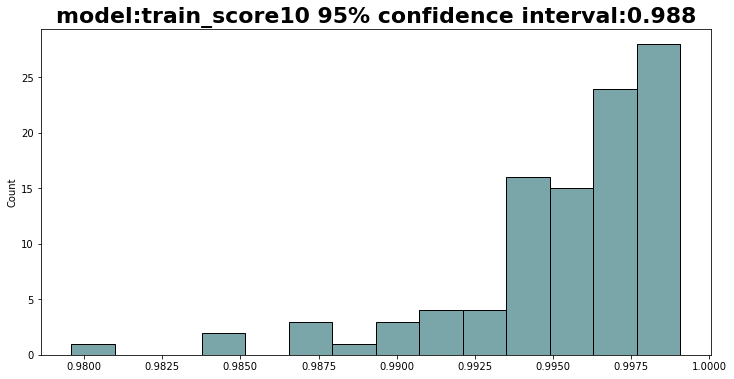

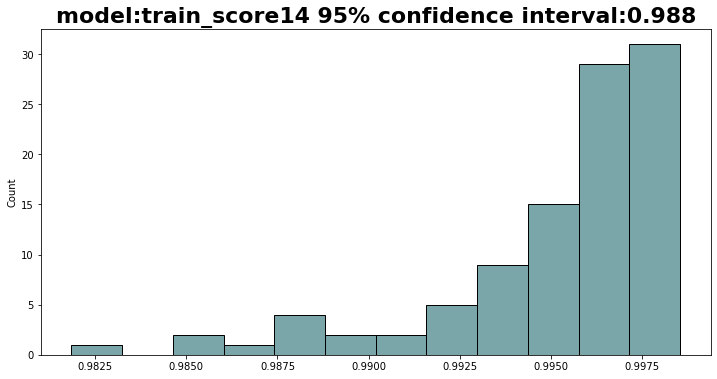

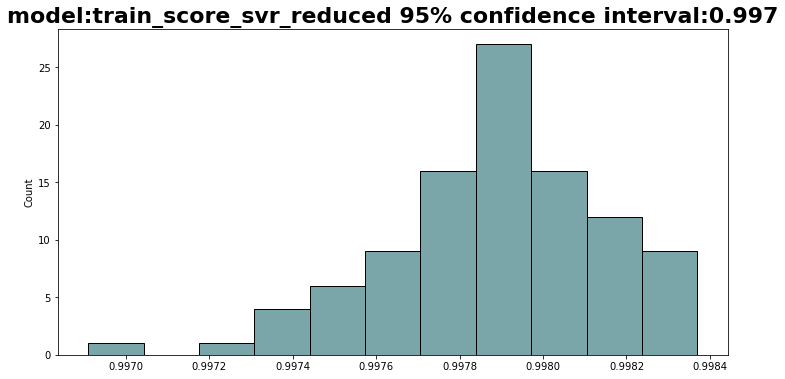

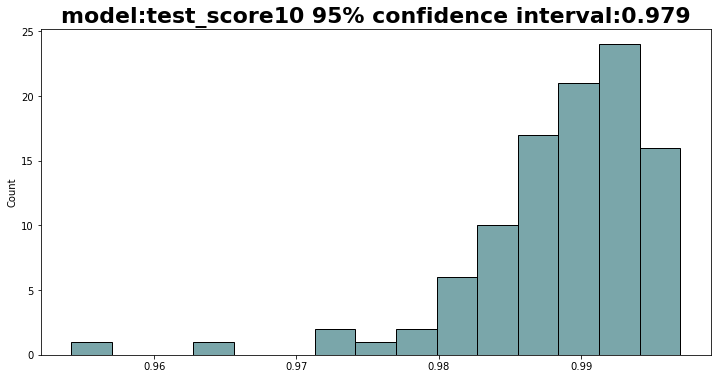

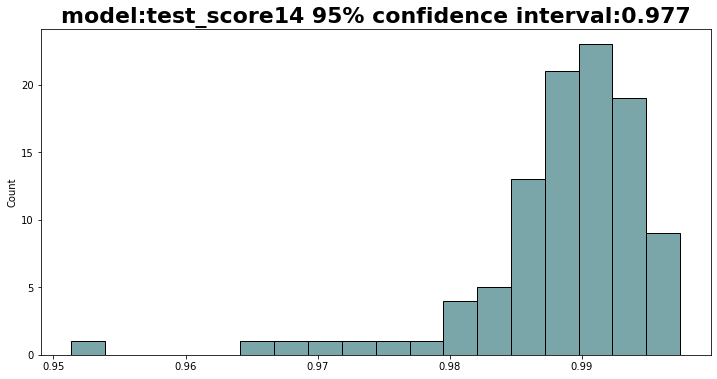

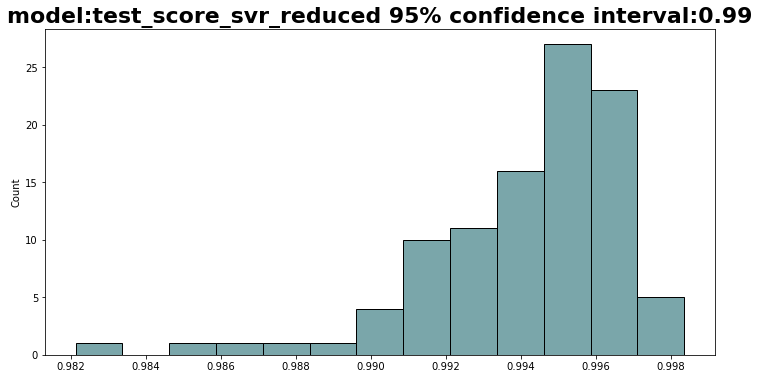

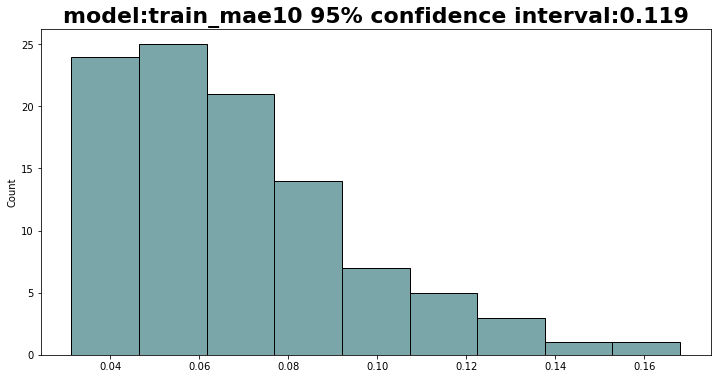

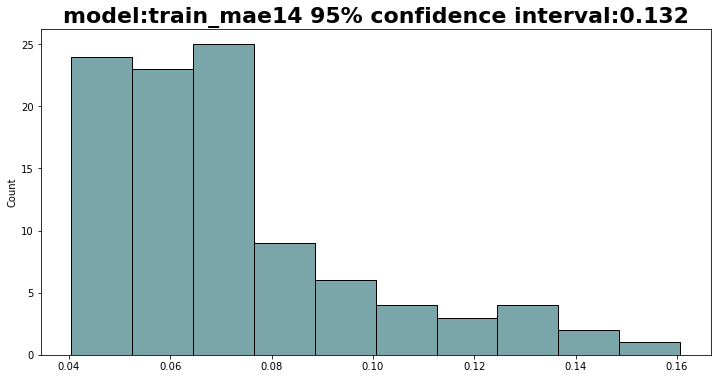

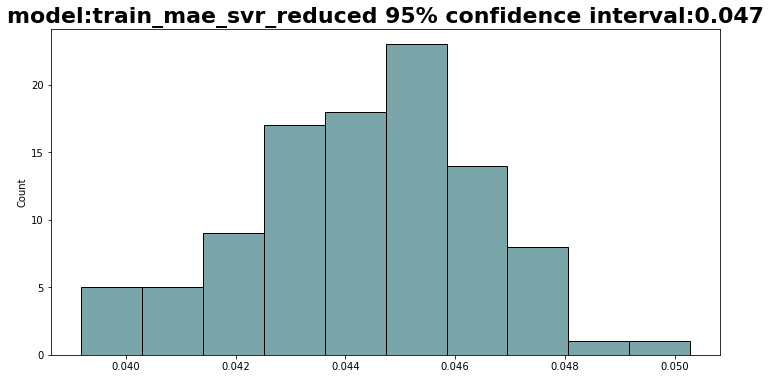

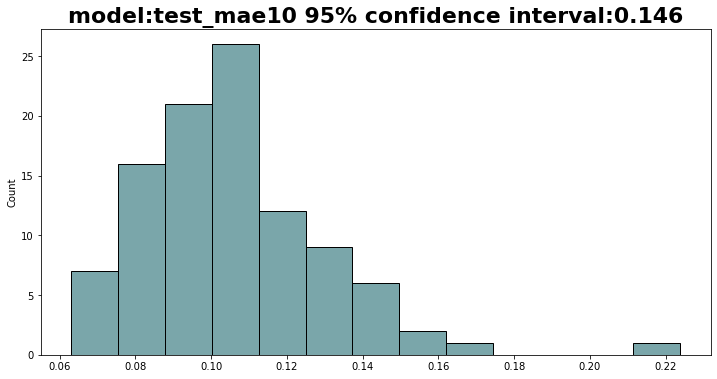

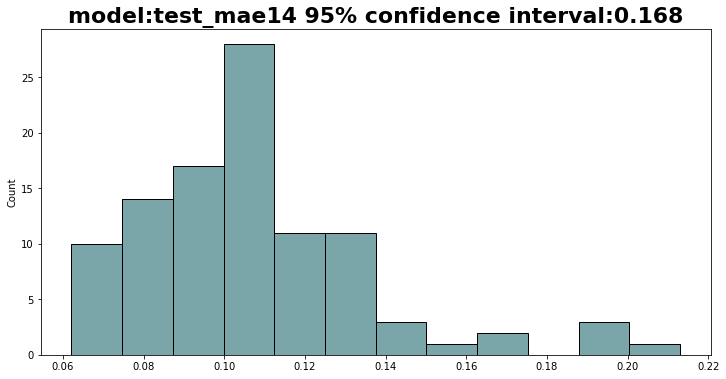

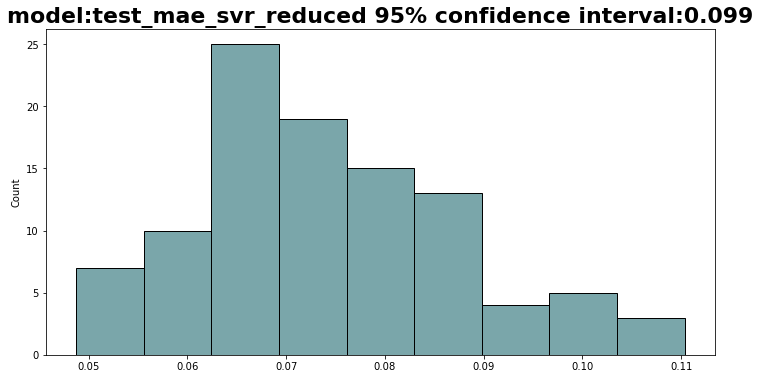

In [13]:
scores = [('train_score10', train_scores10),
          ('train_score14', train_scores14),
          ('train_score_svr_reduced', train_scores_svr_reduced),

          ('test_score10', test_scores10),
          ('test_score14', test_scores14),
          ('test_score_svr_reduced', test_scores_svr_reduced),

          ('train_mae10', train_maes10),
          ('train_mae14', train_maes14),
          ('train_mae_svr_reduced', train_maes_svr_reduced),

          ('test_mae10', test_maes10),
          ('test_mae14', test_maes14),
          ('test_mae_svr_reduced', test_maes_svr_reduced)
          ]

scr = 'score'
for score in scores:
    plt.figure(figsize=(12, 6))
    sns.histplot(data=score[1], color='#4E898E')
    # for scores we want 5 percentile for mae we need 95 percentile
    plt.title(f'model:{score[0]} 95% confidence interval:{np.round(np.percentile(score[1], 5 if scr in score[0] else 95),3)}', fontsize = 22, fontweight = 'bold')
    plt.show()





### When the model was iteratively run on different randomly sampled train-test splits, model10 achieved a score of at least 96.4% on the test dataset 95% of the time.

### When the model was iteratively run on different randomly sampled train-test splits, model10 achieved an mae less than 0.181 on the test dataset 95% of the time.